In [1]:
def lookup(s):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [2]:
#read in the parking data
import pandas as pd
pk17 = pd.read_csv('Parking_Violations_2017.csv', usecols=['Issue Date', 'Violation Precinct'])
pk17['Issue Date'] = lookup(pk17['Issue Date'])

In [3]:
pk16 = pd.read_csv('Parking_Violations_2016.csv', usecols=['Issue Date', 'Violation Precinct'])
pk16['Issue Date'] = lookup(pk16['Issue Date'])

In [4]:
# is the distribution across day on month of january and see if disproportinally large. 
pk15 = pd.read_csv('Parking_Violations_2015.csv', usecols=['Issue Date', 'Violation Precinct'])
pk15['Issue Date'] = lookup(pk15['Issue Date'])

In [5]:
pk14 = pd.read_csv('Parking_Violations_Fiscal_Year_2014__August_2013___June_2014_.csv',usecols=['Issue Date', 'Violation Precinct'])
pk14['Issue Date'] = lookup(pk14['Issue Date'])

In [266]:
crimeall = pd.read_csv('NYPD_Complaint_Data_Historic.tsv', usecols=['CMPLNT_FR_DT', 'ADDR_PCT_CD', 'KY_CD','OFNS_DESC', 'LAW_CAT_CD'], sep='\t', parse_dates=['CMPLNT_FR_DT'])
#crimeall['CMPLNT_FR_DT'] = lookup(crimeall['CMPLNT_FR_DT'])


In [267]:
crimeall.index = pd.to_datetime(crimeall['CMPLNT_FR_DT'], errors='coerce',format='%m/%d/%Y')
crimeall['CMPLNT_FR_DT'] = pd.to_datetime(crimeall['CMPLNT_FR_DT'], errors='coerce',format='%m/%d/%Y')

In [268]:
import datetime
crimeallt = crimeall.loc[(crimeall['CMPLNT_FR_DT'] > datetime.date(2013, 7, 31)) & (crimeall['CMPLNT_FR_DT'] < datetime.date(2016, 6, 1))]
crimeall = crimeallt

In [269]:
crimeallcount = pd.DataFrame(crimeall.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())
crimeallcountdays = pd.DataFrame(crimeall.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='D')])['ADDR_PCT_CD'].count())

In [270]:
crimeall.index = pd.to_datetime(crimeall['CMPLNT_FR_DT'], errors='coerce',format='%m/%d/%Y').dt.date
print(crimeall[:-1])
print(len(crimeall))

             CMPLNT_FR_DT  KY_CD                        OFNS_DESC  \
CMPLNT_FR_DT                                                        
2015-12-31     2015-12-31    113                          FORGERY   
2015-12-31     2015-12-31    101  MURDER & NON-NEGL. MANSLAUGHTER   
2015-12-31     2015-12-31    117                  DANGEROUS DRUGS   
2015-12-31     2015-12-31    344     ASSAULT 3 & RELATED OFFENSES   
2015-12-31     2015-12-31    344     ASSAULT 3 & RELATED OFFENSES   
2015-12-31     2015-12-31    106                   FELONY ASSAULT   
2015-12-31     2015-12-31    235                  DANGEROUS DRUGS   
2015-12-31     2015-12-31    118                DANGEROUS WEAPONS   
2015-12-31     2015-12-31    344     ASSAULT 3 & RELATED OFFENSES   
2015-12-31     2015-12-31    341                    PETIT LARCENY   
2015-12-31     2015-12-31    341                    PETIT LARCENY   
2015-12-31     2015-12-31    341                    PETIT LARCENY   
2015-12-31     2015-12-31    109  

In [11]:
parkingalltemp = [pk17,pk16,pk15,pk14]
parkingall = pd.concat(parkingalltemp)

In [12]:
parkingall.groupby(['Violation Precinct', pd.Grouper(key='Issue Date', freq='M')])['Violation Precinct'].count()

Violation Precinct  Issue Date
0.0                 2000-01-31    2
                    2000-02-29    2
                    2000-03-31    2
                    2000-04-30    3
                    2000-05-31    2
                    2000-06-30    5
                    2000-08-31    1
                    2000-09-30    1
                    2000-10-31    5
                    2000-11-30    4
                    2000-12-31    3
                    2001-05-31    1
                    2004-02-29    1
                    2004-04-30    1
                    2006-06-30    3
                    2007-04-30    1
                    2007-11-30    1
                    2010-02-28    1
                    2010-05-31    1
                    2010-09-30    1
                    2010-10-31    4
                    2011-02-28    1
                    2011-03-31    1
                    2011-07-31    1
                    2011-08-31    2
                    2012-01-31    3
                    2012-02-29   

In [13]:
# array of NYC Precincts 
pcts = [1, 5,6,7,9,10,13,14,17,18,19,20,23,24,25,26,28,30,32,33,34,40,41,42,43,44,45,46,47,48,49,50,52,60,61,62,63,66,67,68,69,70,71,72,73,75,76,77,78,79,81,83,84,88,90,94,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,121,122,123]


In [14]:
# trim the dates to be in the proper area
import datetime
parkingallt = parkingall.loc[(parkingall['Issue Date'] > datetime.date(2013, 7, 31)) & (parkingall['Issue Date'] < datetime.date(2016, 6, 1))]
parkingall = parkingallt
#print(parkingall)

In [15]:
# trim the dataset to only include proper precincts 
parkingallt = parkingall.loc[parkingall['Violation Precinct'].isin(pcts)]
parkingall = parkingallt

In [16]:
#print(parkingall)

In [17]:
parkingallcount = pd.DataFrame(parkingall.groupby([pd.Grouper(key='Issue Date', freq='M')])['Violation Precinct'].count())

In [18]:
parkingallcountdays = pd.DataFrame(parkingall.groupby([pd.Grouper(key='Issue Date', freq='D')])['Violation Precinct'].count())

In [165]:
a = parkingallcountdays.mean()
for i in range(len(parkingallcountdays["Violation Precinct"])):
    if (parkingallcountdays["Violation Precinct"].values[i] > 40000):
        print(parkingallcountdays["Violation Precinct"].index[i] , " " , parkingallcountdays["Violation Precinct"].values[i])
jan15 = parkingall.loc[(parkingall['Issue Date'] > datetime.date(2014, 12, 16)) & (parkingall['Issue Date'] < datetime.date(2015, 1, 30))]
jan15n = pd.DataFrame(jan15.groupby([pd.Grouper(key='Issue Date', freq='D')])['Violation Precinct'].count())
#print(jan15n)        
        

2013-11-29 00:00:00   44075
2015-01-02 00:00:00   44250
2015-01-05 00:00:00   43614
2015-01-08 00:00:00   54257
2015-01-09 00:00:00   44951
2015-01-10 00:00:00   42248
2015-01-12 00:00:00   52679
2015-01-13 00:00:00   69066
2015-01-14 00:00:00   61016
2015-01-15 00:00:00   71354
2015-01-16 00:00:00   67580
2015-01-17 00:00:00   45291
2015-01-19 00:00:00   44011
2015-01-20 00:00:00   69178
2015-01-21 00:00:00   61618
2015-01-22 00:00:00   67840
2015-01-23 00:00:00   63133
2015-02-10 00:00:00   40067
2015-03-03 00:00:00   40935
2015-03-12 00:00:00   40608
2015-06-26 00:00:00   66630
2015-06-29 00:00:00   61536
2015-06-30 00:00:00   69431


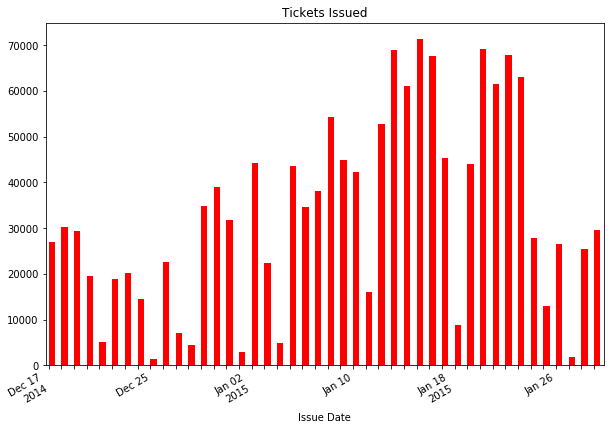

In [183]:
fig = plt.figure()
ax = fig.add_subplot(111)

jan15n.plot(label='parking',title="Tickets Issued",kind='bar', color='red', ax=ax, position=0, figsize=(10,7))
legend = plt.legend()
legend.remove()

ticklabels = ['']*len(jan15n.index)
ticklabels[::8] = [item.strftime('%b %d') for item in jan15n.index[::8]]
ticklabels[::16] = [item.strftime('%b %d\n%Y') for item in jan15n.index[::16]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.show()

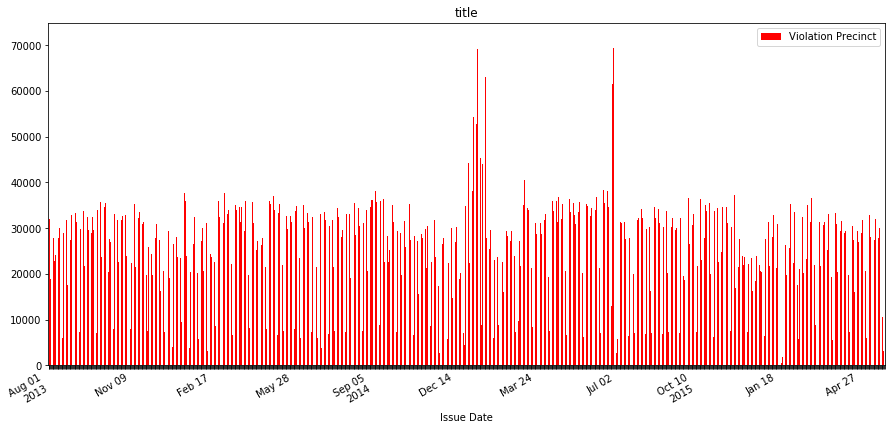

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)

parkingallcountdays.plot(label='parking',title="title",kind='bar', color='red', ax=ax, position=0, figsize=(15,7))

ticklabels = ['']*len(parkingallcountdays.index)
ticklabels[::100] = [item.strftime('%b %d') for item in parkingallcountdays.index[::100]]
ticklabels[::400] = [item.strftime('%b %d\n%Y') for item in parkingallcountdays.index[::400]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.show()
print()

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Issue Date')
[ 56.61610424  55.83643229  54.95111583  54.53005017  54.92795528
  54.69241244  54.83022283  54.73132976  54.46867579  54.71796039
  55.04186283  54.83536793  54.71830391  54.66999735  53.90376365
  54.57381094  54.30519556  54.14929469  54.3838075   54.14510878
  54.37443502  54.38839695  54.47452555  54.67476849  54.34404543
  54.4636699   54.4825355   54.52707041  54.2320645   54.70826321
  55.75234639]


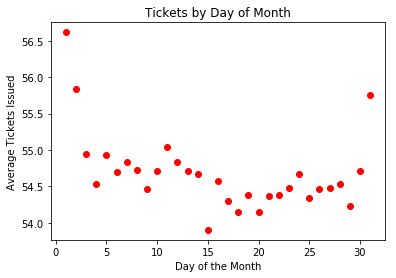

In [286]:
pa = parkingall
pa.index = pd.to_datetime(pa['Issue Date'], errors='coerce',format='%m/%d/%Y').dt.day
padays = pd.DataFrame(pa.groupby(pa.index)['Violation Precinct'].mean())
print(padays['Violation Precinct'].index)
print(padays['Violation Precinct'].values)
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Tickets by Day of Month")
plt.plot(padays['Violation Precinct'].index, padays['Violation Precinct'].values, 'ro')
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Average Tickets Issued')
plt.show()

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='CMPLNT_FR_DT')
[ 63.95550385  63.18987661  62.96743905  62.887181    62.85802357
  62.88416515  62.42230966  62.74687321  63.10170956  62.82102664
  62.66963546  62.48165016  62.65219872  62.37568242  62.87490125
  62.63898438  62.89909128  62.70553571  62.51833406  62.52806594
  62.6528454   62.81550096  62.75534049  62.72022187  62.92900187
  62.99122208  62.70586991  62.86385606  62.51168515  62.93620443
  63.09530527]


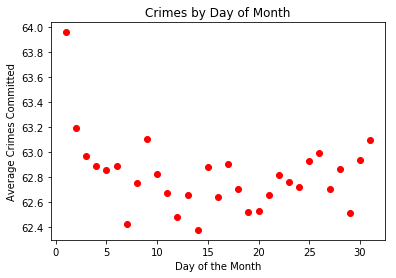

In [287]:
cr = crimeall
cr.index = pd.to_datetime(cr['CMPLNT_FR_DT'], errors='coerce',format='%m/%d/%Y').dt.day
crdays = pd.DataFrame(cr.groupby(cr.index)['ADDR_PCT_CD'].mean())
print(crdays['ADDR_PCT_CD'].index)
print(crdays['ADDR_PCT_CD'].values)
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Crimes by Day of Month")
plt.plot(crdays['ADDR_PCT_CD'].index, crdays['ADDR_PCT_CD'].values, 'ro')
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Average Crimes Committed')
plt.show()

In [21]:
print(parkingallcountdays[0:20])

            Violation Precinct
Issue Date                    
2013-08-01               30271
2013-08-02               32074
2013-08-03               18882
2013-08-04                6791
2013-08-05               29293
2013-08-06               33261
2013-08-07               27884
2013-08-08               22751
2013-08-09               24170
2013-08-10               16676
2013-08-11                6283
2013-08-12               27863
2013-08-13               27853
2013-08-14               29957
2013-08-15               27714
2013-08-16               29492
2013-08-17               13039
2013-08-18                6015
2013-08-19               28926
2013-08-20               31753


In [22]:
#having an issue plotting :(
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# fig, ax = plt.subplots(figsize=(15,7))


# parkingallcount.plot(ax=ax)
# #set ticks every week
# #ax.bar(pc1n.index, pc1n)

# monthformat = mdates.DateFormatter('%M %Y')
# months = mdates.MonthLocator()
# ax.xaxis.set_major_formatter(monthformat)
# ax.xaxis.set_major_locator(months)
# #set major ticks format
# plt.show()

In [23]:
# import matplotlib.ticker as ticker
# ax = parkingallcount.plot(kind='bar', x=parkingallcount.index, figsize=(15,7))
# ticklabels = ['']*len(parkingallcount.index)
# ticklabels[::4] = [item.strftime('%b %d') for item in parkingallcount.index[::4]]
# ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in parkingallcount.index[::12]]
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
# plt.gcf().autofmt_xdate()

# plt.show()

In [271]:
#Now let's work on the crime data (should be easy and same process)
crimeallt = crimeall.loc[(crimeall['CMPLNT_FR_DT'] > datetime.date(2013, 7, 31)) & (crimeall['CMPLNT_FR_DT'] < datetime.date(2016, 6, 1))]
crimeall = crimeallt
crimeallt = crimeall.loc[crimeall['ADDR_PCT_CD'].isin(pcts)]
crimeall = crimeallt

In [275]:
crimeall['ADDR_PCT_CD'] = crimeall['ADDR_PCT_CD'].fillna(0).astype(int)
#crimeall.index = pd.to_datetime(crimeall.index, unit='D')
crimeallcount = pd.DataFrame(crimeall.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())

#felony, misdemeanor, violation 

felony = crimeall.loc[crimeall['LAW_CAT_CD'] == 'FELONY']
felonymonth = pd.DataFrame(felony.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())

misdemeanor = crimeall.loc[crimeall['LAW_CAT_CD'] == 'MISDEMEANOR']
misdemeanormonth = pd.DataFrame(misdemeanor.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())

violation = crimeall.loc[crimeall['LAW_CAT_CD'] == 'VIOLATION']
violationmonth = pd.DataFrame(violation.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())

#parkingallcount = pd.DataFrame(parkingall.groupby([pd.Grouper(key='Issue Date', freq='M')])['Violation Precinct'].count())

In [261]:
crweek = pd.DataFrame(crimeall.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='W')])['ADDR_PCT_CD'].count())
pkweek = pd.DataFrame(parkingall.groupby([pd.Grouper(key='Issue Date', freq='W')])['Violation Precinct'].count())
crday = pd.DataFrame(crimeall.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='D')])['ADDR_PCT_CD'].count())
pkday = pd.DataFrame(parkingall.groupby([pd.Grouper(key='Issue Date', freq='D')])['Violation Precinct'].count())

In [278]:
crweektrimx = crimeall.copy()
pkweektrimx = parkingall.copy()
crweektrim = crweektrimx.loc[(crweektrimx['CMPLNT_FR_DT'] < datetime.date(2014, 12, 1)) | (crweektrimx['CMPLNT_FR_DT'] > datetime.date(2015, 1, 31))]
pkweektrim = pkweektrimx.loc[(pkweektrimx['Issue Date'] < datetime.date(2014, 12, 1)) | (pkweektrimx['Issue Date'] > datetime.date(2015, 1, 31))]
felonytrim = crweektrim.loc[crweektrim['LAW_CAT_CD'] == 'FELONY']
felonymonthtrim = pd.DataFrame(felonytrim.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())
misdemeanortrim = crweektrim.loc[crweektrim['LAW_CAT_CD'] == 'MISDEMEANOR']
misdemeanormonthtrim = pd.DataFrame(misdemeanortrim.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())
violationtrim = crweektrim.loc[crweektrim['LAW_CAT_CD'] == 'VIOLATION']
violationmonthtrim = pd.DataFrame(violationtrim.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())


In [251]:
crmonthtr = pd.DataFrame(crweektrim.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())
pkmonthtr = pd.DataFrame(pkweektrim.groupby([pd.Grouper(key='Issue Date', freq='M')])['Violation Precinct'].count())
# crweektr = pd.DataFrame(crweektrim.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='W')])['ADDR_PCT_CD'].count())
# pkweektr = pd.DataFrame(pkweektrim.groupby([pd.Grouper(key='Issue Date', freq='W')])['Violation Precinct'].count())
# crdaytr = pd.DataFrame(crweektrim.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='D')])['ADDR_PCT_CD'].count())
# pkdaytr = pd.DataFrame(pkweektrim.groupby([pd.Grouper(key='Issue Date', freq='D')])['Violation Precinct'].count())


NameError: name 'majormonthtrim' is not defined

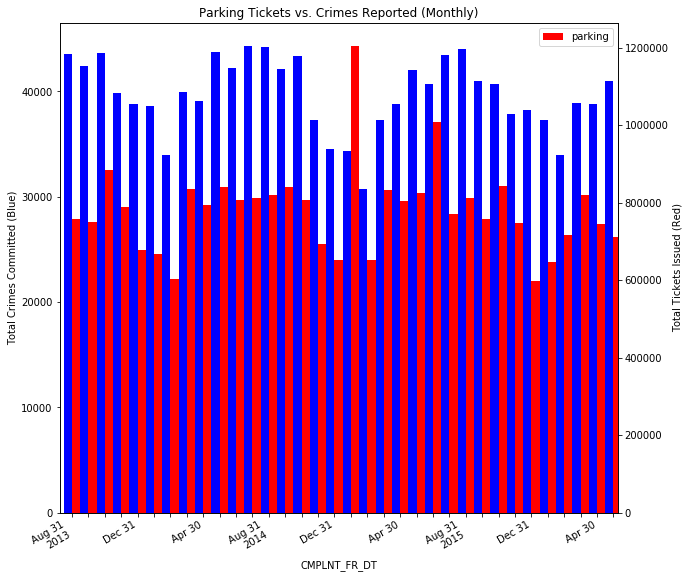

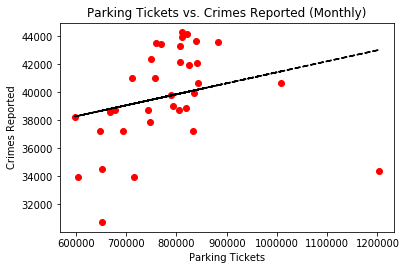

LinregressResult(slope=0.0078667852452074909, intercept=33575.343934344193, rvalue=0.25923084091776616, pvalue=0.13874895778483423, stderr=0.0051811928680417195)


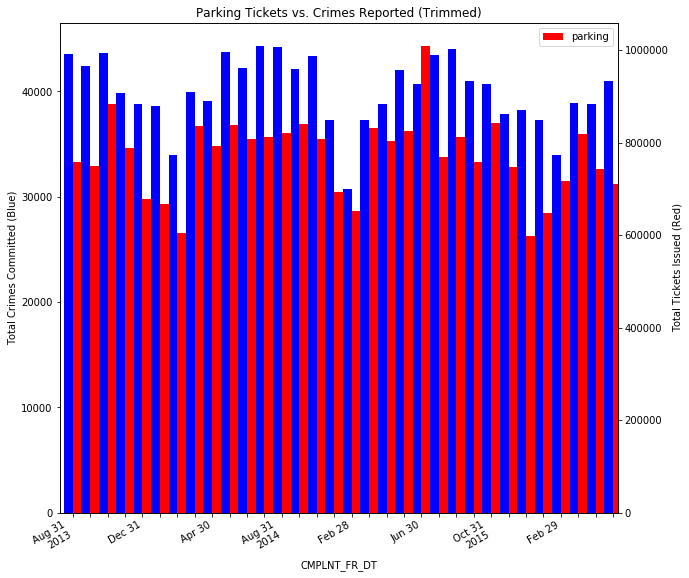

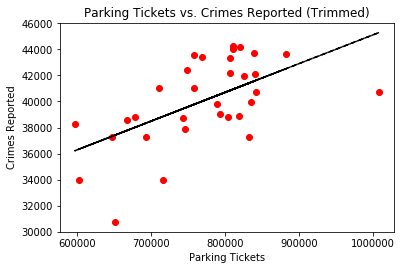

LinregressResult(slope=0.022105907409798401, intercept=23002.908821354999, rvalue=0.57843344480706693, pvalue=0.00052483525274576082, stderr=0.0056916807895077293)


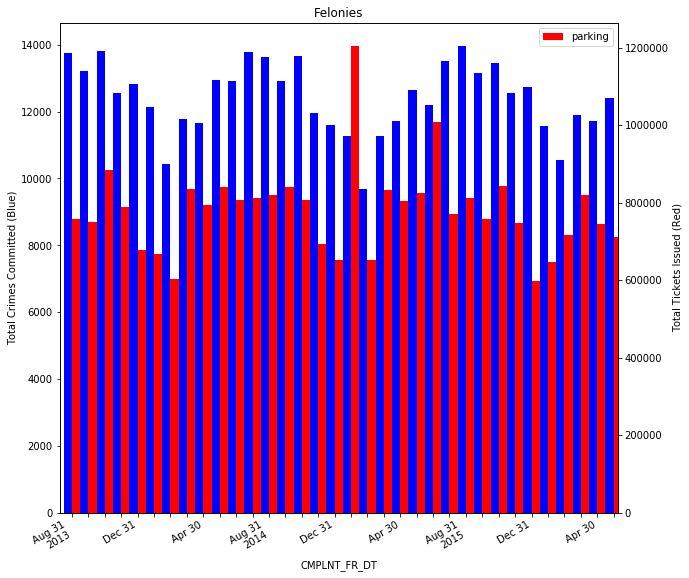

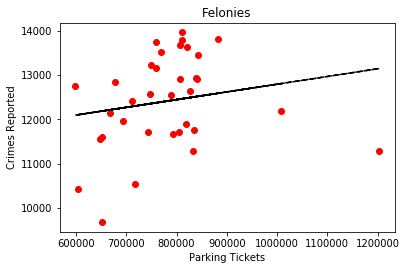

LinregressResult(slope=0.0017367549757020494, intercept=11054.686450029398, rvalue=0.1860963740055307, pvalue=0.29198786176103853, stderr=0.0016209593810481431)


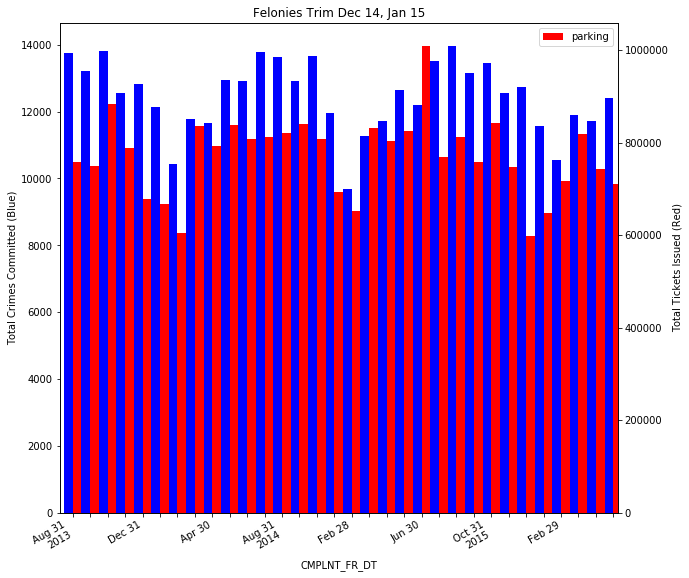

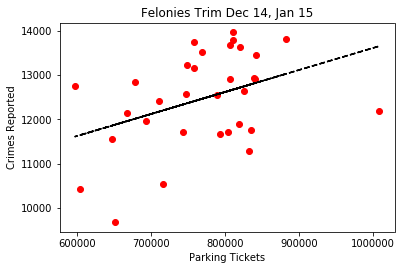

LinregressResult(slope=0.0049632594385039079, intercept=8644.0990256760051, rvalue=0.40026012678374578, pvalue=0.02320965830172993, stderr=0.0020746739029268032)


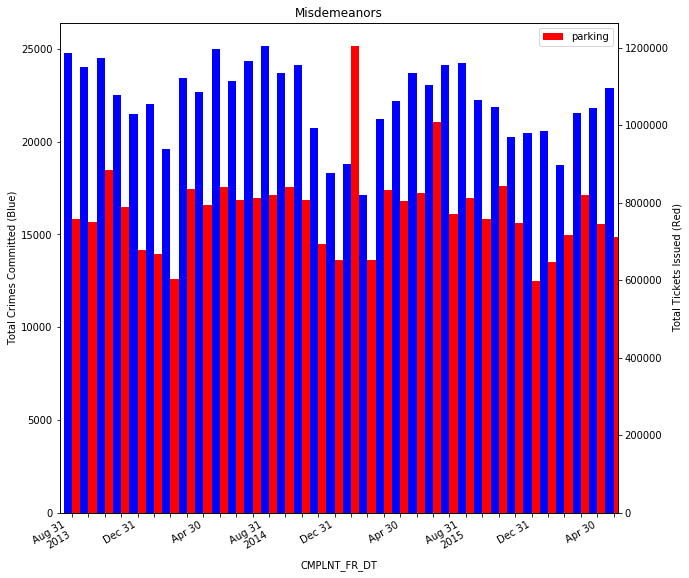

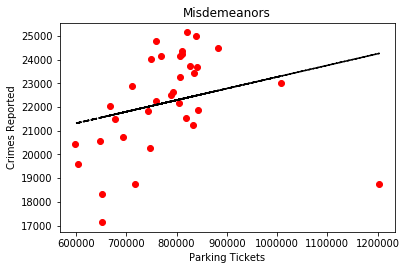

LinregressResult(slope=0.0048873264654413374, intercept=18383.985786493984, rvalue=0.26820321951993042, pvalue=0.12511881229236321, stderr=0.0031032877501581111)


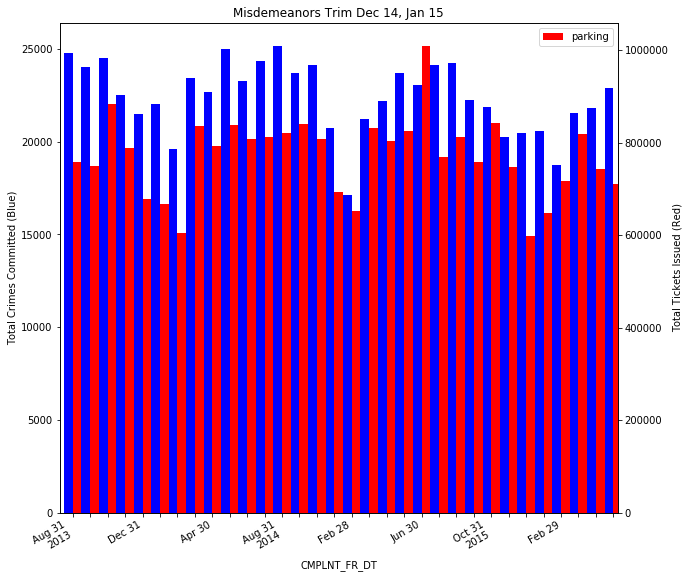

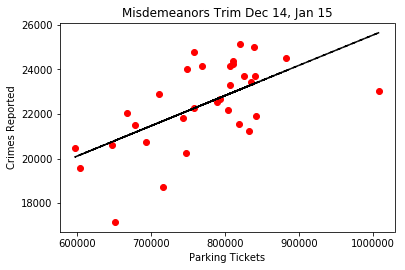

LinregressResult(slope=0.013598142690293932, intercept=11942.79526823694, rvalue=0.61040679805383902, pvalue=0.00020739422786631803, stderr=0.0032216109129335818)


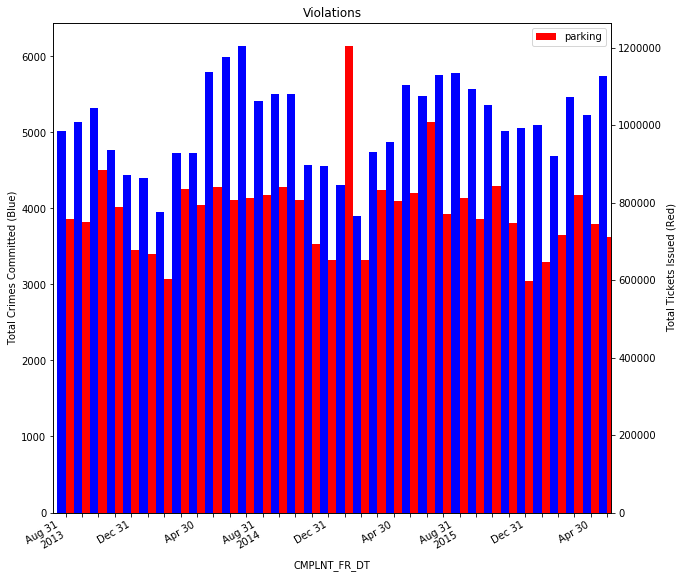

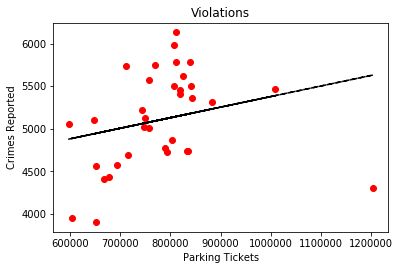

LinregressResult(slope=0.0012427038040641058, intercept=4136.6716978208106, rvalue=0.24978027419996476, pvalue=0.15425083202634901, stderr=0.00085161945255214395)


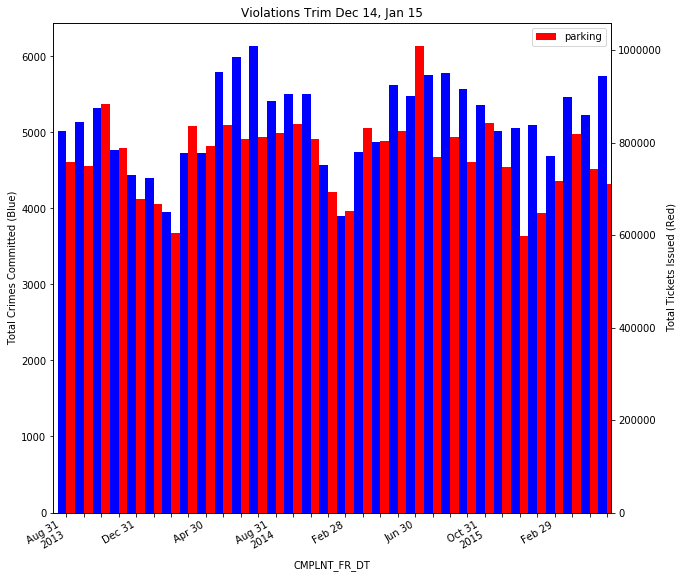

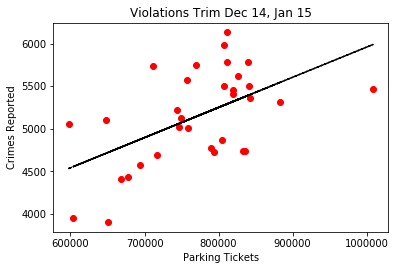

LinregressResult(slope=0.0035445052810005608, intercept=2416.0145274420524, rvalue=0.54768958187111205, pvalue=0.0011763119063499493, stderr=0.00098860031754234232)


0.0011763119063499493

In [281]:
#crime plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker
def plotMyStuff(parkingdata, crimedata, title):
    import matplotlib.ticker as ticker
    from scipy.stats import linregress
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()
    
    ax.set_ylabel('Total Crimes Committed (Blue)')
    ax2.set_ylabel('Total Tickets Issued (Red)')

    parkingdata['Violation Precinct'].plot(label='parking',title=title,kind='bar', color='red', ax=ax2, position=0, figsize=(15,7))
    crimedata['ADDR_PCT_CD'].plot(label='crime',kind='bar', color='blue', ax=ax, position=1, figsize=(10,10))
    plt.legend()

    ticklabels = ['']*len(crimedata.index)
    ticklabels[::4] = [item.strftime('%b %d') for item in crimedata.index[::4]]
    ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in crimedata.index[::12]]
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    plt.gcf().autofmt_xdate()

    plt.show()
    
    fit = np.polyfit(parkingdata['Violation Precinct'],crimedata['ADDR_PCT_CD'],1)
    fit_fn = np.poly1d(fit) 
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_title(title)

    ax.set_xlabel('Parking Tickets')
    ax.set_ylabel('Crimes Reported')
    plt.plot(parkingdata['Violation Precinct'], crimedata['ADDR_PCT_CD'], 'ro',parkingdata['Violation Precinct'], fit_fn(parkingdata['Violation Precinct']), '--k')
    plt.show()
    
    print(linregress(parkingdata['Violation Precinct'],crimedata['ADDR_PCT_CD']))
    return(linregress(parkingdata['Violation Precinct'],crimedata['ADDR_PCT_CD'])[3])
    

# parking tickets increase bc of storm? 
# put red v blue in precincts and see how that works and which ones are indicititive of the data and would be a pretty picture
# will get a picture if adjacent precincts look the same or different. 
plotMyStuff(parkingallcount, crimeallcount, "Parking Tickets vs. Crimes Reported (Monthly)")
plotMyStuff(pkmonthtr, crmonthtr, "Parking Tickets vs. Crimes Reported (Trimmed)")

plotMyStuff(parkingallcount, felonymonth, "Felonies")
plotMyStuff(pkmonthtr, felonymonthtrim, "Felonies Trim Dec 14, Jan 15")

plotMyStuff(parkingallcount, misdemeanormonth, "Misdemeanors")
plotMyStuff(pkmonthtr, misdemeanormonthtrim, "Misdemeanors Trim Dec 14, Jan 15")

plotMyStuff(parkingallcount, violationmonth, "Violations")
plotMyStuff(pkmonthtr, violationmonthtrim, "Violations Trim Dec 14, Jan 15")


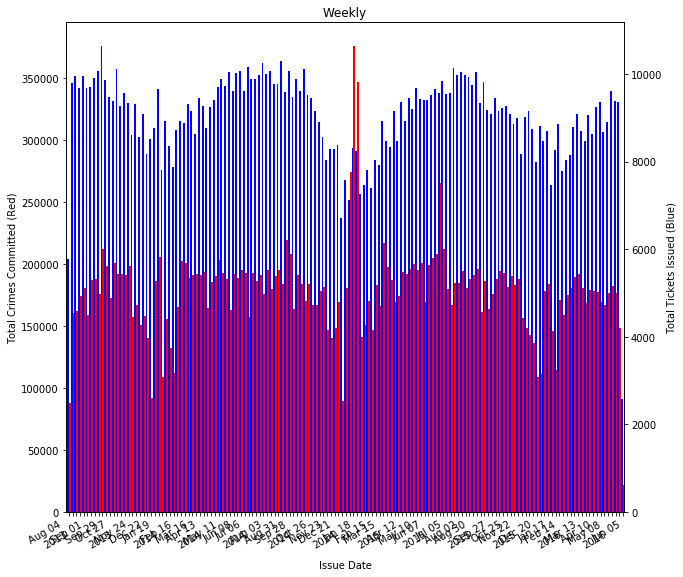

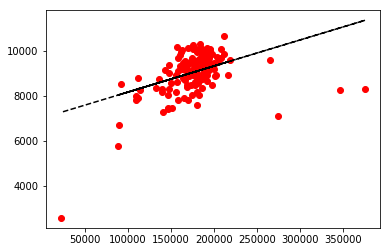

LinregressResult(slope=0.011571813575809923, intercept=7002.0294126183835, rvalue=0.4398835263165719, pvalue=1.9875474249285105e-08, stderr=0.0019485336834612968)


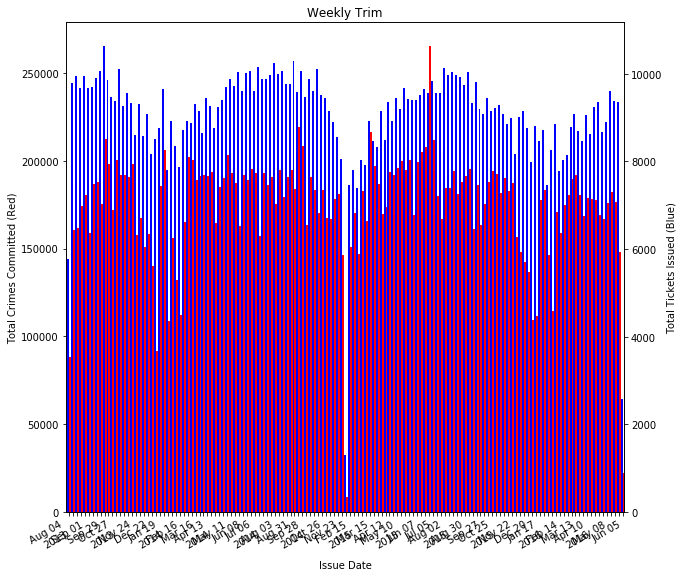

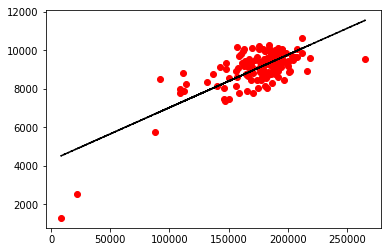

LinregressResult(slope=0.027383144685574155, intercept=4297.3833238325005, rvalue=0.75769045957354264, pvalue=1.5316189663867588e-27, stderr=0.0020005092176363449)


In [129]:
plotMyStuff(pkweek, crweek, "Weekly")
plotMyStuff(pkweektr, crweektr, "Weekly Trim")

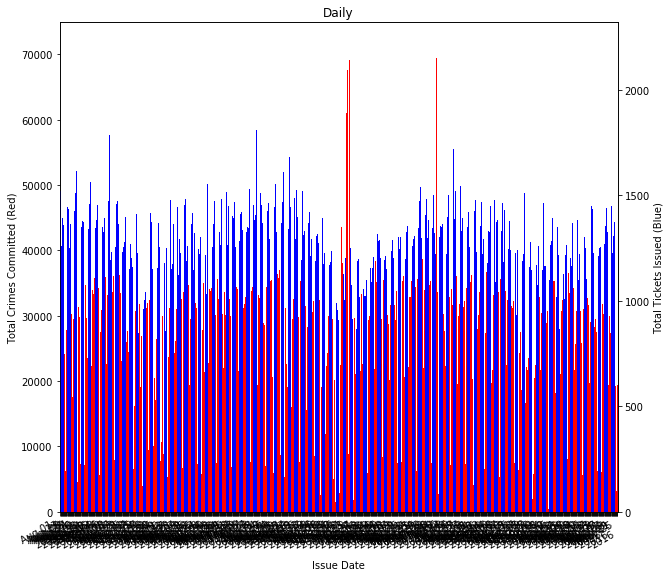

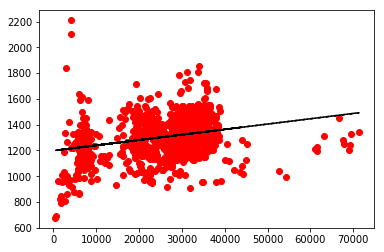

LinregressResult(slope=0.0041171960953720107, intercept=1199.036503916908, rvalue=0.28400493996584664, pvalue=1.1817542404100778e-20, stderr=0.00043247783825150007)


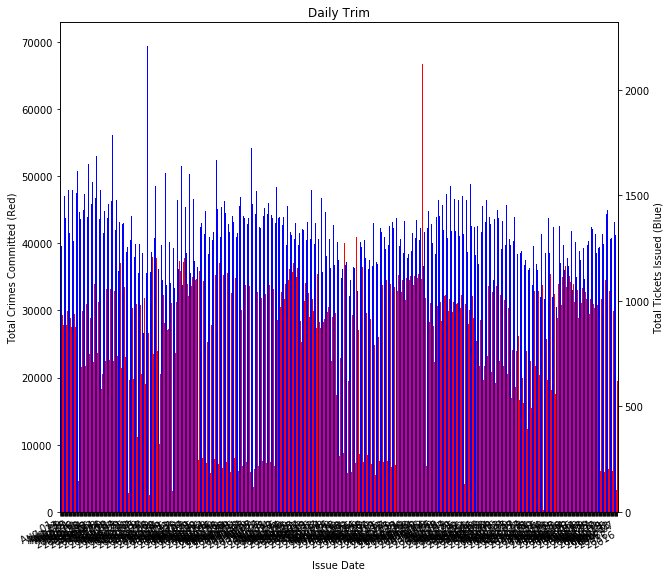

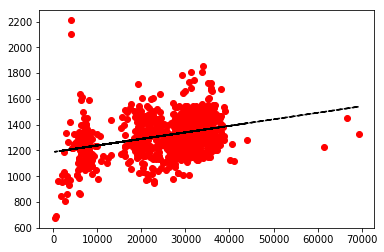

LinregressResult(slope=0.00506084598718224, intercept=1188.5983715624579, rvalue=0.34409753408951843, pvalue=1.9809940125689935e-28, stderr=0.00044316654698444764)


In [130]:
plotMyStuff(pkday, crday, "Daily")
plotMyStuff(pkdaytr, crdaytr, "Daily Trim")

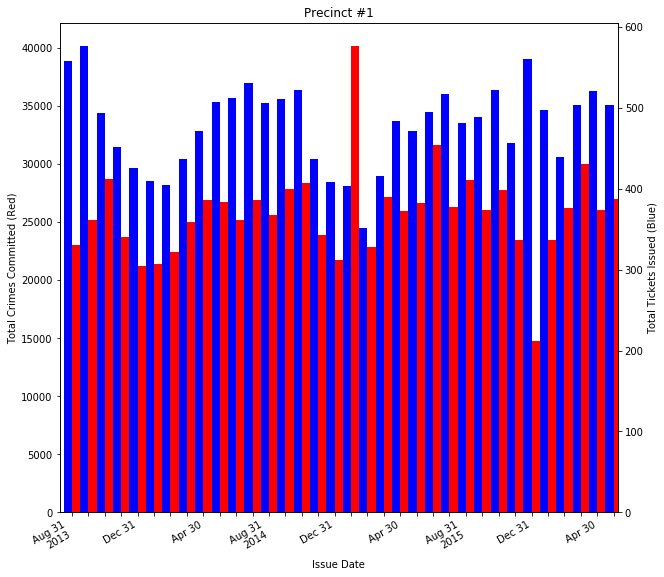

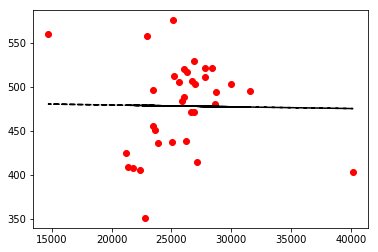

LinregressResult(slope=-0.00020141427543300054, intercept=483.55123036322237, rvalue=-0.015491399235908362, pvalue=0.93070651272907368, stderr=0.0022981189013815098)


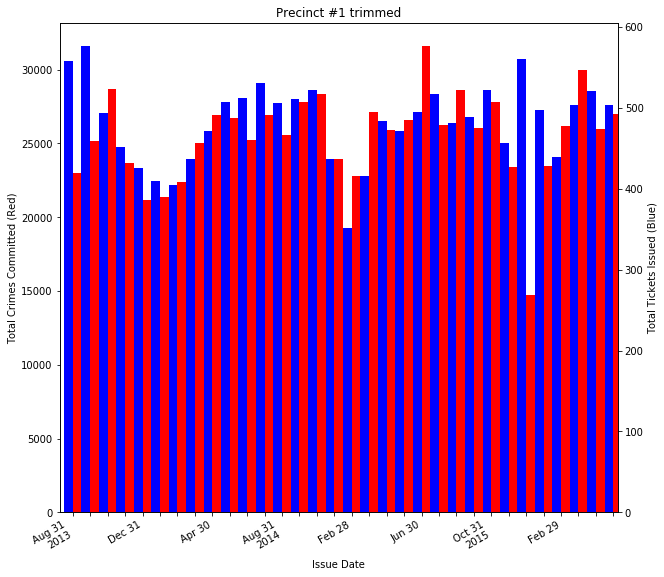

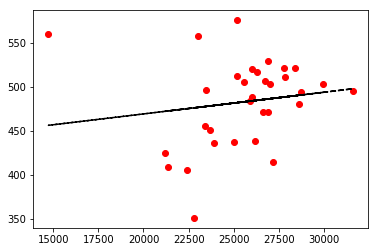

LinregressResult(slope=0.0024659055267705053, intercept=420.05694524372302, rvalue=0.15335443487422198, pvalue=0.40205177062113495, stderr=0.0029010263971505044)


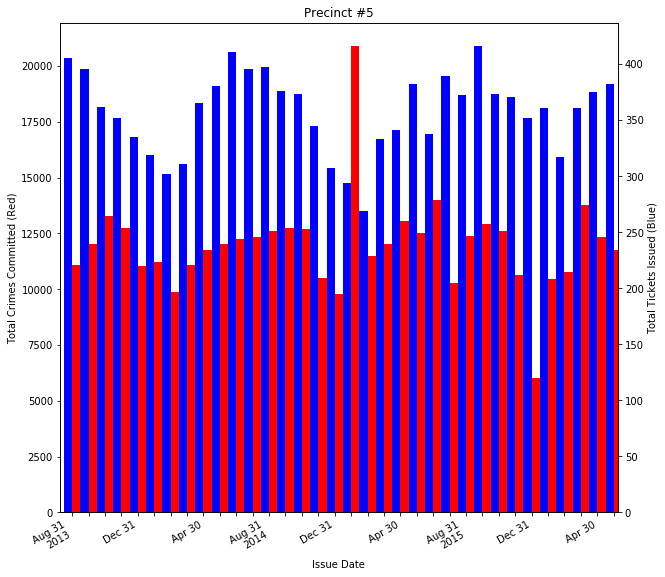

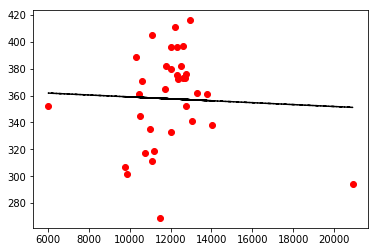

LinregressResult(slope=-0.00071601697156848569, intercept=366.15878996921083, rvalue=-0.043064292734480092, pvalue=0.8089154301263235, stderr=0.002936485952311873)


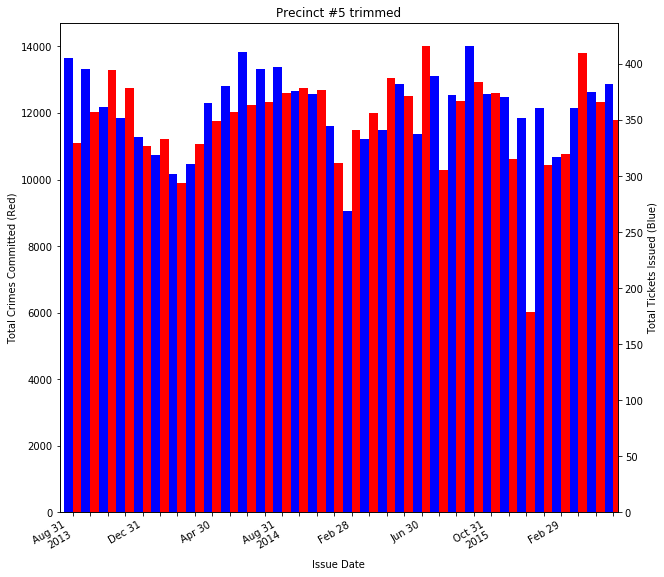

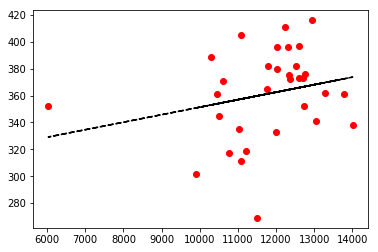

LinregressResult(slope=0.0055820464215132056, intercept=295.51661725152485, rvalue=0.2431162861801022, pvalue=0.17999333093078343, stderr=0.0040662045495730098)


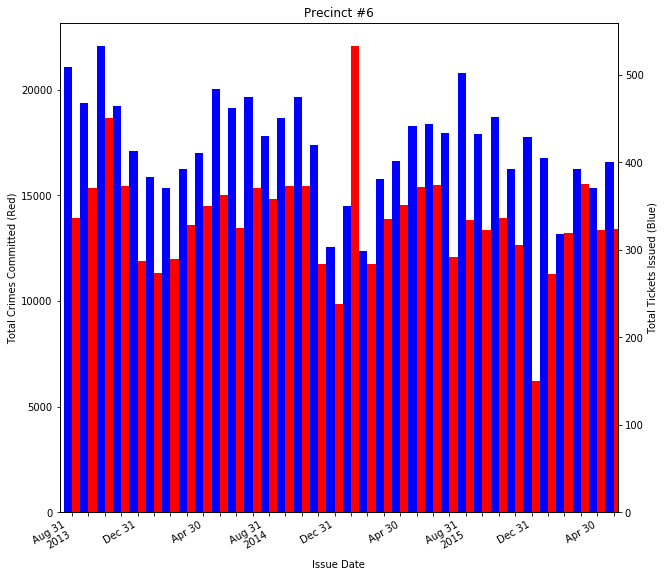

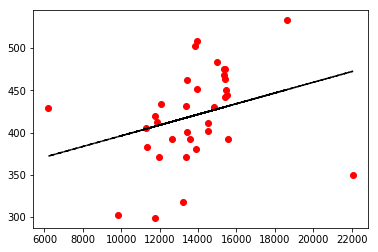

LinregressResult(slope=0.0063331256402331662, intercept=332.85857523583525, rvalue=0.2963561571142736, pvalue=0.088779145502084836, stderr=0.0036080103392790047)


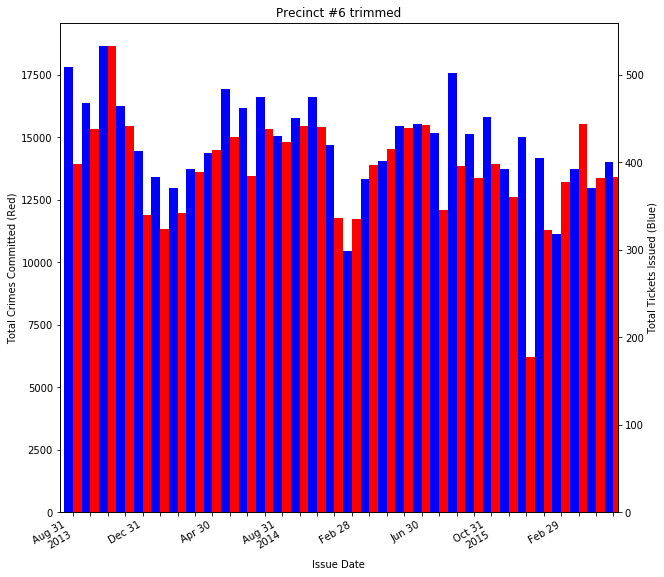

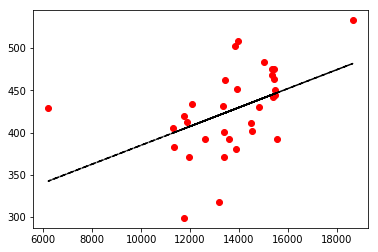

LinregressResult(slope=0.011181728781182947, intercept=273.23103567390376, rvalue=0.45994777293965694, pvalue=0.0080821703186158503, stderr=0.0039411806960423373)


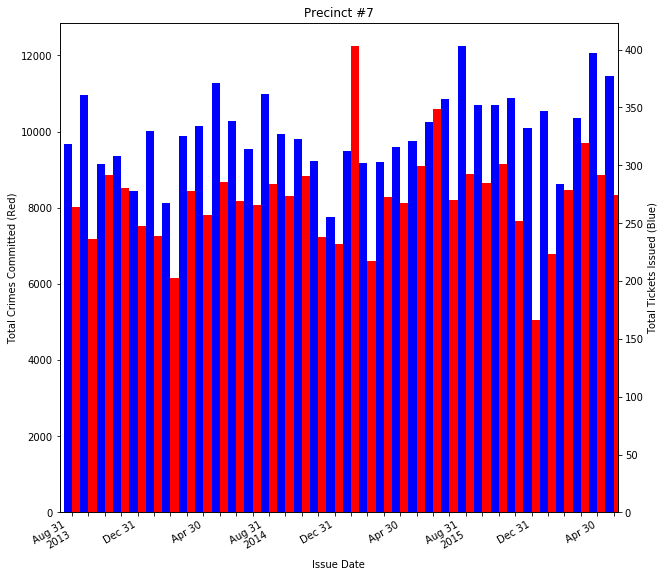

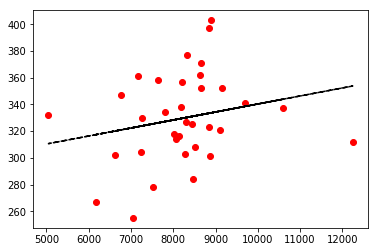

LinregressResult(slope=0.0059980908368628041, intercept=280.3230431738121, rvalue=0.22334781878682189, pvalue=0.20418101390908014, stderr=0.0046274804540314563)


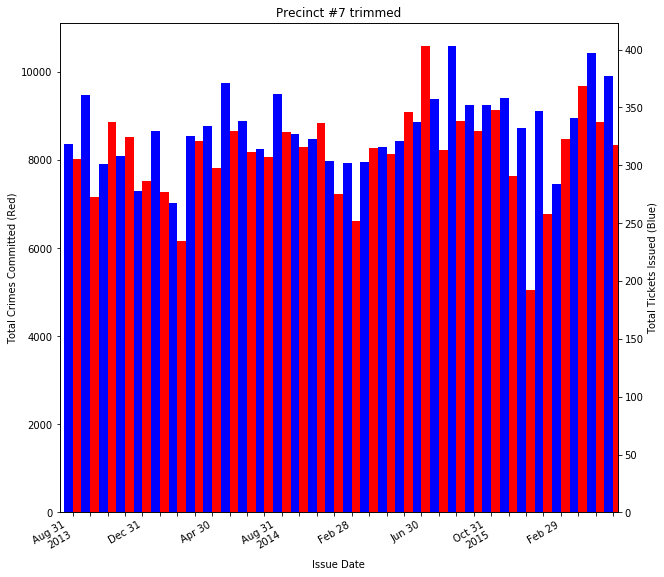

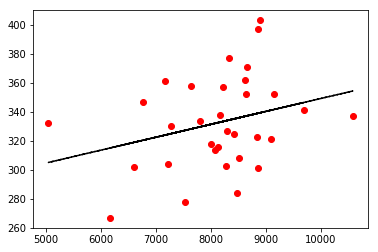

LinregressResult(slope=0.0088825309349079094, intercept=260.29557150468389, rvalue=0.29354506795542235, pvalue=0.10296906540220999, stderr=0.0052812208153832753)


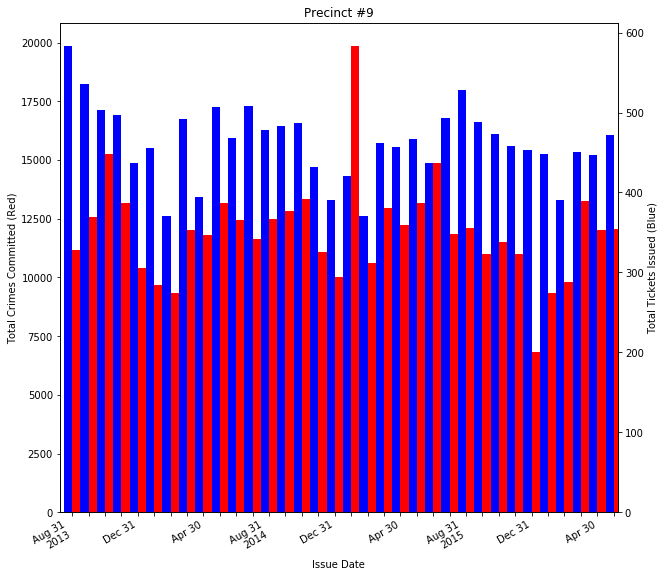

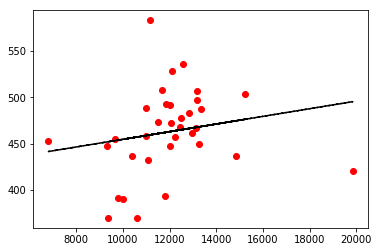

LinregressResult(slope=0.0041227088858107122, intercept=413.46008553343603, rvalue=0.1906628458463048, pvalue=0.28009391675629697, stderr=0.0037523276106963357)


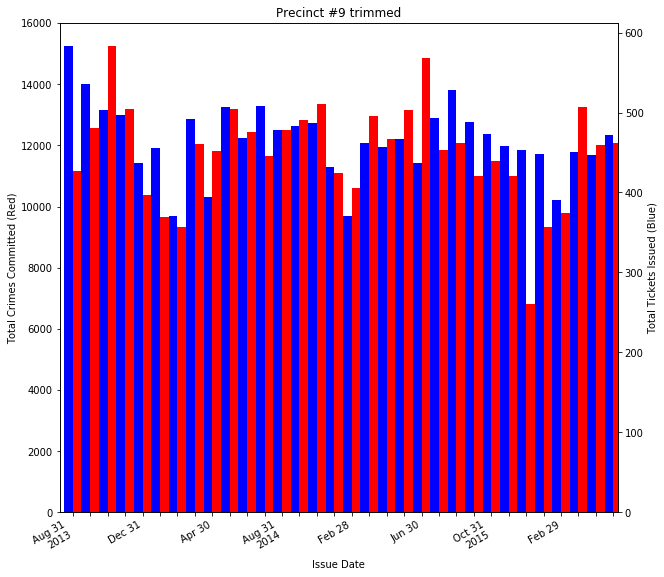

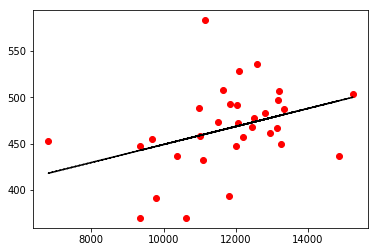

LinregressResult(slope=0.0096990808129139051, intercept=352.10921965423506, rvalue=0.35603622433655713, pvalue=0.045501009773790985, stderr=0.0046477432448677886)


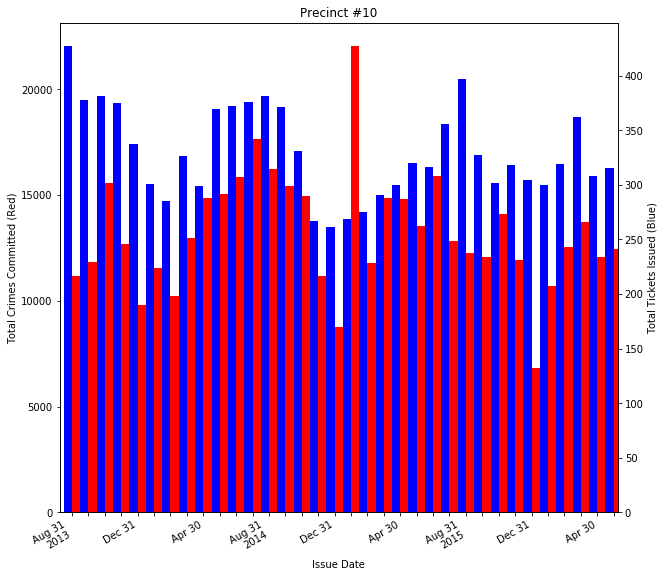

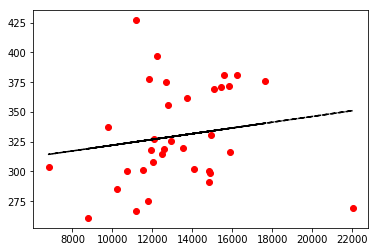

LinregressResult(slope=0.0024126223014690994, intercept=297.94476850912309, rvalue=0.16074837912803031, pvalue=0.36378199221402296, stderr=0.0026186827270900464)


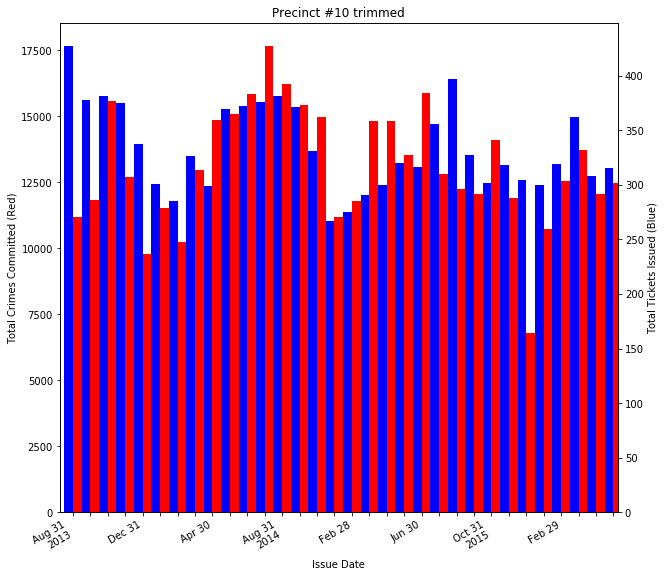

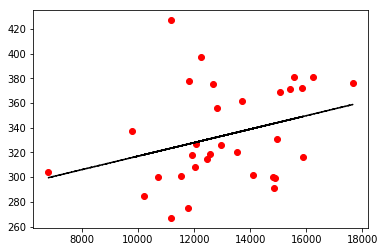

LinregressResult(slope=0.0054595248806651054, intercept=262.4050989120006, rvalue=0.31116361769813078, pvalue=0.083005930838420672, stderr=0.0030443311650933378)


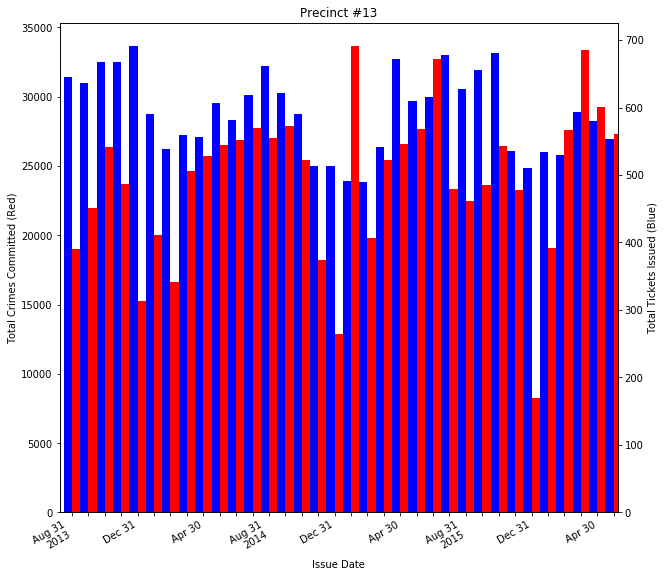

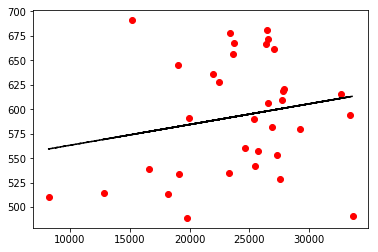

LinregressResult(slope=0.0021193495073668104, intercept=542.03161586855276, rvalue=0.19606673530074128, pvalue=0.26642964468468122, stderr=0.0018737488622138814)


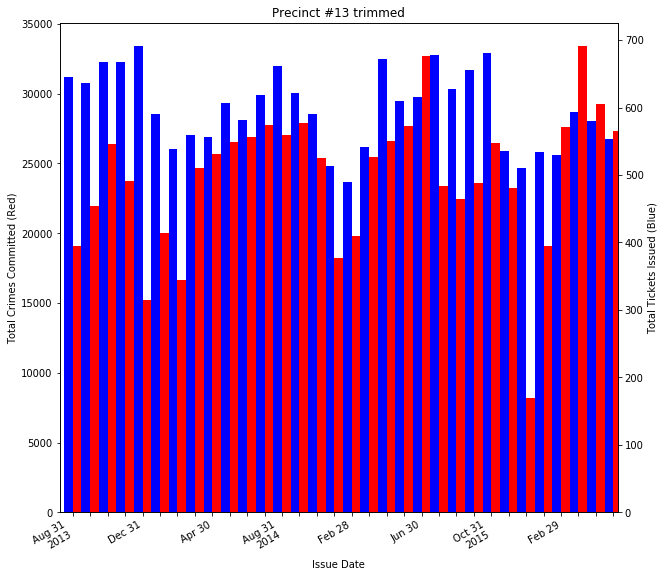

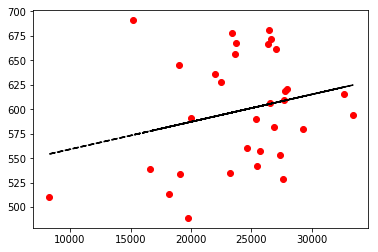

LinregressResult(slope=0.0028055256014970519, intercept=531.08562548593545, rvalue=0.24947124611147792, pvalue=0.16852433853347315, stderr=0.0019882908469258747)


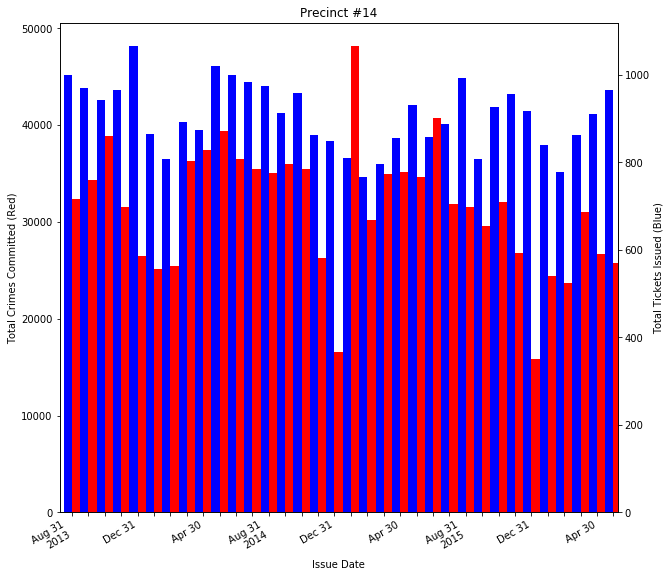

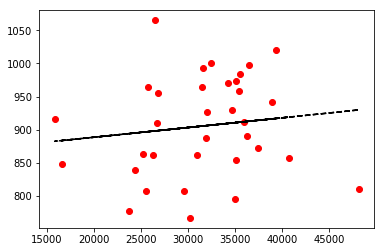

LinregressResult(slope=0.0014643002925812149, intercept=859.36769302644109, rvalue=0.12860169657293102, pvalue=0.4685501112600815, stderr=0.0019961223915001877)


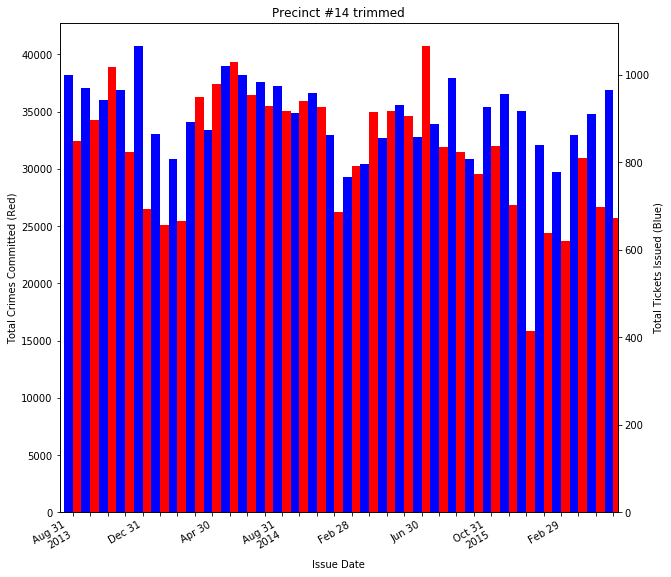

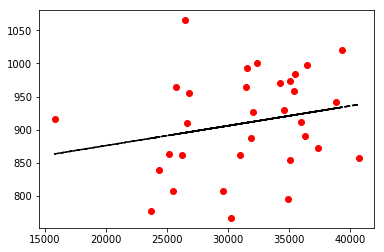

LinregressResult(slope=0.0029912566530992768, intercept=816.1989370719358, rvalue=0.22085600483390738, pvalue=0.22447571646364545, stderr=0.0024117091119749711)


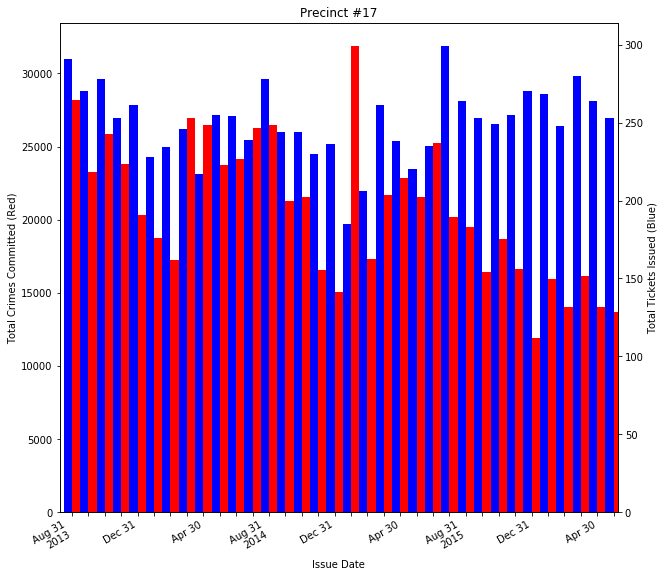

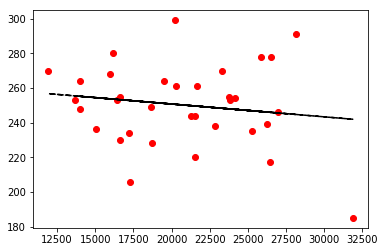

LinregressResult(slope=-0.00074014885840987393, intercept=265.49176138095686, rvalue=-0.15263864250151182, pvalue=0.38879550814678654, stderr=0.00084715036947663523)


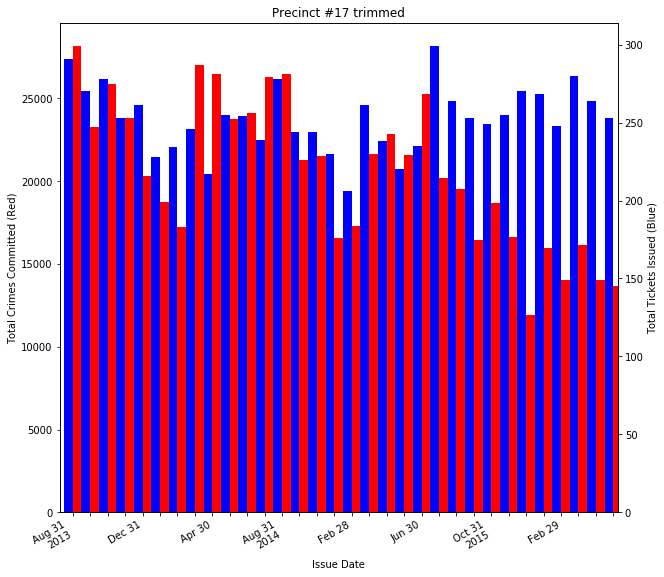

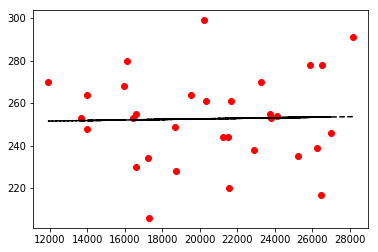

LinregressResult(slope=0.00012852113221389097, intercept=250.01912890438857, rvalue=0.027394046681778268, pvalue=0.88169058496705677, stderr=0.00085623841438354456)


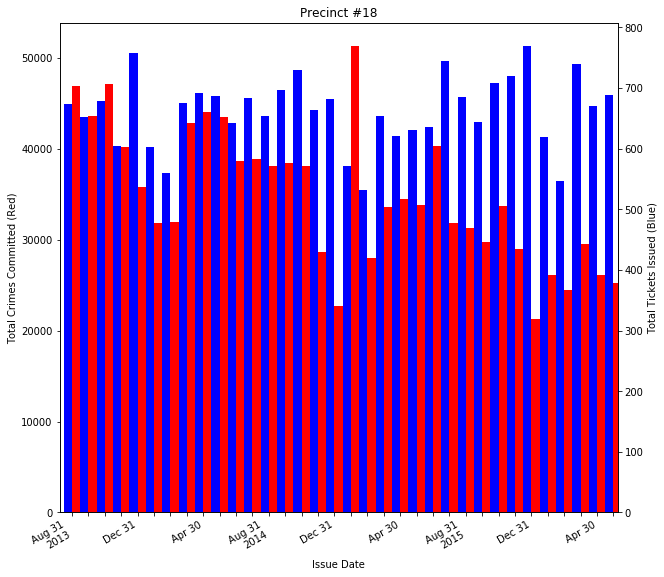

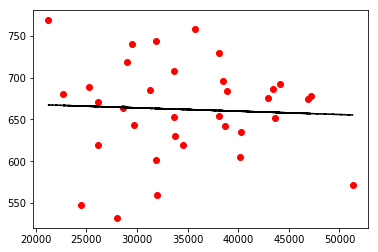

LinregressResult(slope=-0.00039965063754874094, intercept=675.9463070424539, rvalue=-0.052213872027923831, pvalue=0.76931681485685599, stderr=0.0013512223063604557)


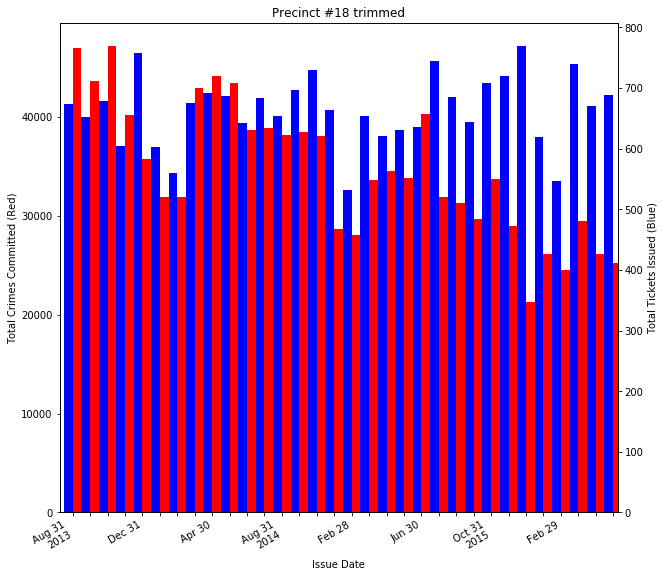

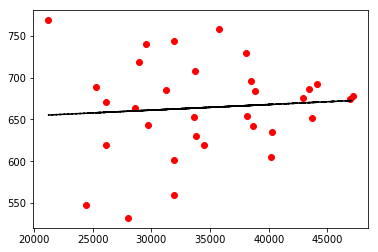

LinregressResult(slope=0.00067040190004242063, intercept=641.11097964261944, rvalue=0.080521357215140338, pvalue=0.66132266424135588, stderr=0.001515133928310153)


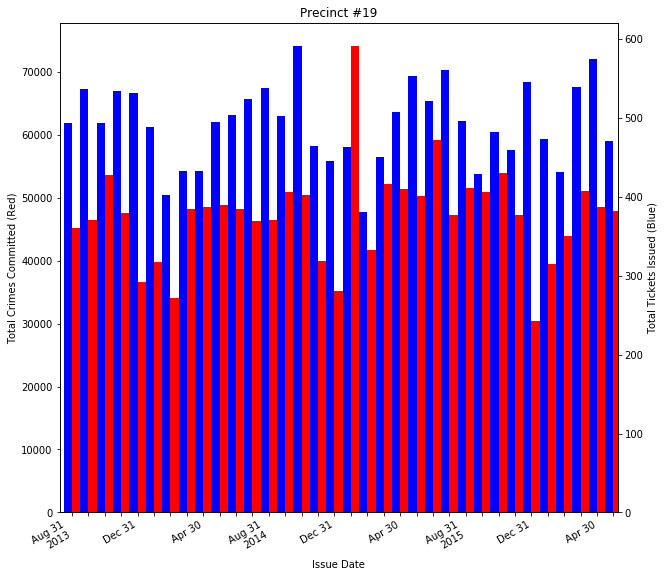

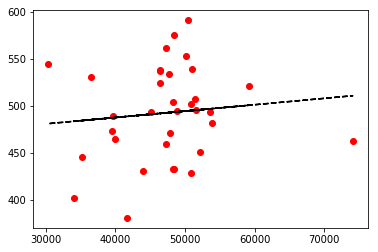

LinregressResult(slope=0.00067808976952379906, intercept=460.55710404795303, rvalue=0.1059439486700446, pvalue=0.55095503740854568, stderr=0.0011250840793438726)


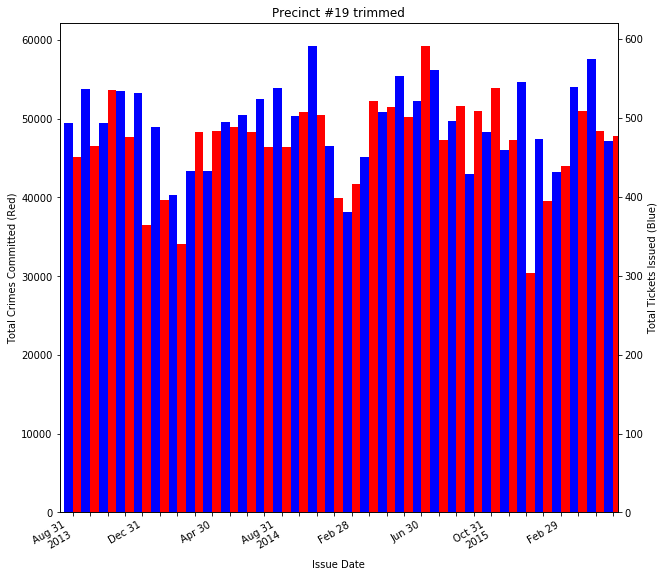

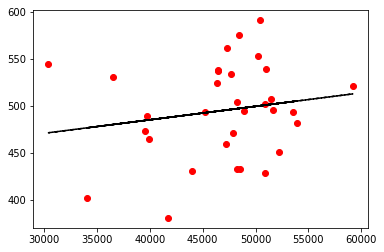

LinregressResult(slope=0.001432232998563171, intercept=427.94598401695669, rvalue=0.17191129769615301, pvalue=0.34679910280085569, stderr=0.0014984229975768572)


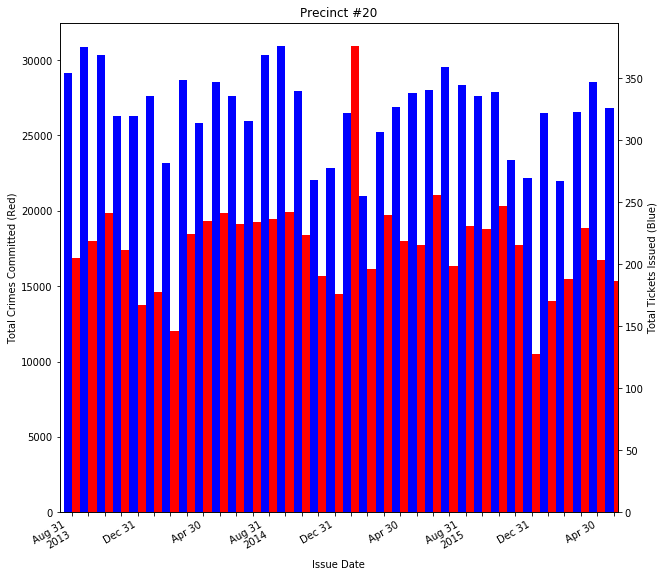

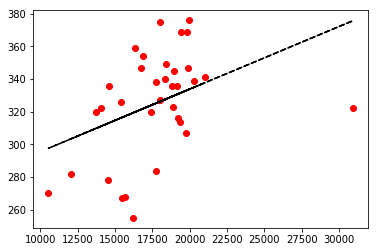

LinregressResult(slope=0.0038284911590940394, intercept=257.26818070800596, rvalue=0.39854677674800565, pvalue=0.019561880137126928, stderr=0.0015574452370536839)


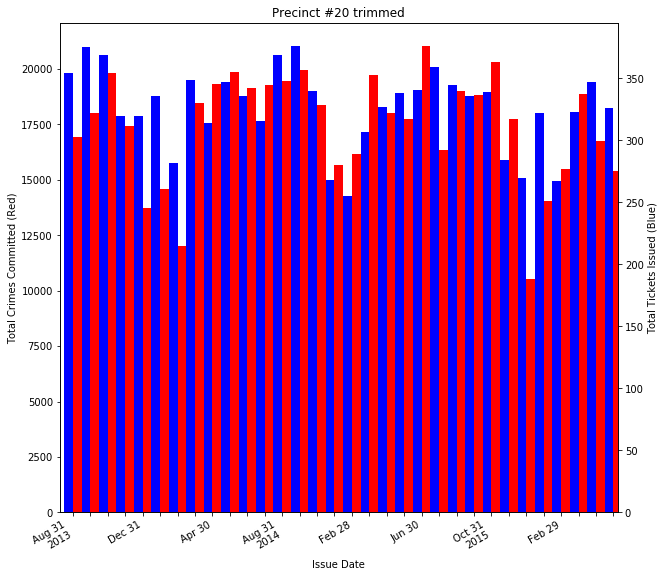

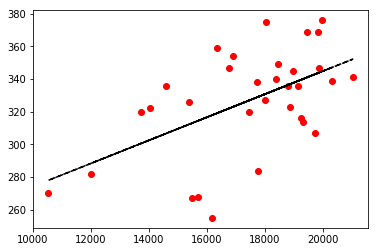

LinregressResult(slope=0.007071104671225765, intercept=203.5009594975983, rvalue=0.5419335792796689, pvalue=0.0013566865098391992, stderr=0.0020020625336544026)


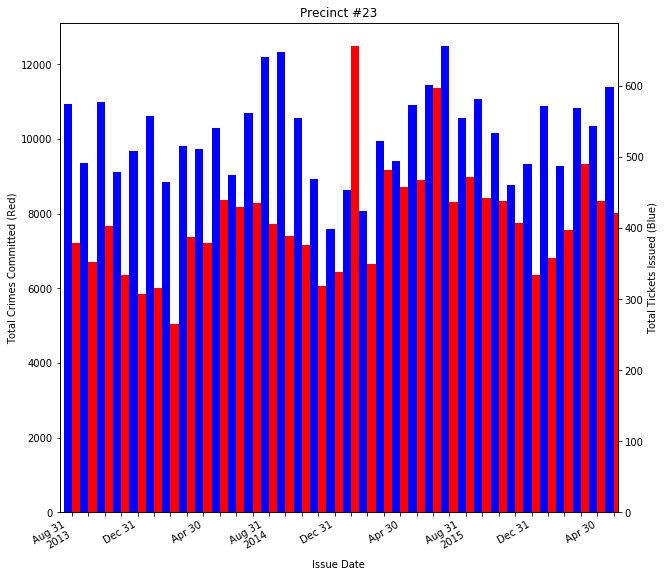

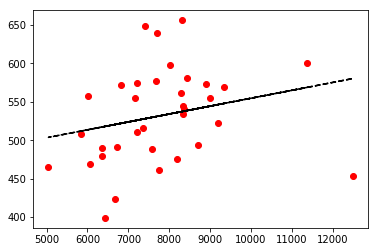

LinregressResult(slope=0.010269316396977696, intercept=451.92020680700693, rvalue=0.24667976999081617, pvalue=0.15959959921675332, stderr=0.0071318184967292426)


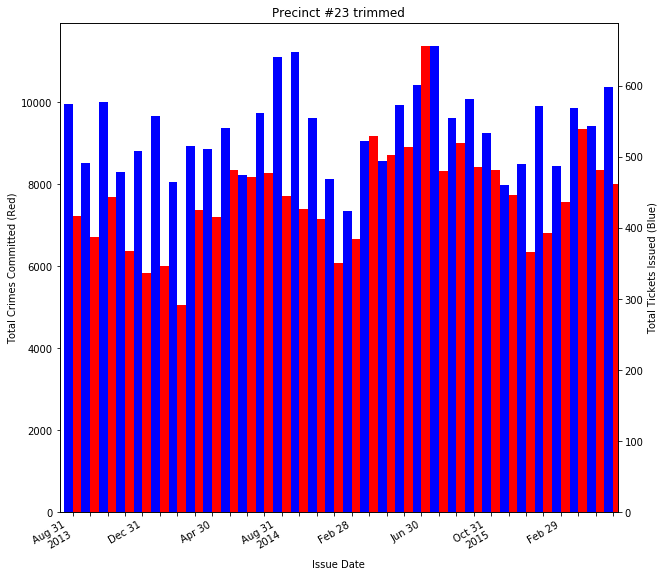

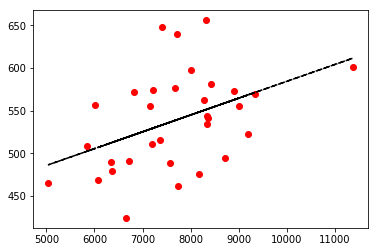

LinregressResult(slope=0.019779159843009413, intercept=386.58643586176601, rvalue=0.43366884156600777, pvalue=0.013150844741393233, stderr=0.0075032366540280773)


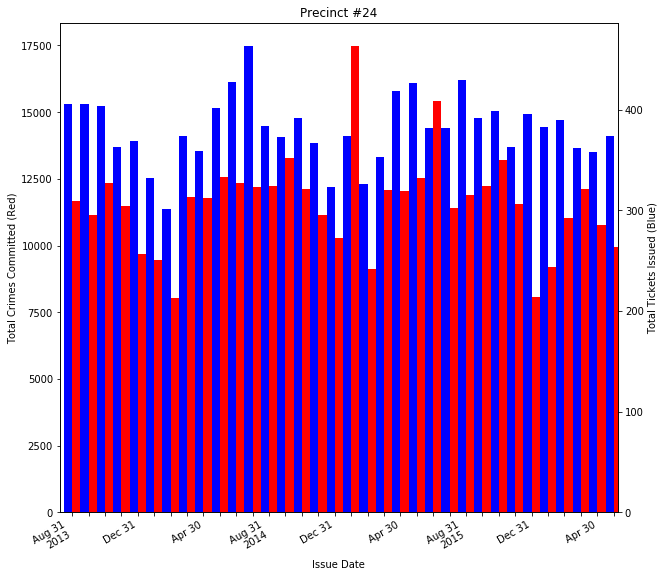

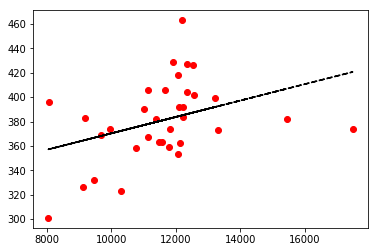

LinregressResult(slope=0.0067309593894576197, intercept=302.98775811794769, rvalue=0.37261813845261371, pvalue=0.029985196605571973, stderr=0.0029633219321959867)


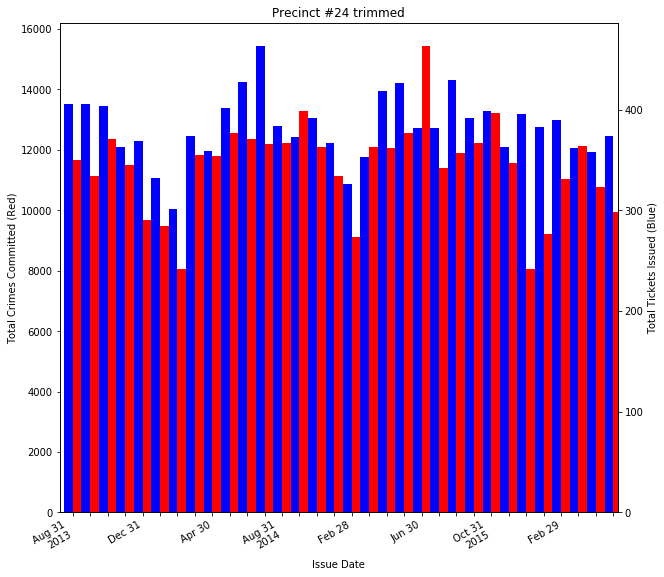

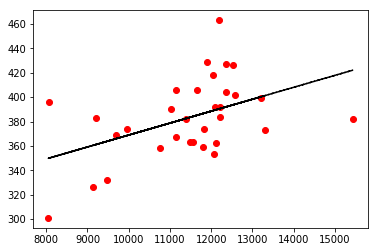

LinregressResult(slope=0.0097787496133717507, intercept=271.12644039853853, rvalue=0.46512513250476273, pvalue=0.0073104222887714048, stderr=0.0033979450160363926)


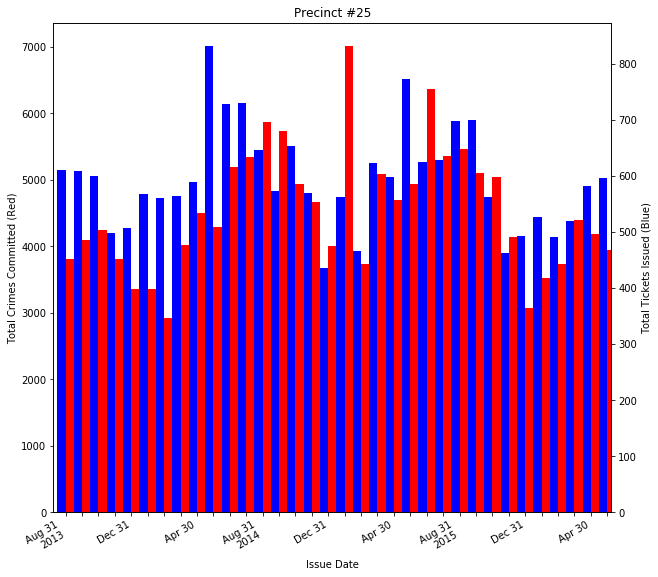

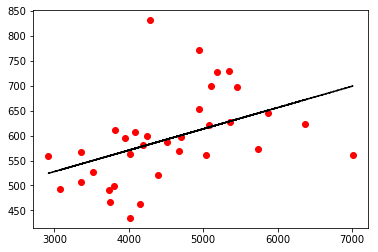

LinregressResult(slope=0.042706678138663169, intercept=399.68905313866776, rvalue=0.44410616420683802, pvalue=0.0085092562072850153, stderr=0.015231037646101736)


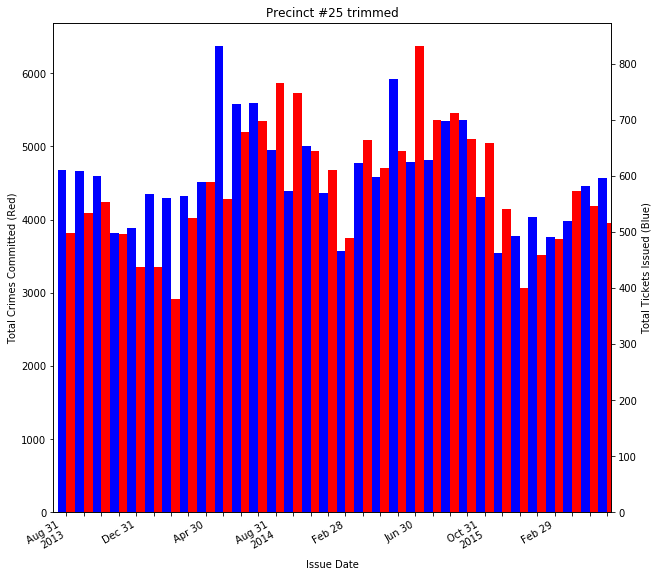

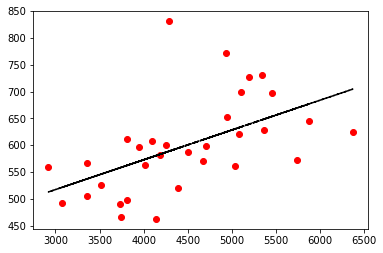

LinregressResult(slope=0.055470932518350835, intercept=351.19579084121449, rvalue=0.53528722964661302, pvalue=0.0015946548922982889, stderr=0.015981041498340797)


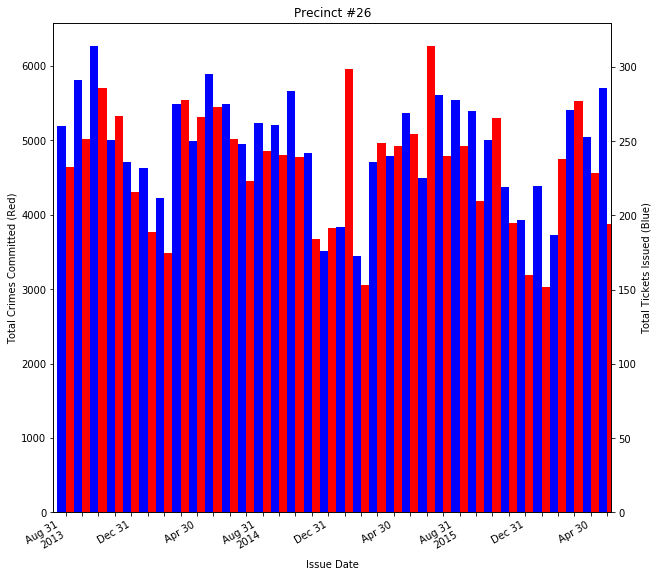

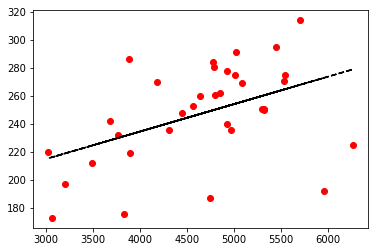

LinregressResult(slope=0.019550122797976566, intercept=156.42376819326427, rvalue=0.4569738716913091, pvalue=0.0065892548267681983, stderr=0.0067269682259197168)


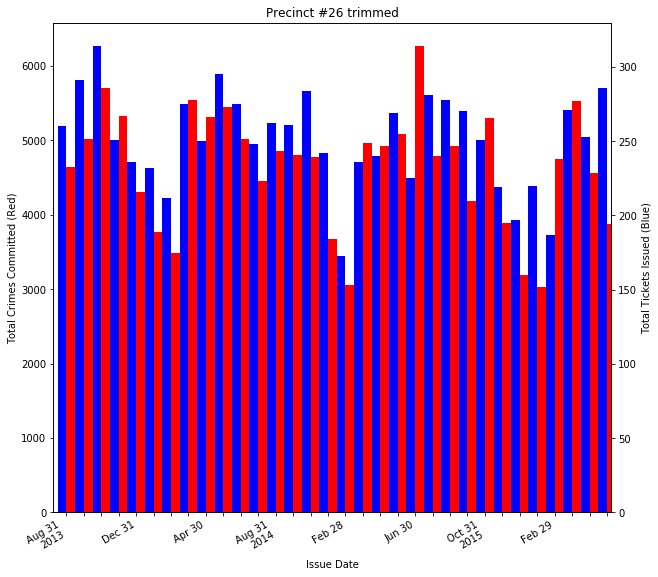

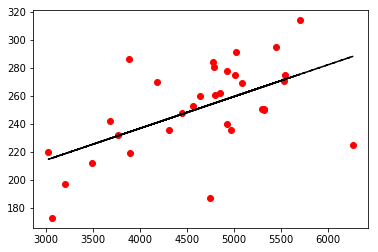

LinregressResult(slope=0.022637682001302832, intercept=146.3524263478933, rvalue=0.56317774670181631, pvalue=0.00079103308453076489, stderr=0.0060643240651613922)


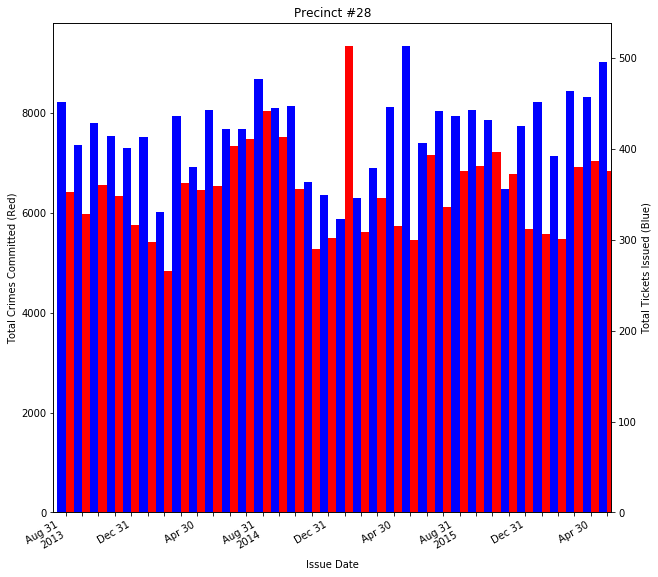

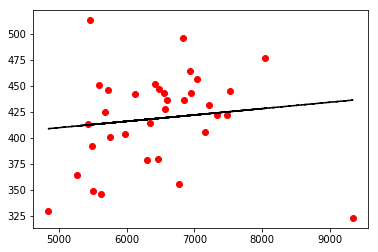

LinregressResult(slope=0.0061030395374246944, intercept=379.22124391060299, rvalue=0.12333469080119605, pvalue=0.48710585959912633, stderr=0.008680753838699878)


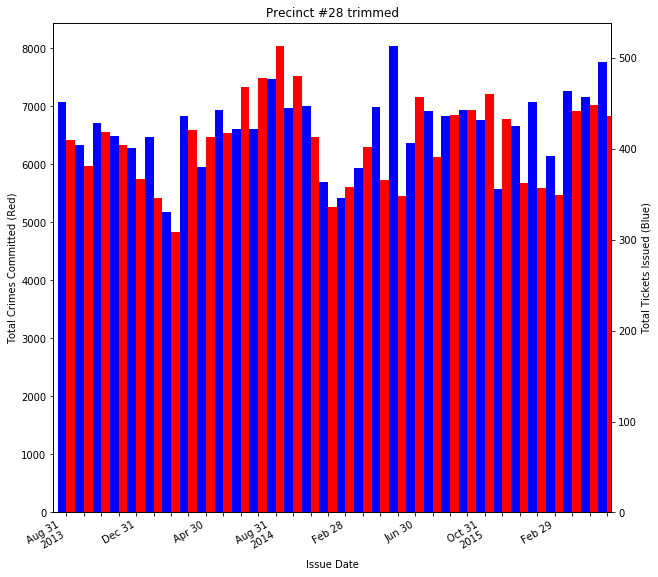

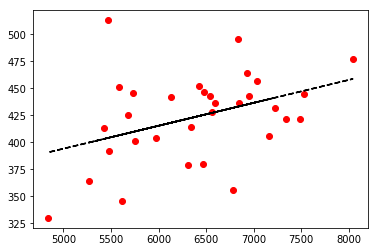

LinregressResult(slope=0.021229008709952733, intercept=287.9435272236916, rvalue=0.39489726799816005, pvalue=0.025300003808562743, stderr=0.009017177680690696)


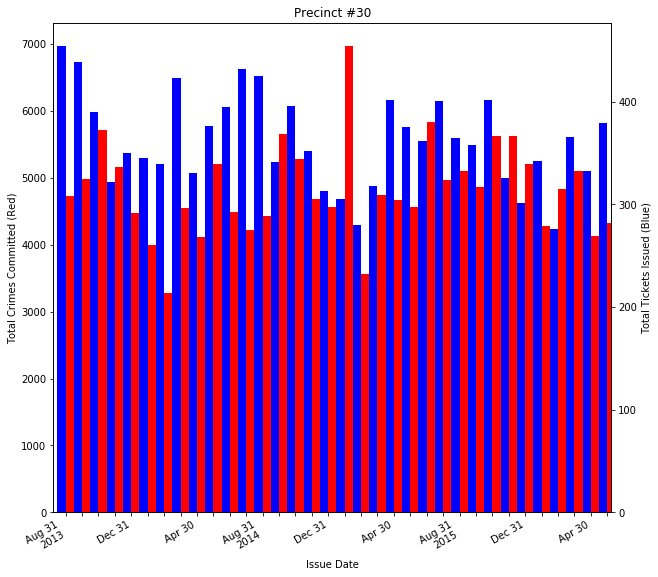

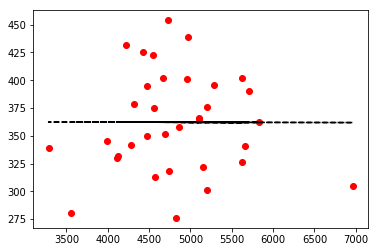

LinregressResult(slope=-0.00011776179977823676, intercept=362.68518619852534, rvalue=-0.0018365423593469949, pvalue=0.99177537127543047, stderr=0.011335162831058503)


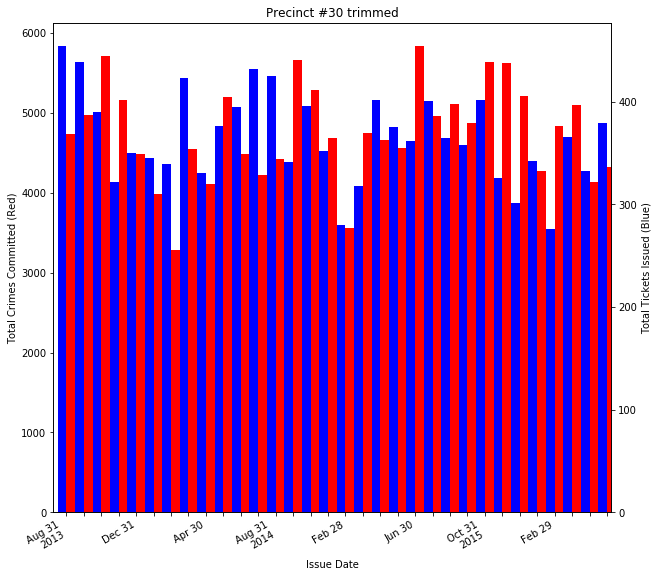

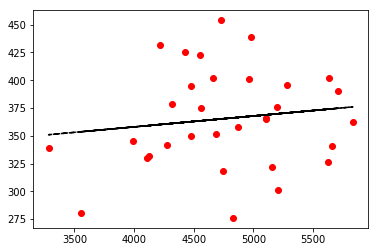

LinregressResult(slope=0.0098274548828784156, intercept=318.65697210970819, rvalue=0.1352447339796348, pvalue=0.46050094751410331, stderr=0.013144722528484193)


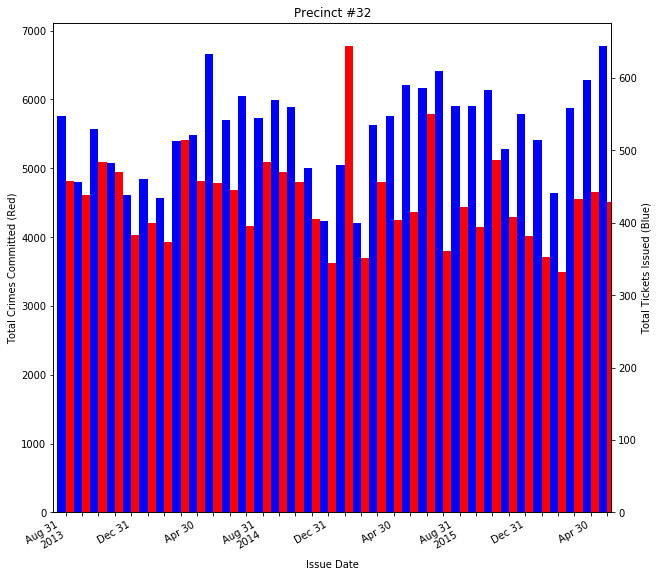

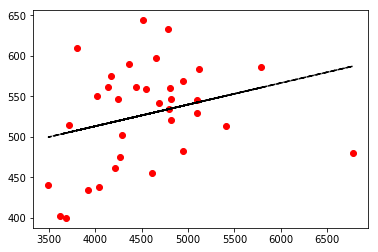

LinregressResult(slope=0.02667219977737861, intercept=406.51993377717491, rvalue=0.28025392413926475, pvalue=0.10840975238750544, stderr=0.016149900635205921)


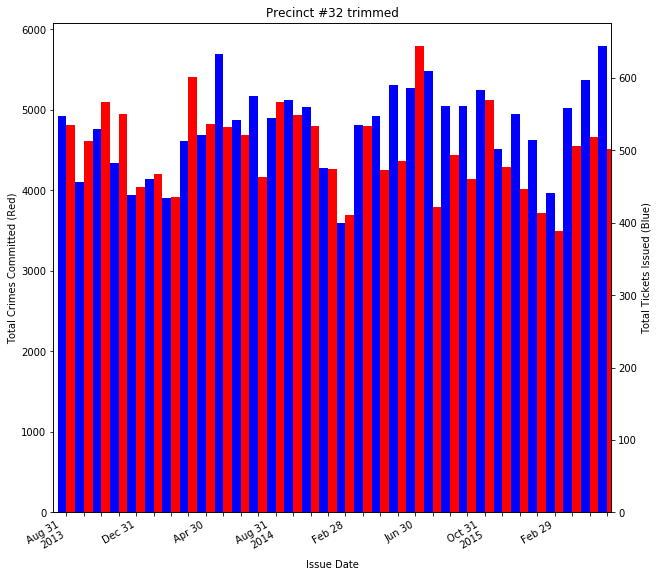

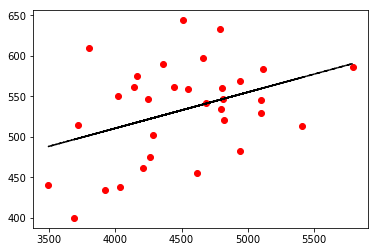

LinregressResult(slope=0.044590505304066295, intercept=332.26665806166568, rvalue=0.39048720048210611, pvalue=0.027132600469553712, stderr=0.01919330993018617)


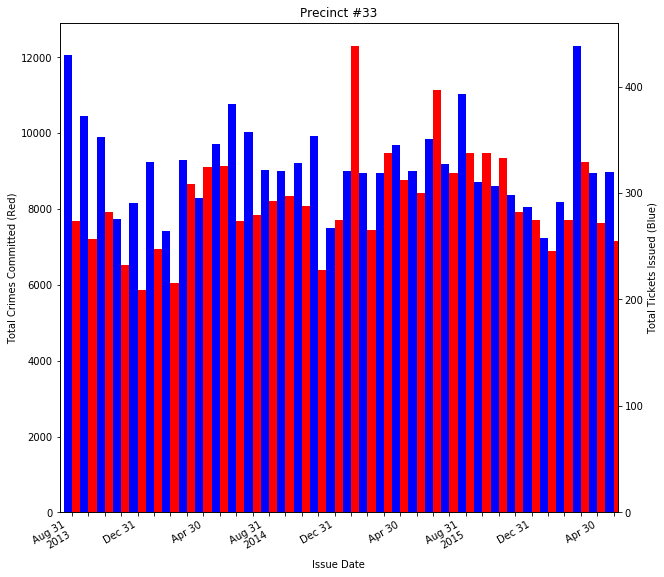

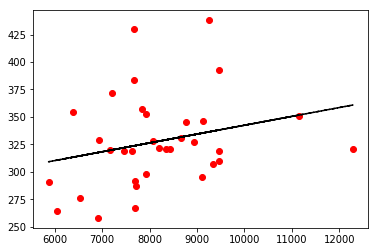

LinregressResult(slope=0.0080467334592767767, intercept=261.91574748459101, rvalue=0.2572537202354937, pvalue=0.1418934706149971, stderr=0.0053433628924094406)


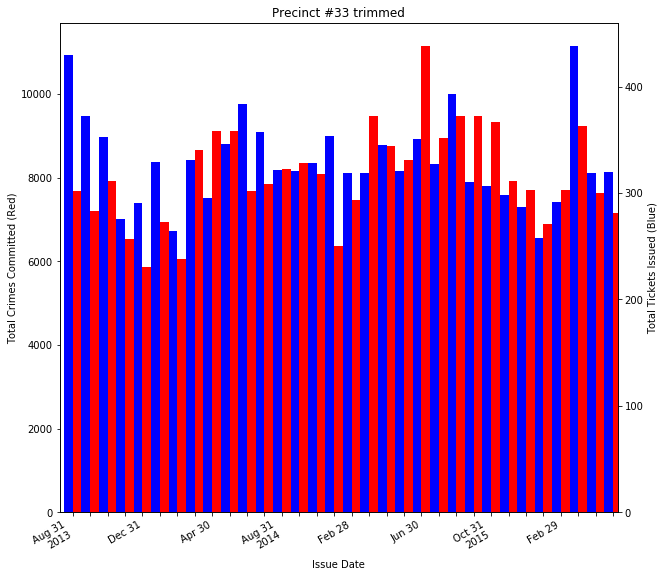

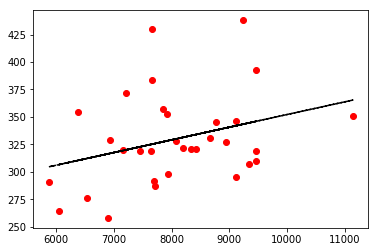

LinregressResult(slope=0.01153901875098629, intercept=236.73913082152879, rvalue=0.32078801469788065, pvalue=0.073437844859774518, stderr=0.0062202716002372847)


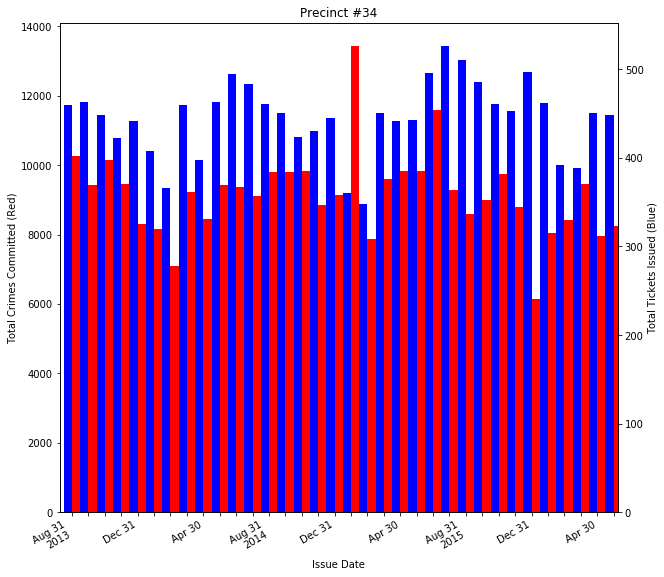

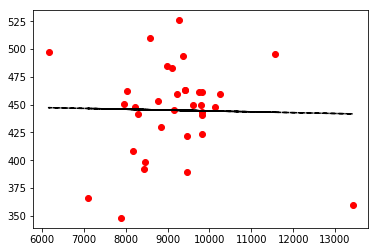

LinregressResult(slope=-0.00076611823394105499, intercept=451.99253504003781, rvalue=-0.022889981913953604, pvalue=0.89775751565011563, stderr=0.0059150927081544555)


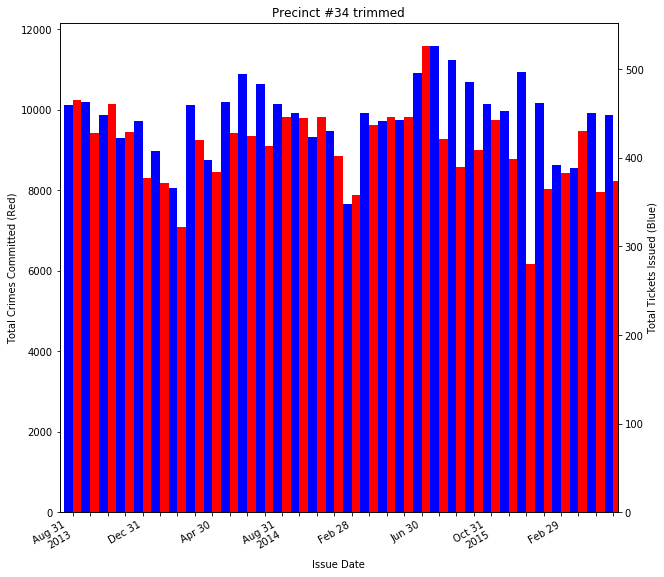

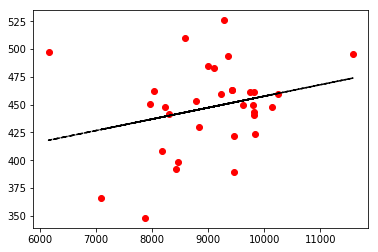

LinregressResult(slope=0.010328512763206888, intercept=354.32915804007143, rvalue=0.26334133001221838, pvalue=0.14532000055157268, stderr=0.0069079890887465906)


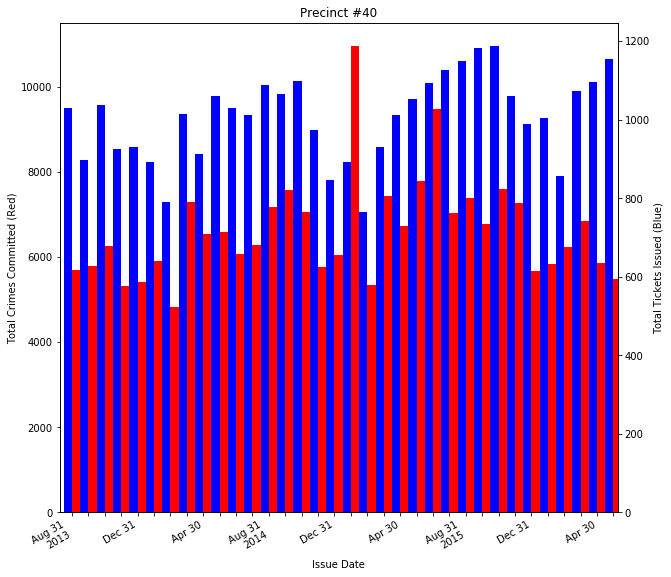

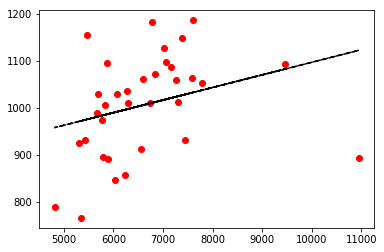

LinregressResult(slope=0.026901914865372138, intercept=828.23828115709227, rvalue=0.29940471184460254, pvalue=0.085391385432652719, stderr=0.015154981089897721)


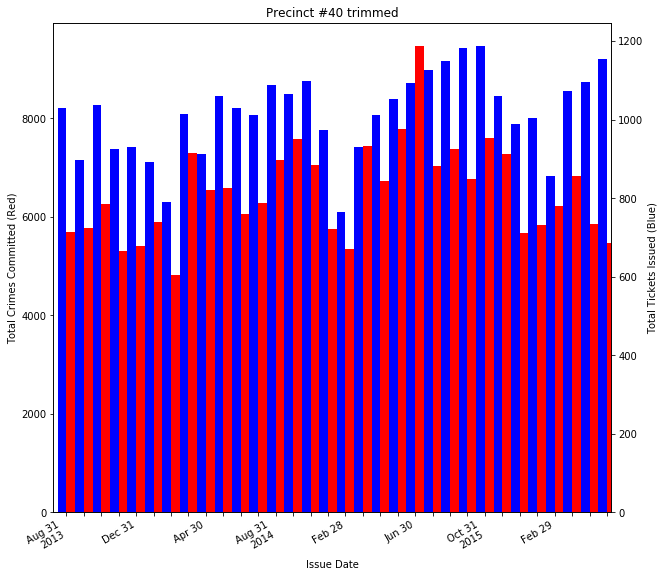

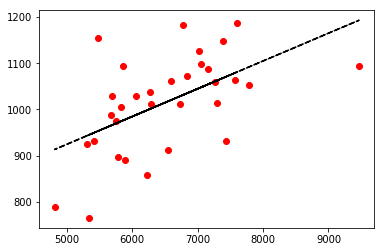

LinregressResult(slope=0.060175277343754621, intercept=623.44295740817302, rvalue=0.54700389779781744, pvalue=0.0011966334127410782, stderr=0.016813572030183251)


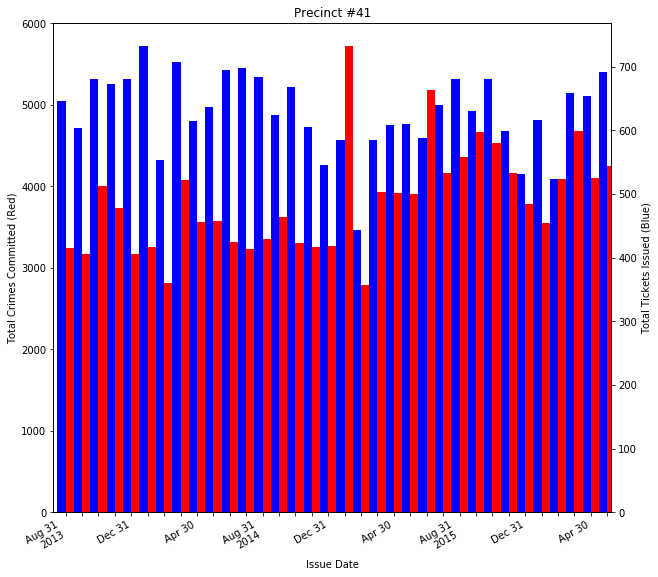

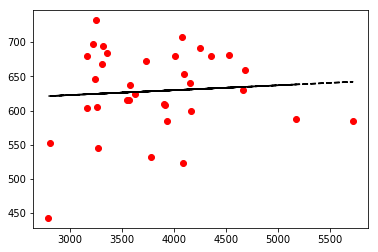

LinregressResult(slope=0.0071387196443709697, intercept=601.16453159737318, rvalue=0.075152770821355061, pvalue=0.67271888590044837, stderr=0.01674443234722359)


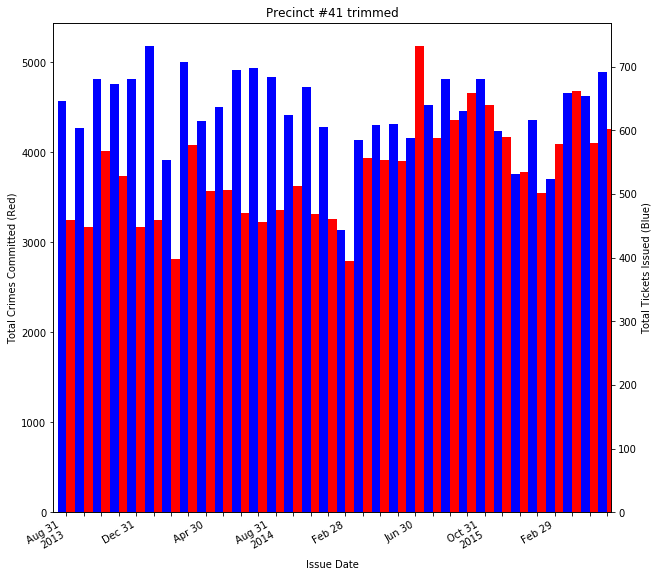

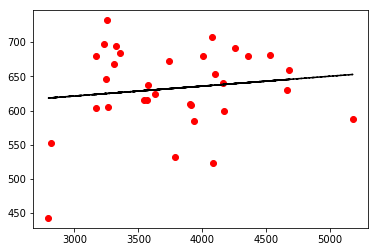

LinregressResult(slope=0.014473740861782623, intercept=577.77647203040726, rvalue=0.13382886662238597, pvalue=0.46525260333542029, stderr=0.019567978983048115)


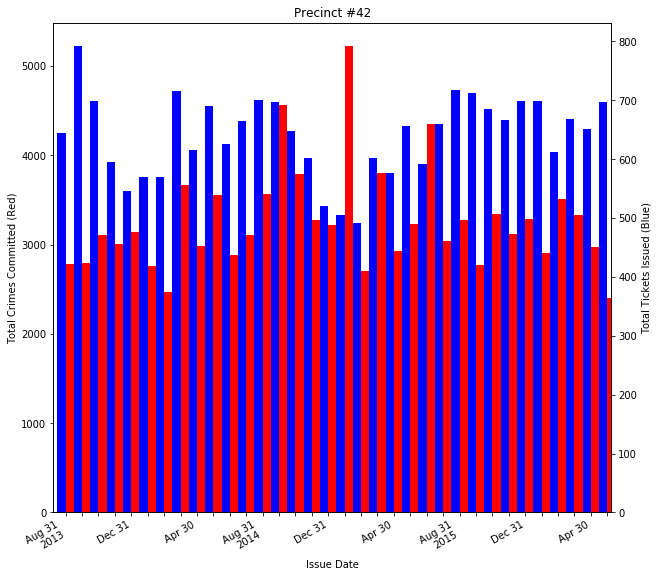

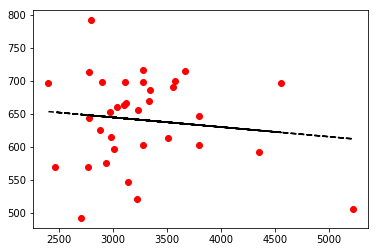

LinregressResult(slope=-0.01464680089281861, intercept=688.52792359383443, rvalue=-0.12422663935761297, pvalue=0.48393718199328861, stderr=0.020681205659605462)


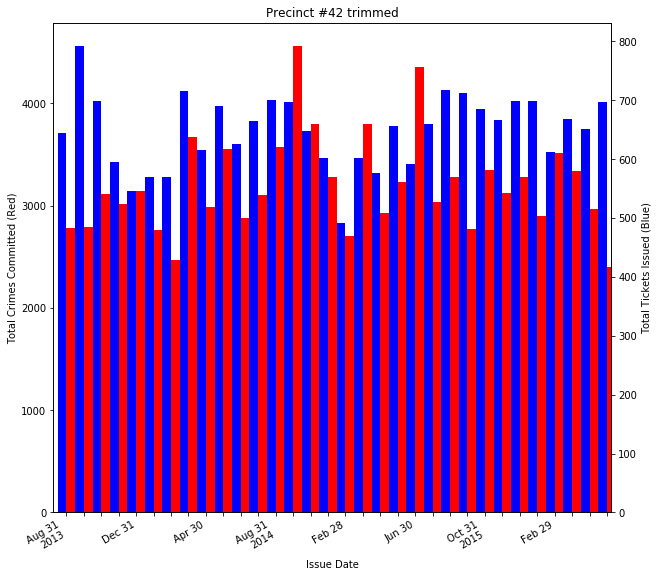

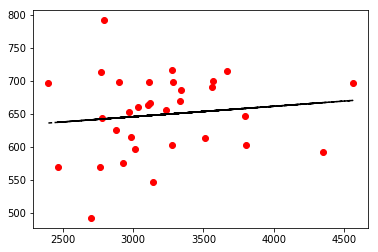

LinregressResult(slope=0.015870131323640888, intercept=597.95119745783711, rvalue=0.12257115634374366, pvalue=0.50393708710332752, stderr=0.02346089105895674)


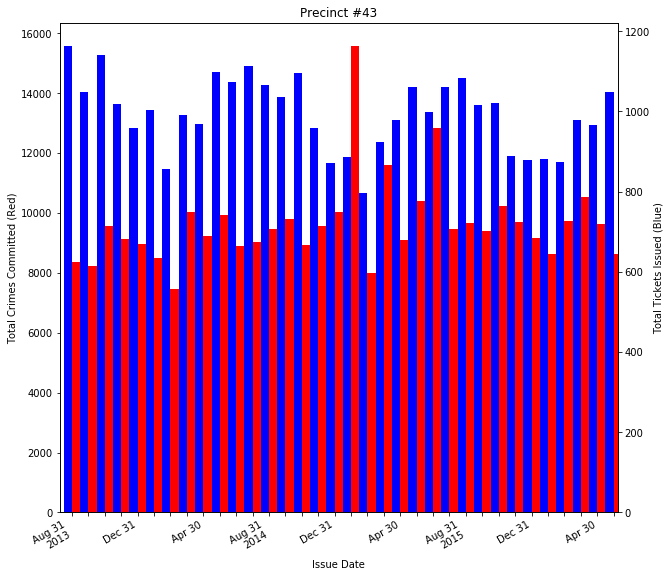

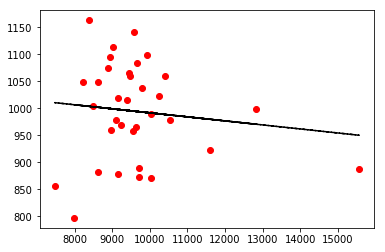

LinregressResult(slope=-0.0074458592881409963, intercept=1066.0081017166194, rvalue=-0.11900292171163533, pvalue=0.50264507172400086, stderr=0.010982091445343076)


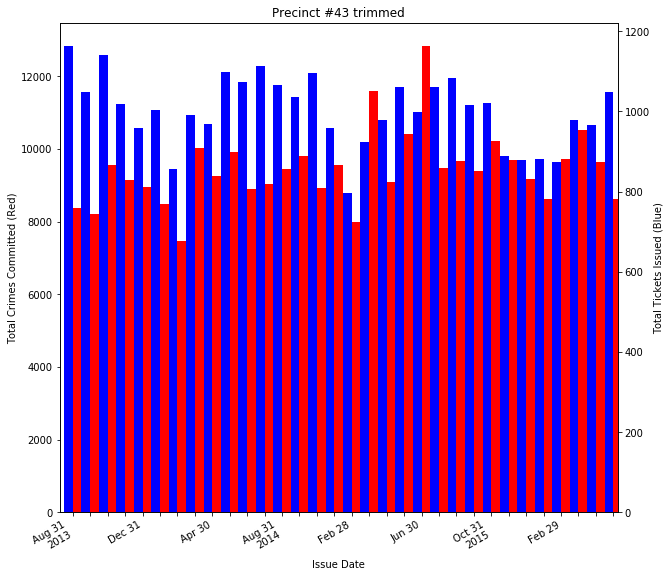

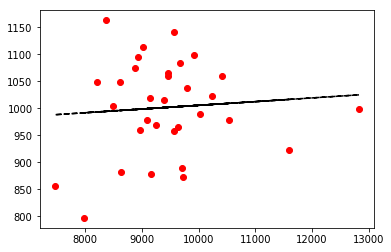

LinregressResult(slope=0.0068659044706181104, intercept=936.79113482993887, rvalue=0.079192812285832331, pvalue=0.66658719531139621, stderr=0.01577920926101414)


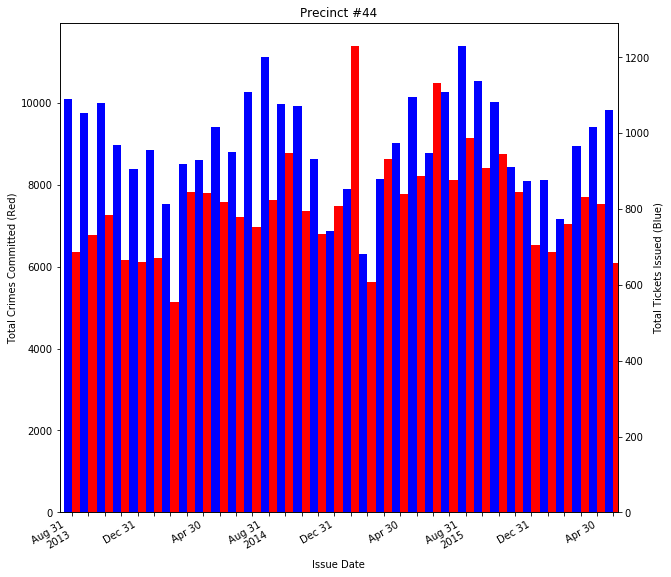

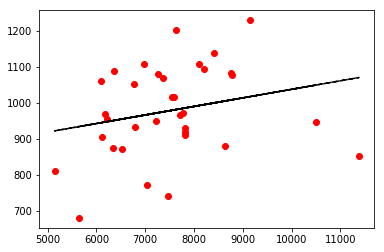

LinregressResult(slope=0.023696689869663907, intercept=800.50342924670451, rvalue=0.2404485445680998, pvalue=0.17075069961074849, stderr=0.016910580650825409)


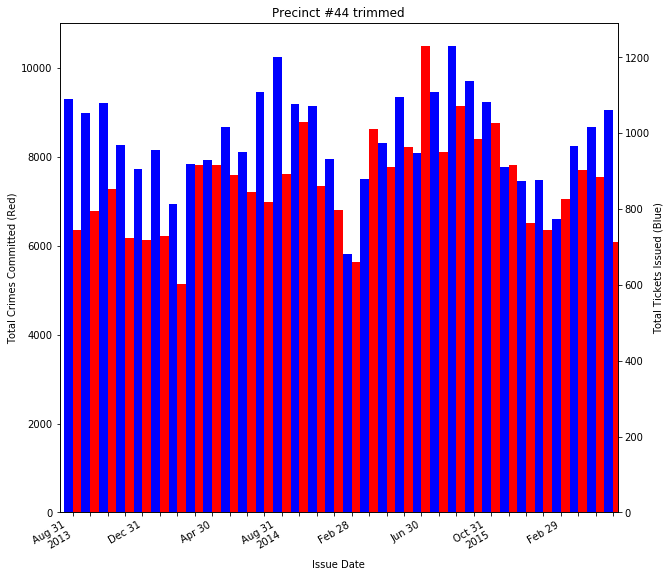

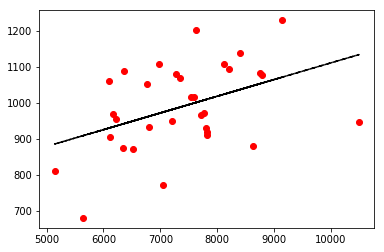

LinregressResult(slope=0.046348697148359451, intercept=647.48409650866461, rvalue=0.4303871697178322, pvalue=0.013939539171768321, stderr=0.017747380957048878)


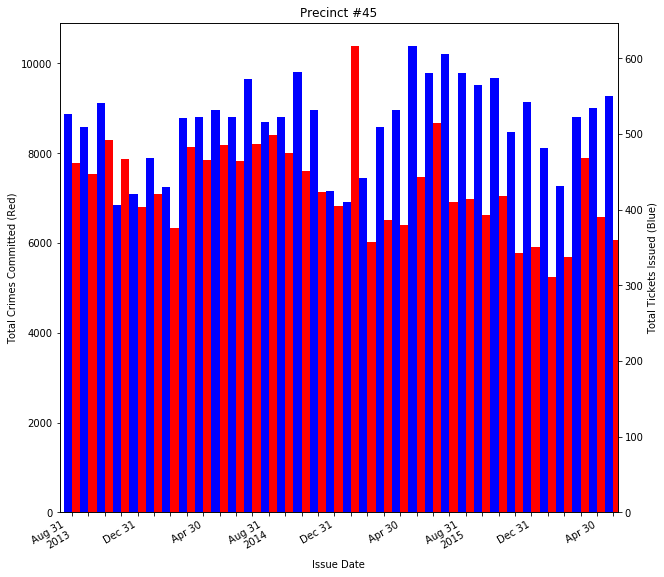

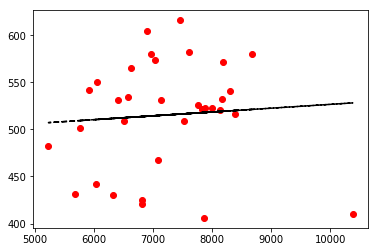

LinregressResult(slope=0.0040683267996103004, intercept=485.94549575591384, rvalue=0.074764385102089034, pvalue=0.67431726395652647, stderr=0.0095924353461545511)


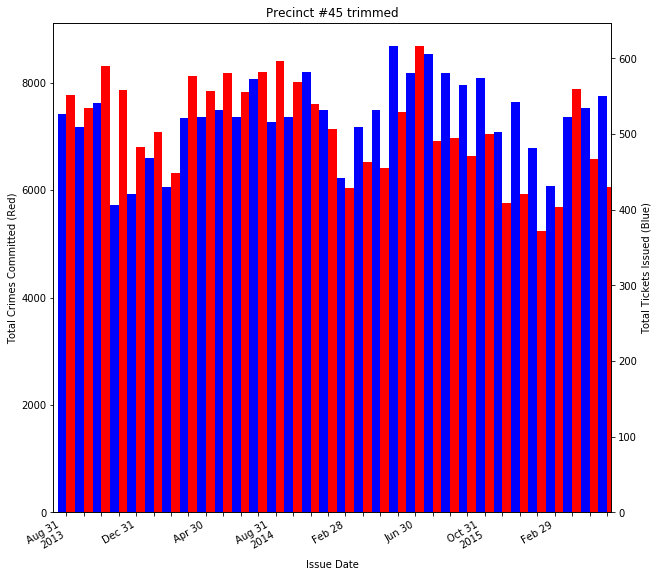

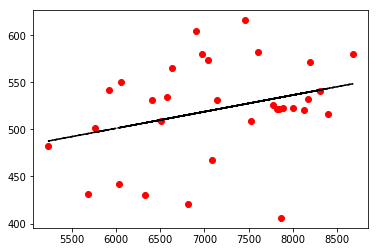

LinregressResult(slope=0.017638832598342962, intercept=395.38069328129171, rvalue=0.30484554246102535, pvalue=0.089789845253064576, stderr=0.010061195115387429)


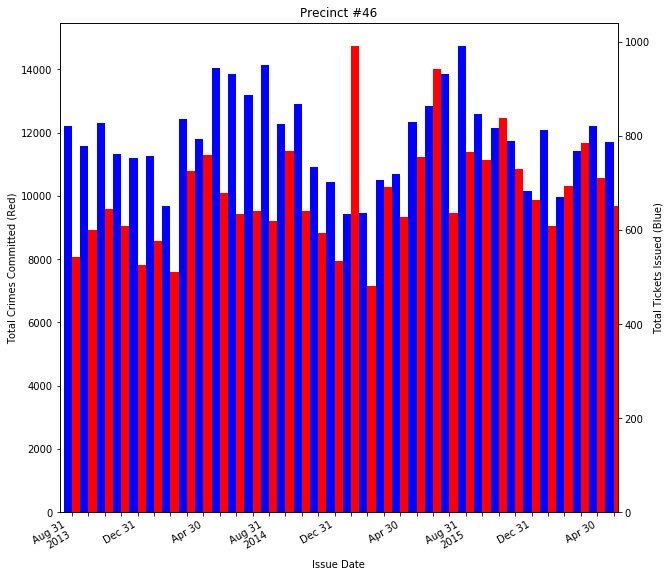

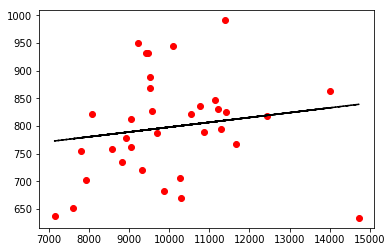

LinregressResult(slope=0.0087168104416069751, intercept=710.76520773959157, rvalue=0.15873327115254274, pvalue=0.36990596885625249, stderr=0.0095845834214137327)


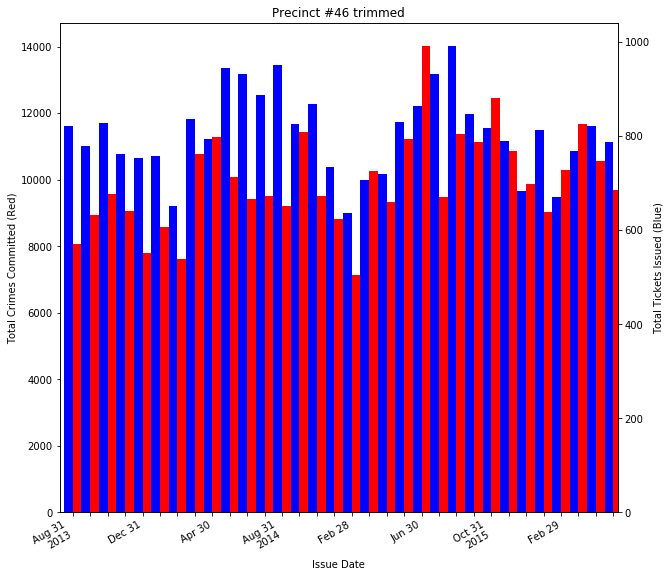

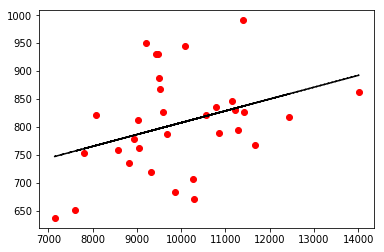

LinregressResult(slope=0.021183671025717526, intercept=595.70152173707618, rvalue=0.35042957998161206, pvalue=0.049262163067014801, stderr=0.010336867012800741)


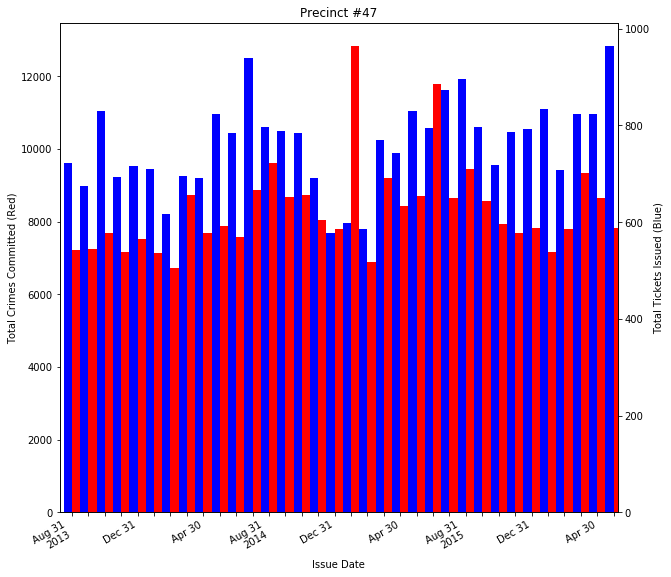

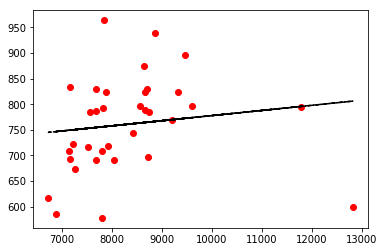

LinregressResult(slope=0.010013794705879514, intercept=677.65960451357034, rvalue=0.13647086839029721, pvalue=0.44153627480726843, stderr=0.012849948583863766)


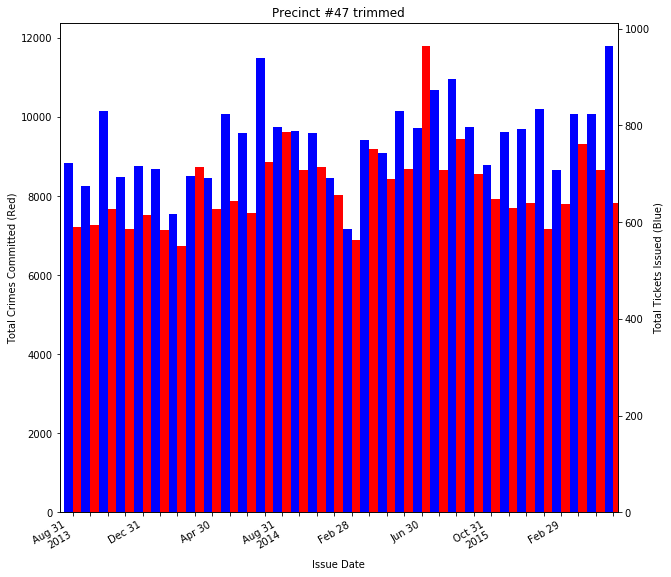

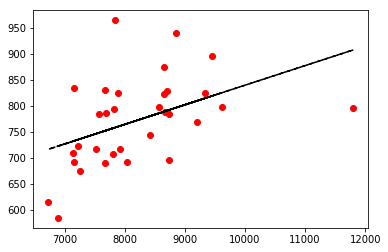

LinregressResult(slope=0.037556906169096314, intercept=463.87447573261721, rvalue=0.45102041753558642, pvalue=0.0095754916482717837, stderr=0.013568999832906683)


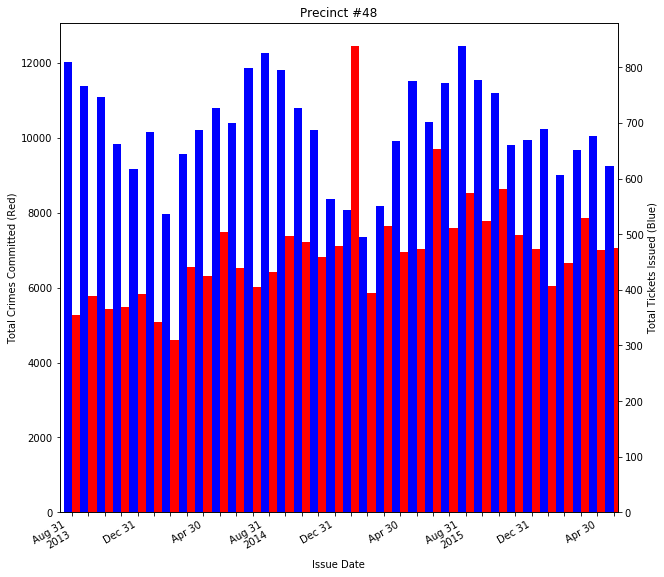

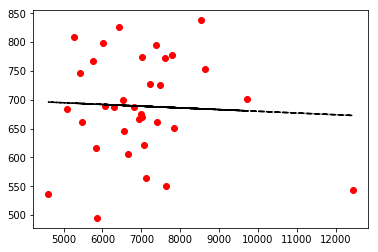

LinregressResult(slope=-0.0029643466235871885, intercept=709.65115061168638, rvalue=-0.048718647663186274, pvalue=0.78438216390339166, stderr=0.010743425038021373)


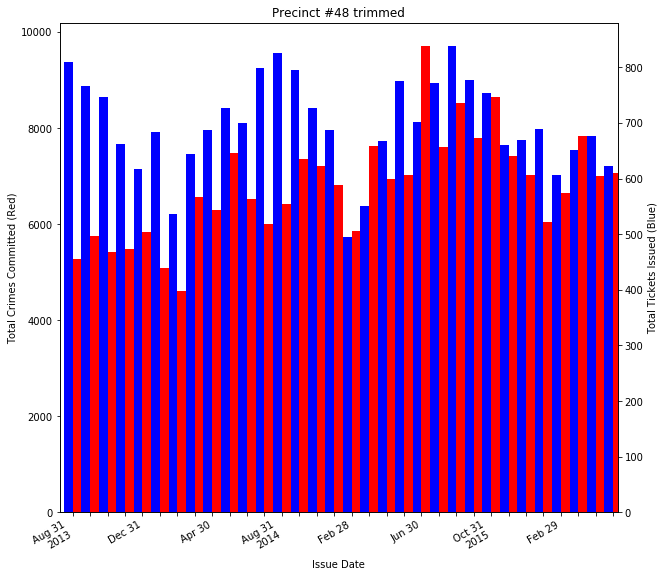

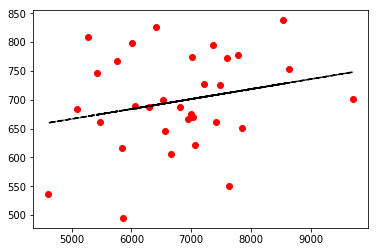

LinregressResult(slope=0.017257522920612386, intercept=580.46220530065671, rvalue=0.2285250251557466, pvalue=0.20838207040958526, stderr=0.013422610605095737)


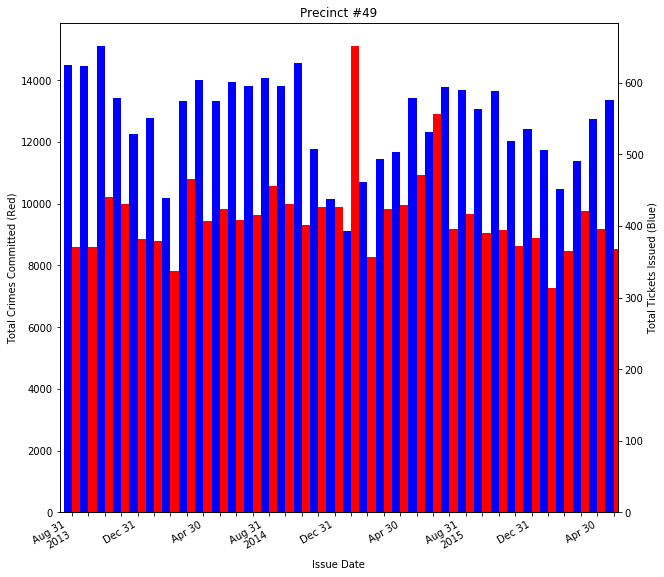

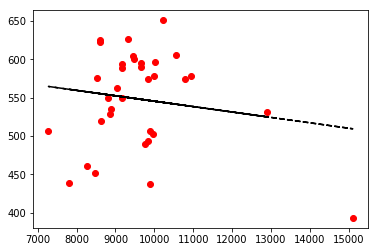

LinregressResult(slope=-0.0070526775454077635, intercept=615.89093069086607, rvalue=-0.1572518639499402, pvalue=0.37444666287440442, stderr=0.007829717299338193)


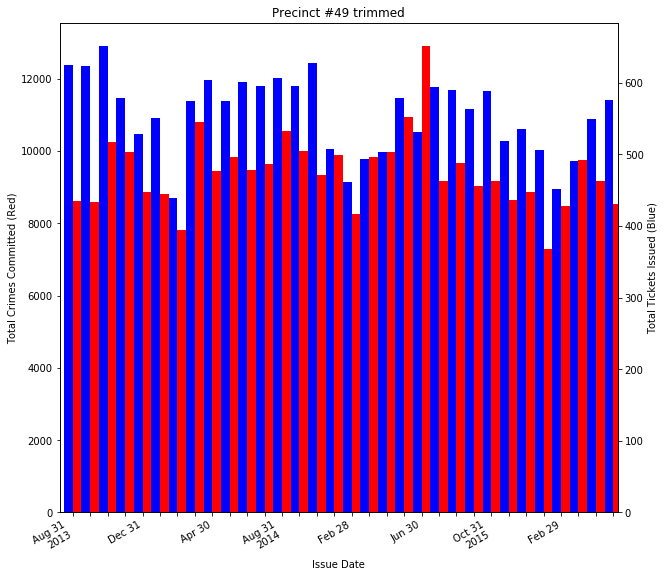

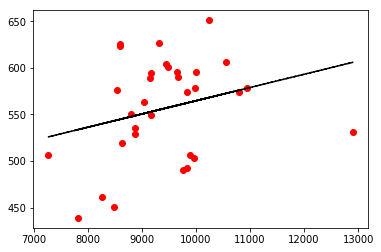

LinregressResult(slope=0.014207315145286658, intercept=422.57590422063049, rvalue=0.27125075839035762, pvalue=0.13317621463119697, stderr=0.0092041798454973161)


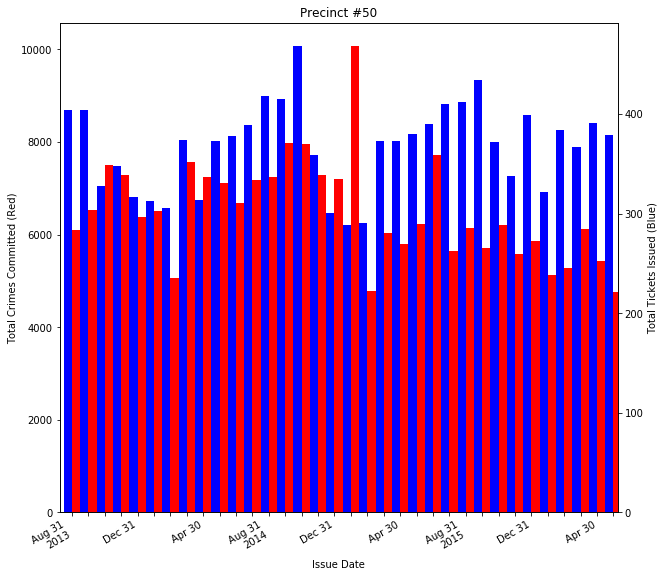

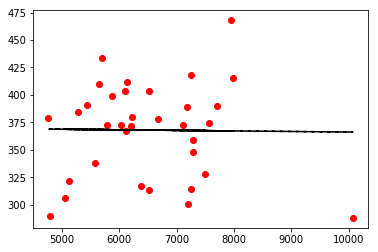

LinregressResult(slope=-0.00050274297907990702, intercept=371.24239518347156, rvalue=-0.012797313787346545, pvalue=0.94273543450832387, stderr=0.0069441107847688236)


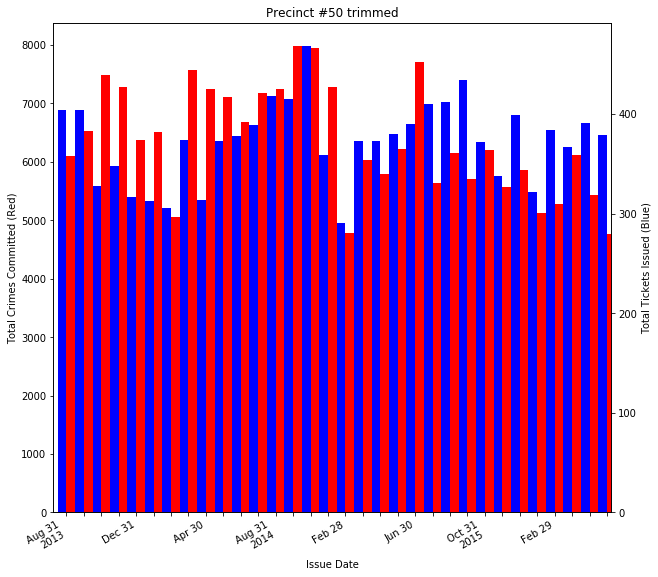

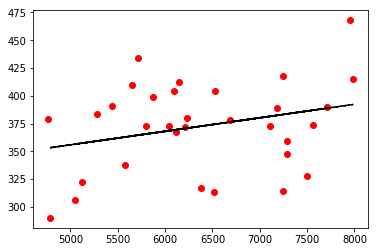

LinregressResult(slope=0.012167571772698947, intercept=294.99156829271897, rvalue=0.27928779065725673, pvalue=0.12161727493984154, stderr=0.0076375911450128949)


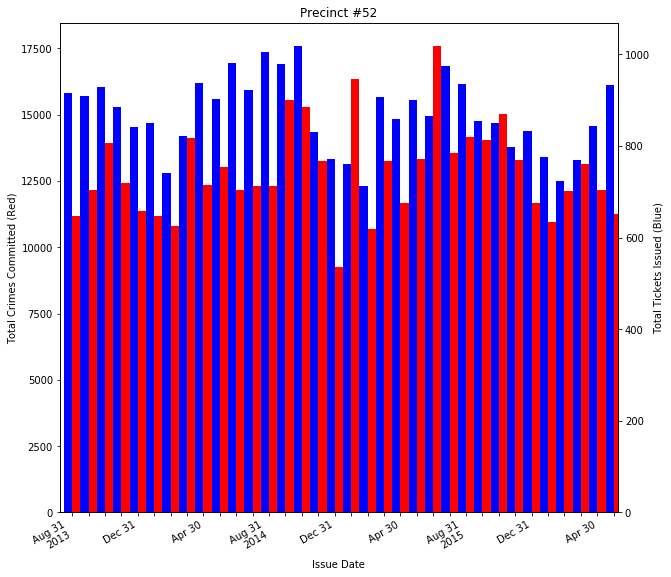

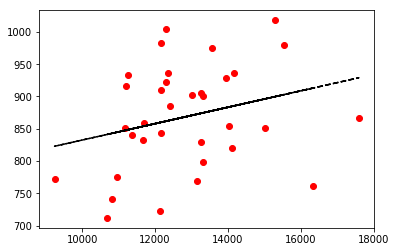

LinregressResult(slope=0.012719473709907924, intercept=705.30263411247893, rvalue=0.27330114776929781, pvalue=0.11783137347506441, stderr=0.0079139900456644211)


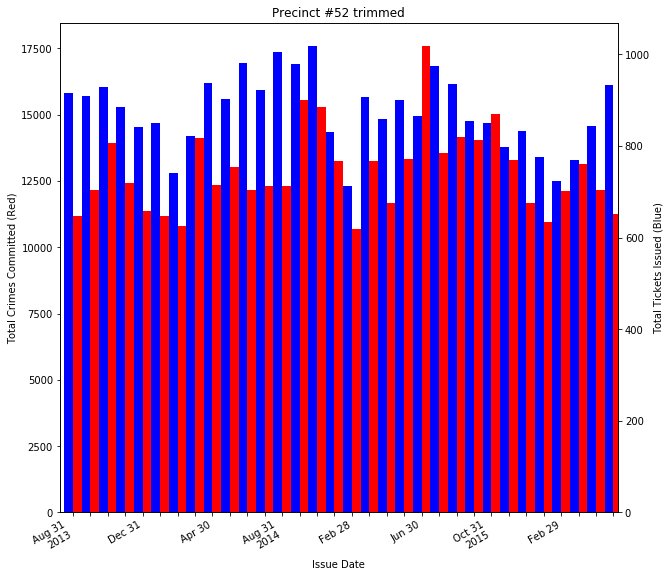

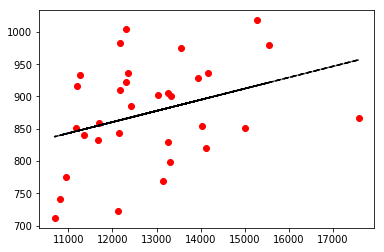

LinregressResult(slope=0.017258374705682509, intercept=653.29552856477494, rvalue=0.33919272373385356, pvalue=0.05754345919233491, stderr=0.0087387977458572106)


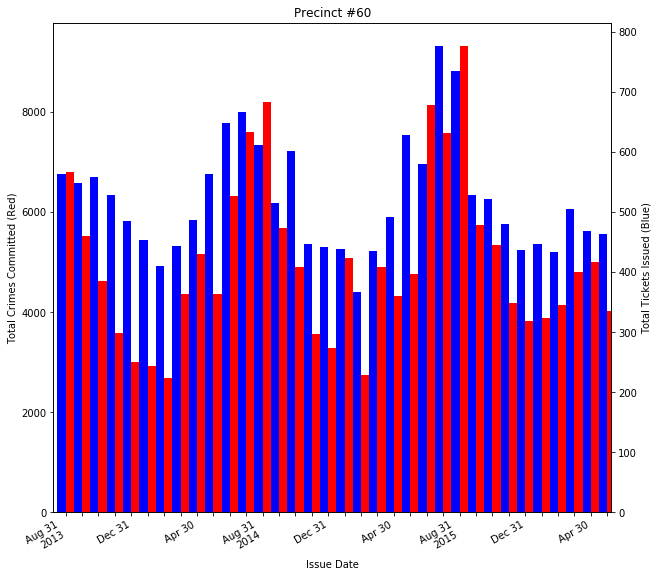

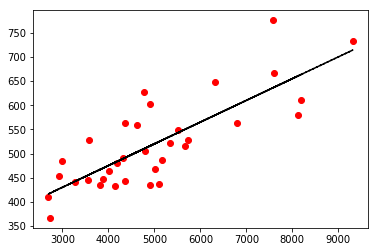

LinregressResult(slope=0.044953355061394494, intercept=295.51566738688746, rvalue=0.79845171432206119, pvalue=1.531695235106406e-08, stderr=0.005992077323987619)


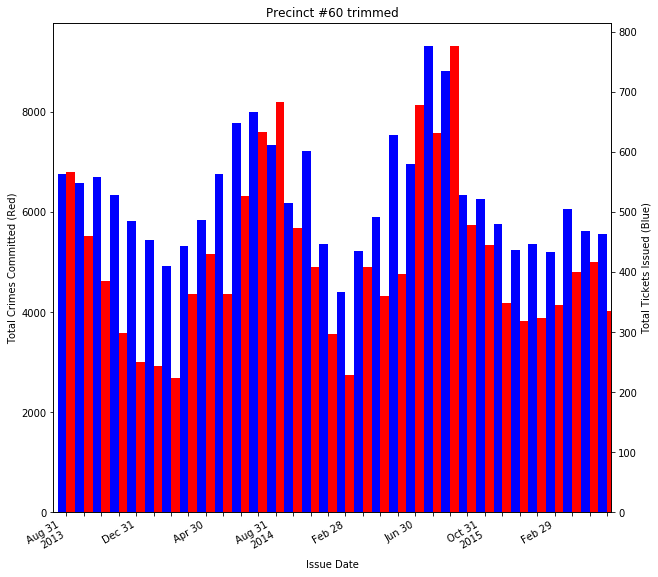

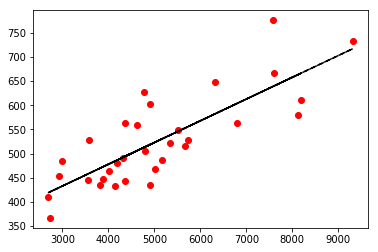

LinregressResult(slope=0.044958587802632864, intercept=298.21982491113863, rvalue=0.80451329369845981, pvalue=2.8791464390874072e-08, stderr=0.0060597885003984536)


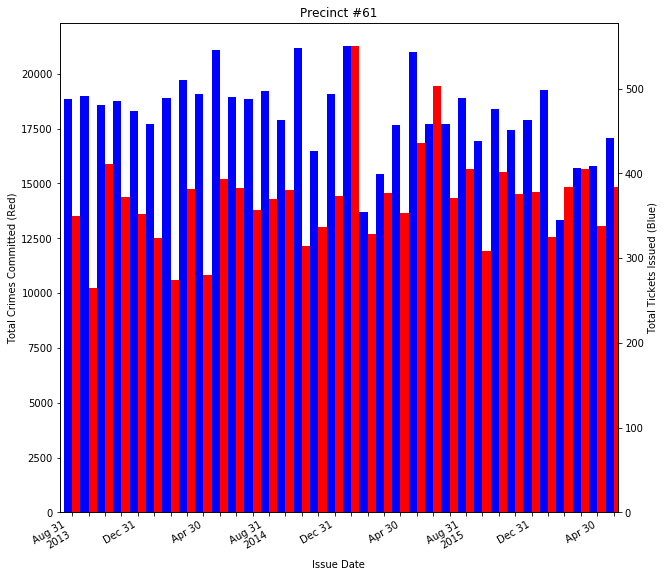

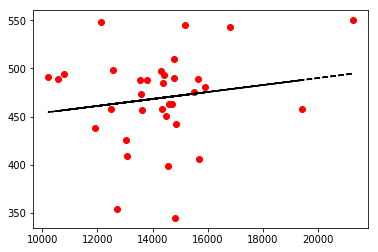

LinregressResult(slope=0.0036183705218565008, intercept=417.69898830738873, rvalue=0.16392253361051667, pvalue=0.35425899489737045, stderr=0.0038493259455167038)


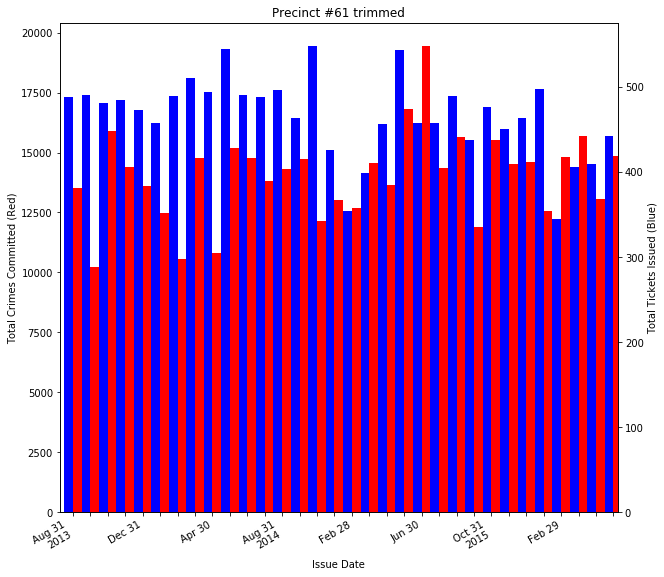

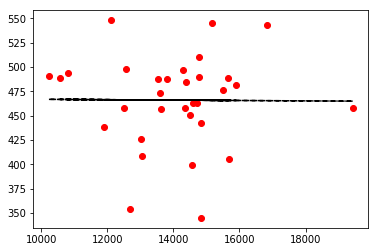

LinregressResult(slope=-0.00020109939282505541, intercept=468.82077719266488, rvalue=-0.0078962422230958538, pvalue=0.96578816683778135, stderr=0.0046496057545498603)


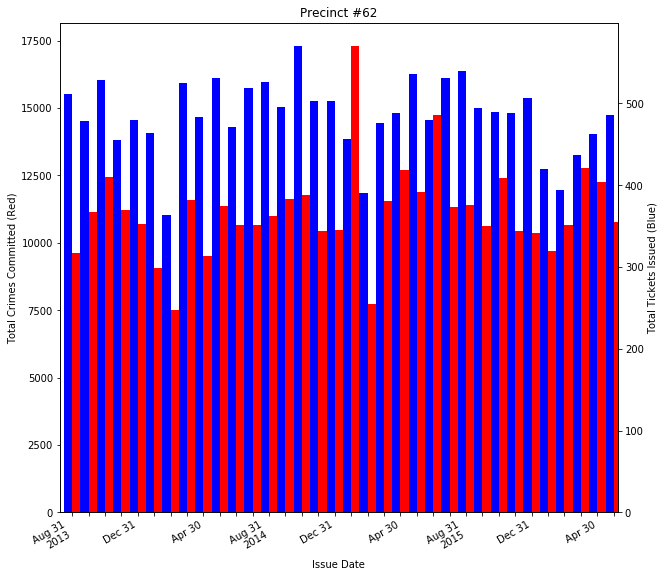

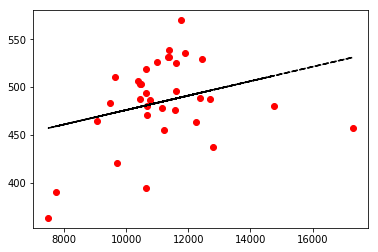

LinregressResult(slope=0.0075537095204073236, intercept=400.4492259455256, rvalue=0.29420757750419813, pvalue=0.091228066106540467, stderr=0.0043378237429118026)


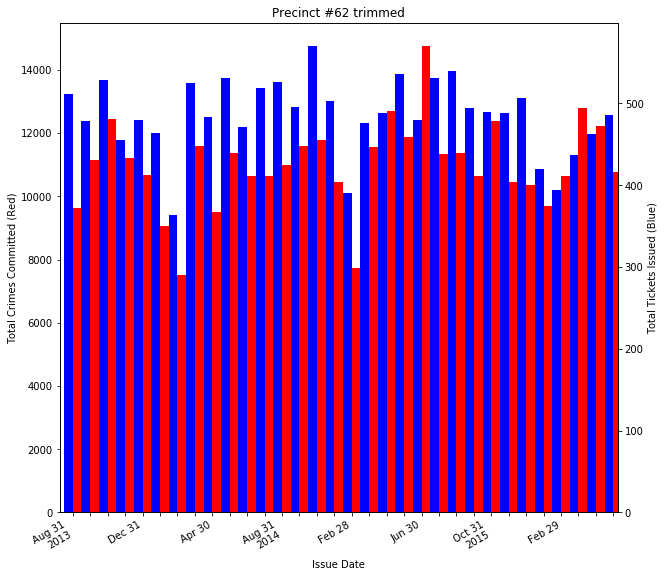

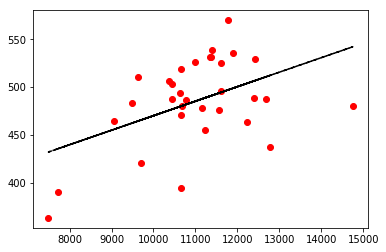

LinregressResult(slope=0.015189575339230038, intercept=318.13531628598059, rvalue=0.46836462282928903, pvalue=0.0068601699468016433, stderr=0.0052314829444005855)


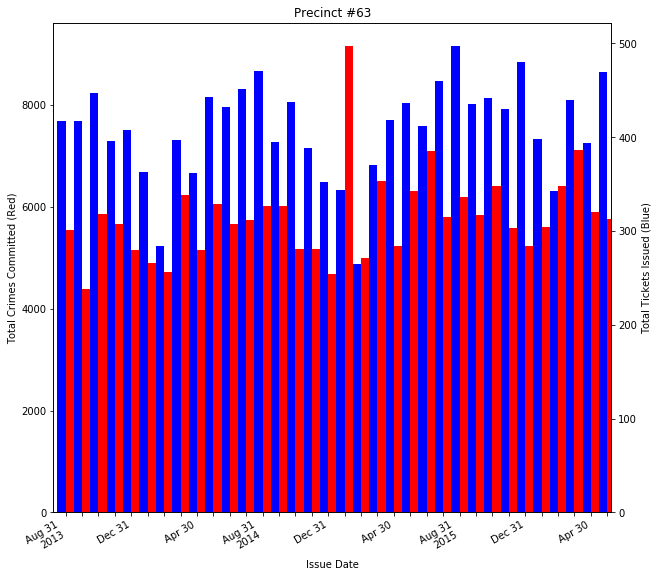

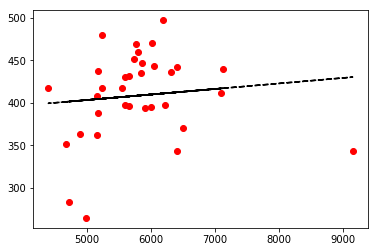

LinregressResult(slope=0.0064636907069936193, intercept=371.08476116083943, rvalue=0.10917839036864797, pvalue=0.53879007319872962, stderr=0.010403152439177044)


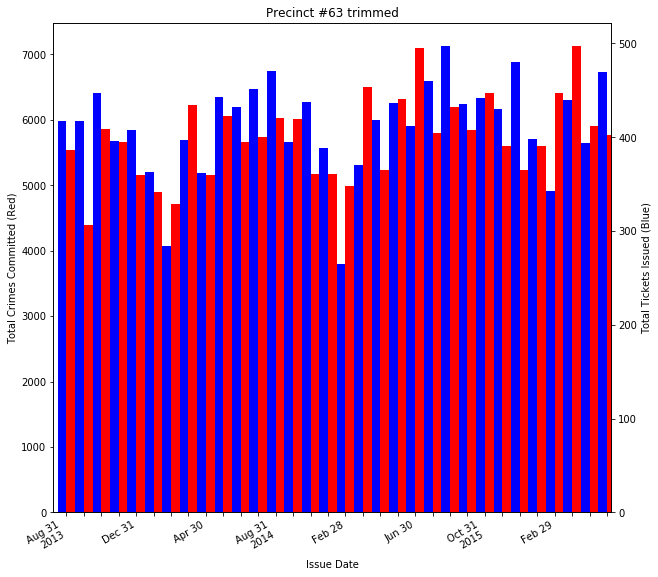

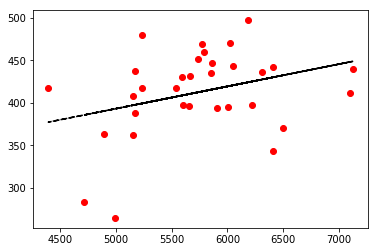

LinregressResult(slope=0.026120345696265677, intercept=262.63766951374799, rvalue=0.32487918617140144, pvalue=0.06963982049645584, stderr=0.013882743252418197)


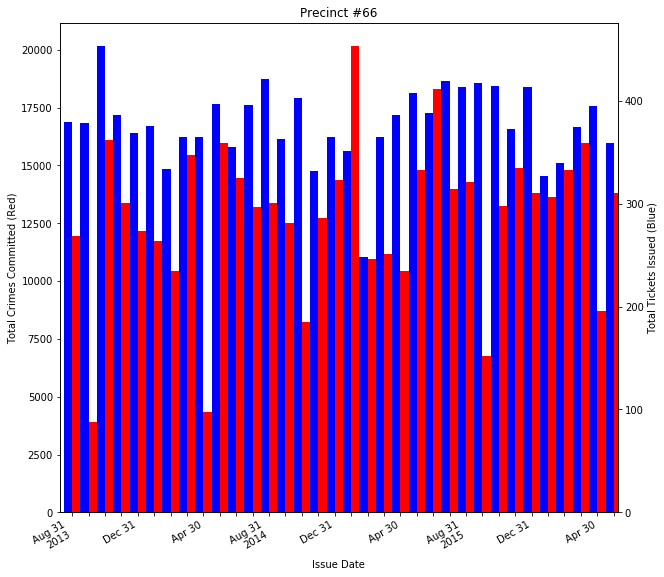

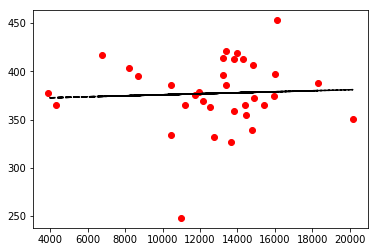

LinregressResult(slope=0.0005217586236788824, intercept=370.48608873770041, rvalue=0.048801202345014401, pvalue=0.78402541905060208, stderr=0.0018877581729096439)


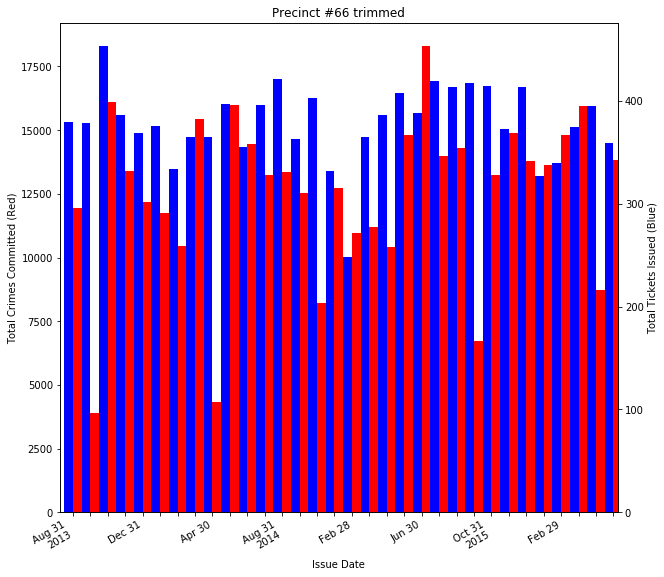

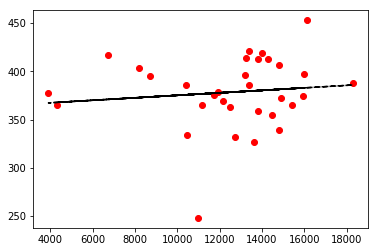

LinregressResult(slope=0.001288494016728511, intercept=362.25674113939243, rvalue=0.11205514563062963, pvalue=0.54147230929240542, stderr=0.0020861528902642117)


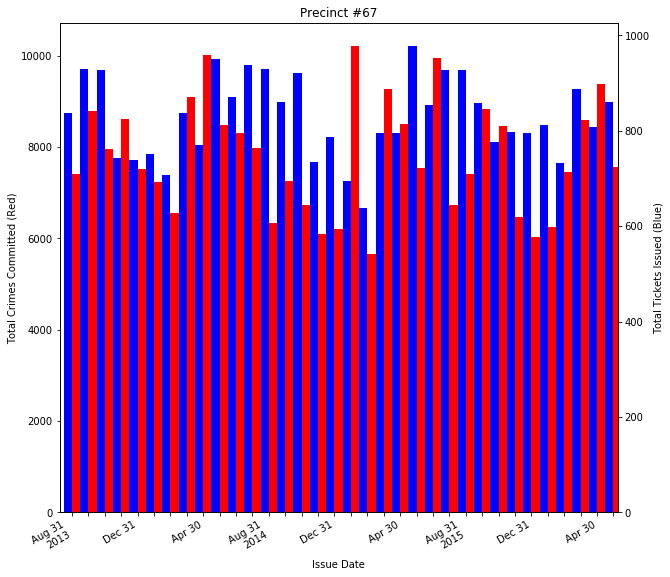

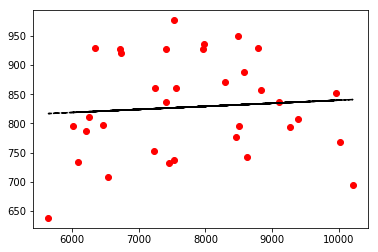

LinregressResult(slope=0.0052731436517407101, intercept=787.16277821423864, rvalue=0.077630971596395329, pvalue=0.66255338691814114, stderr=0.011971456174453499)


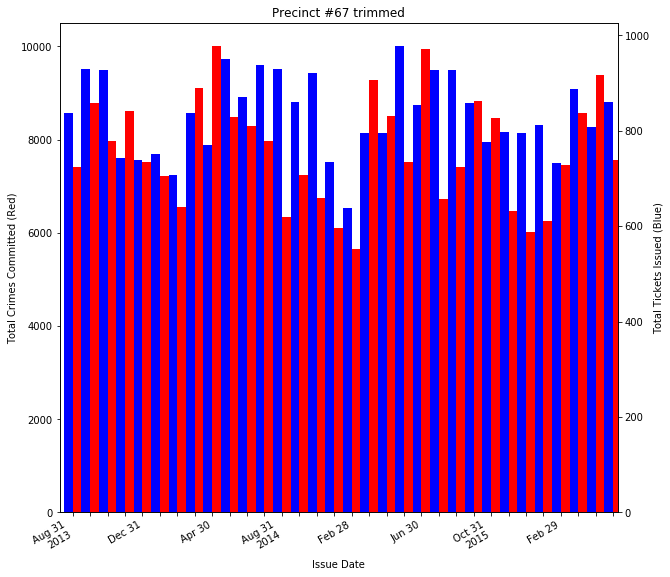

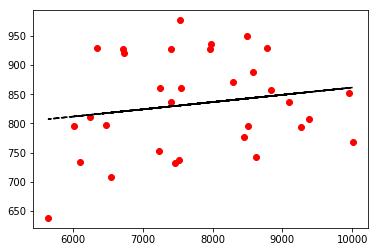

LinregressResult(slope=0.012438999891304179, intercept=737.15596000004552, rvalue=0.17537188947924615, pvalue=0.33702928203199711, stderr=0.012749160045799379)


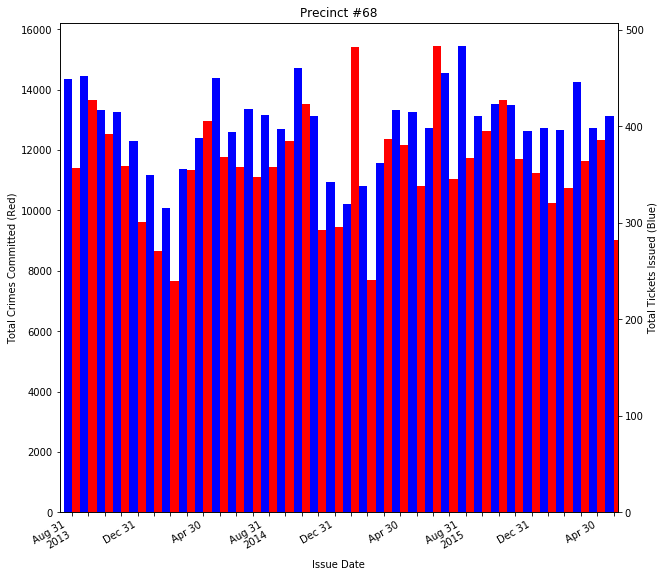

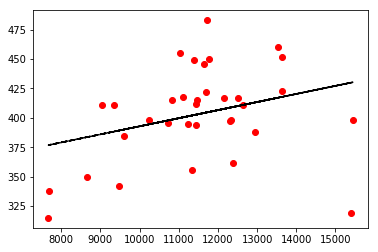

LinregressResult(slope=0.006875391580311396, intercept=324.11685591013202, rvalue=0.31238274541608224, pvalue=0.072070617837864545, stderr=0.0036960603198592187)


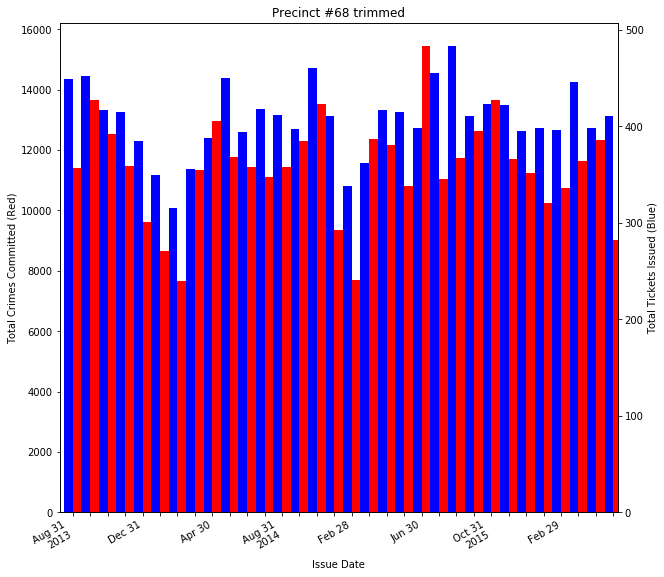

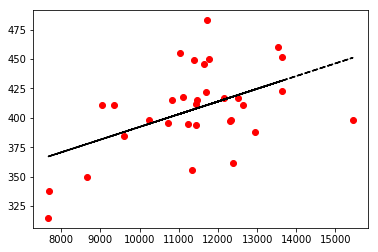

LinregressResult(slope=0.010805387485268873, intercept=284.27885960536116, rvalue=0.5018078312978802, pvalue=0.0034312532170730839, stderr=0.0034005402049640089)


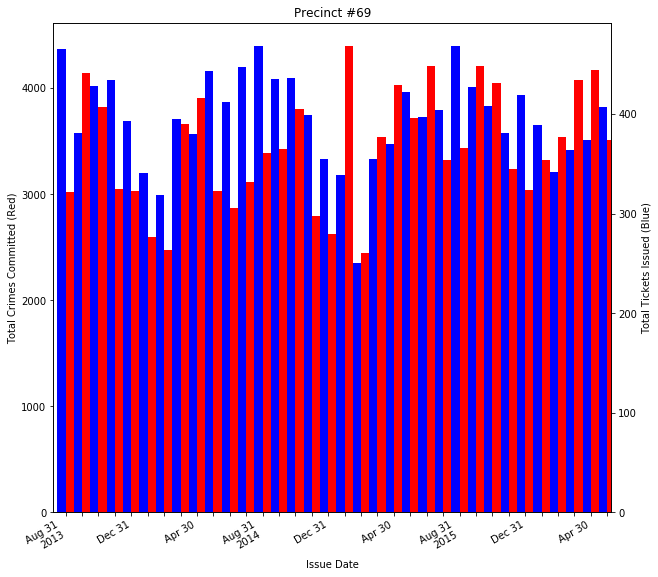

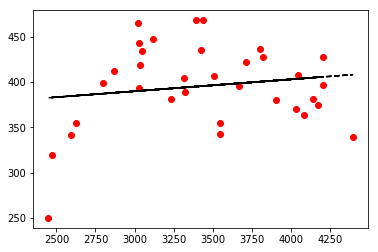

LinregressResult(slope=0.0131180643407797, intercept=350.368071286391, rvalue=0.15526575562187683, pvalue=0.38058554850128745, stderr=0.014754350170912277)


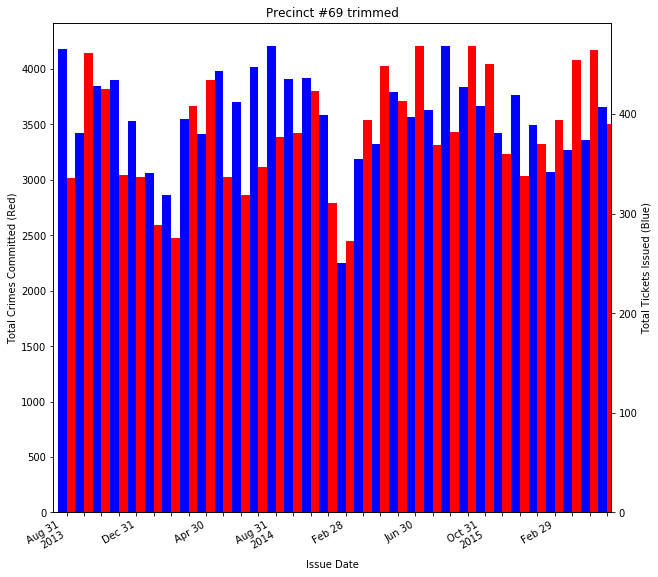

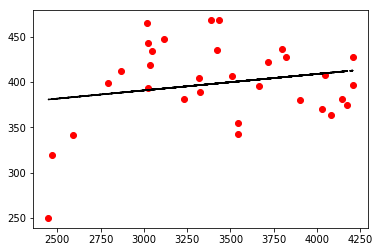

LinregressResult(slope=0.018135402423602176, intercept=336.21630707852569, rvalue=0.20442666945631108, pvalue=0.26173247186999243, stderr=0.015854746638640768)


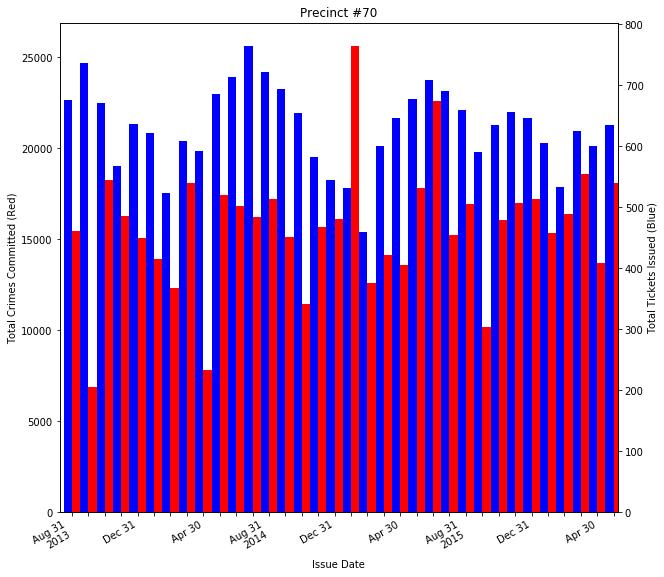

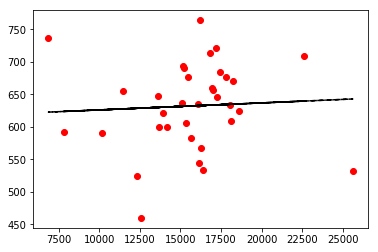

LinregressResult(slope=0.0010785079384446352, intercept=615.29863952996902, rvalue=0.056894612837966915, pvalue=0.74927165858100597, stderr=0.0033455934517357287)


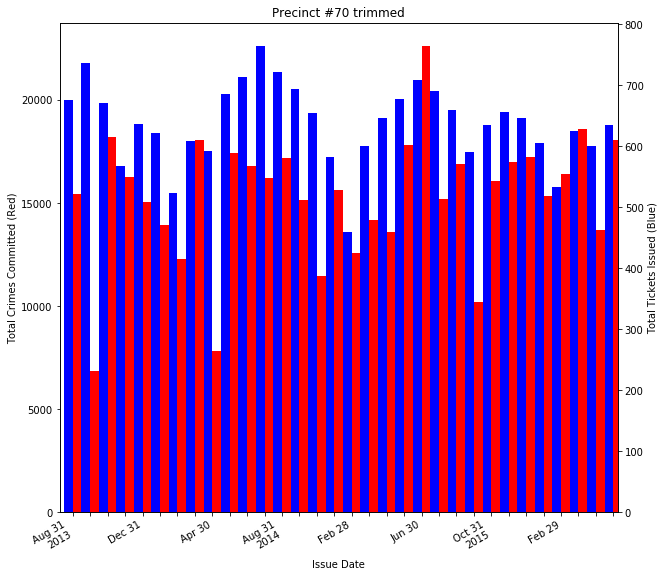

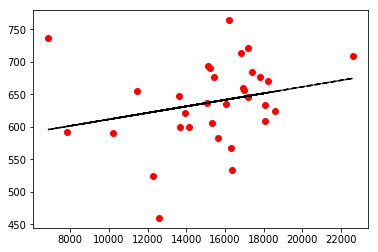

LinregressResult(slope=0.0049984641961231587, intercept=561.5852071905108, rvalue=0.24445510013051508, pvalue=0.17753257047979792, stderr=0.0036199003133355391)


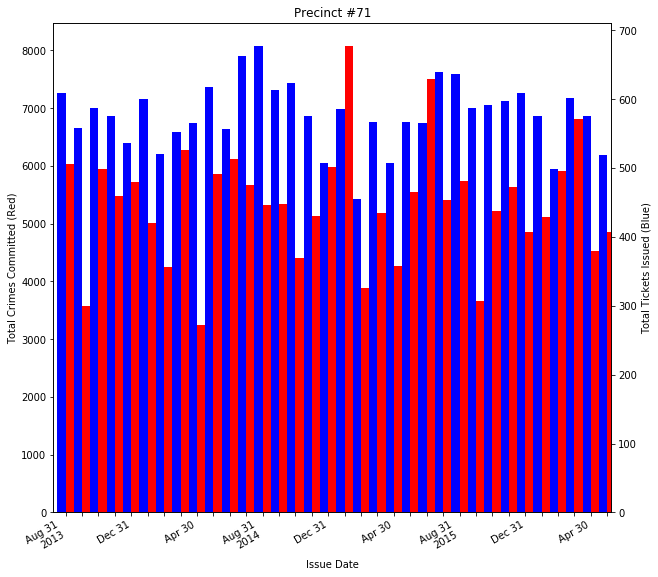

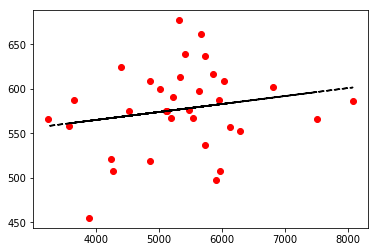

LinregressResult(slope=0.0089626805185974035, intercept=529.13085056667239, rvalue=0.19505191286497081, pvalue=0.26896179859001412, stderr=0.0079669122738145869)


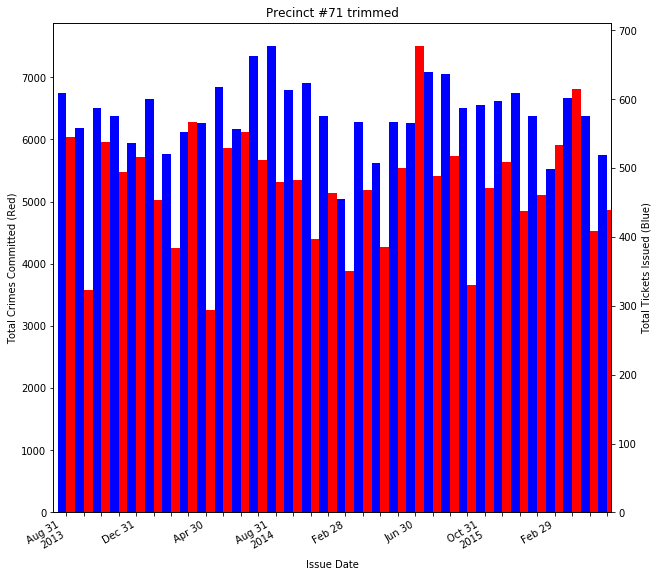

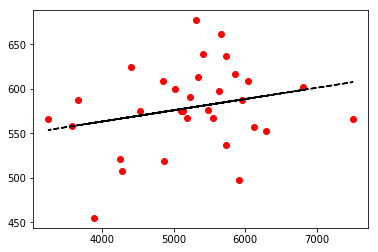

LinregressResult(slope=0.012631258064415786, intercept=512.74089058923505, rvalue=0.24909621334631002, pvalue=0.16918635421518907, stderr=0.0089662108642334249)


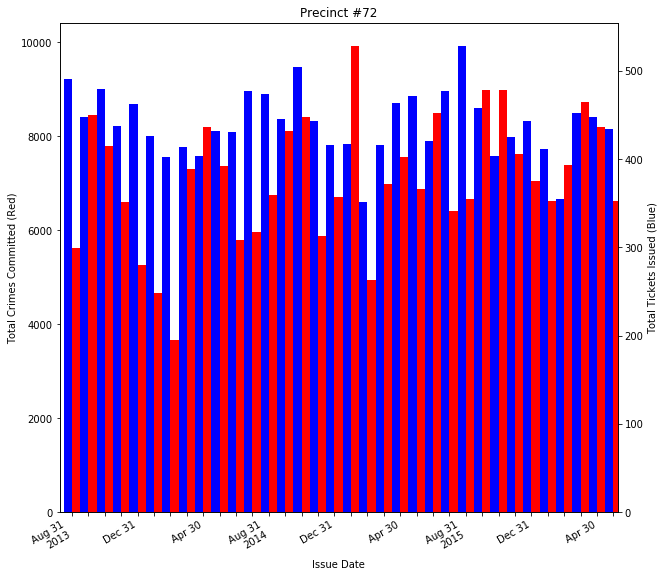

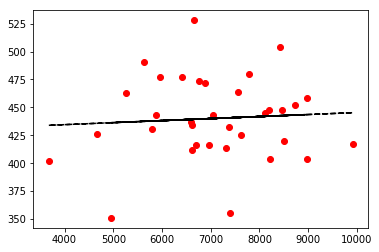

LinregressResult(slope=0.0018112852558075071, intercept=427.27115463925765, rvalue=0.066440418371510407, pvalue=0.70890060125516152, stderr=0.0048086018908634854)


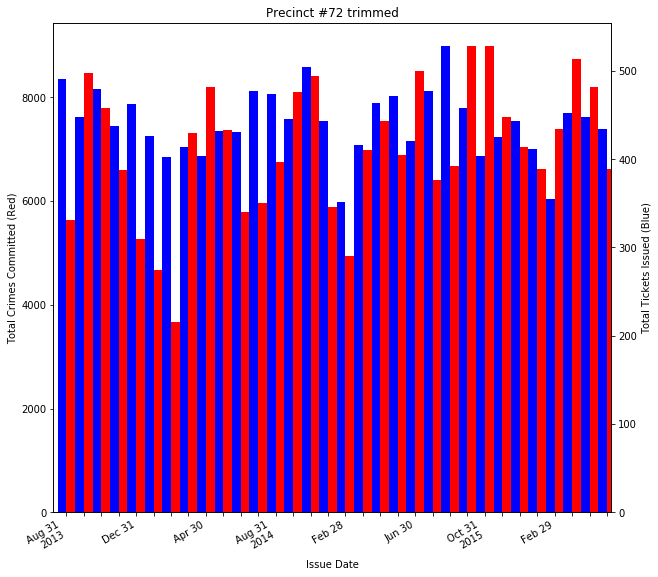

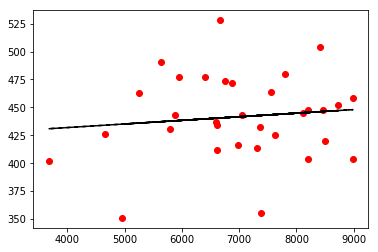

LinregressResult(slope=0.0032208383933267967, intercept=419.01955013150638, rvalue=0.11128241684611459, pvalue=0.54428171075857157, stderr=0.0052514092613218872)


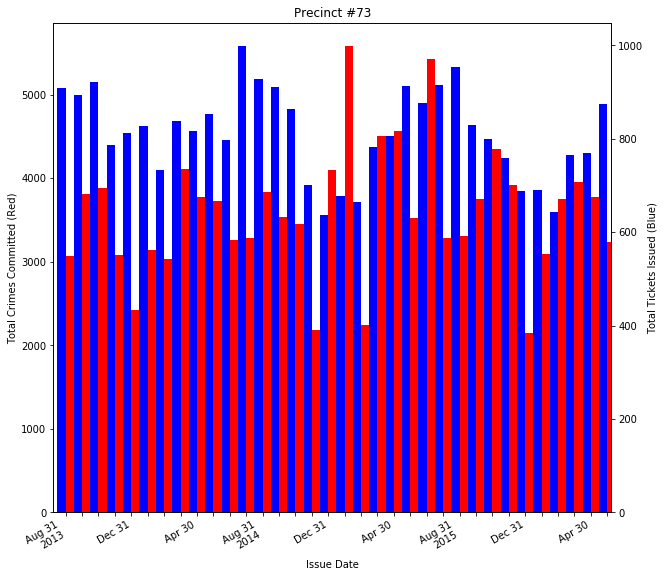

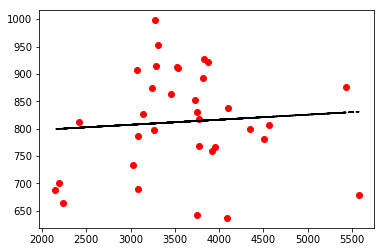

LinregressResult(slope=0.0092162004915667933, intercept=779.50072020579114, rvalue=0.075518383772078729, pvalue=0.67121551331533791, stderr=0.021512074678097196)


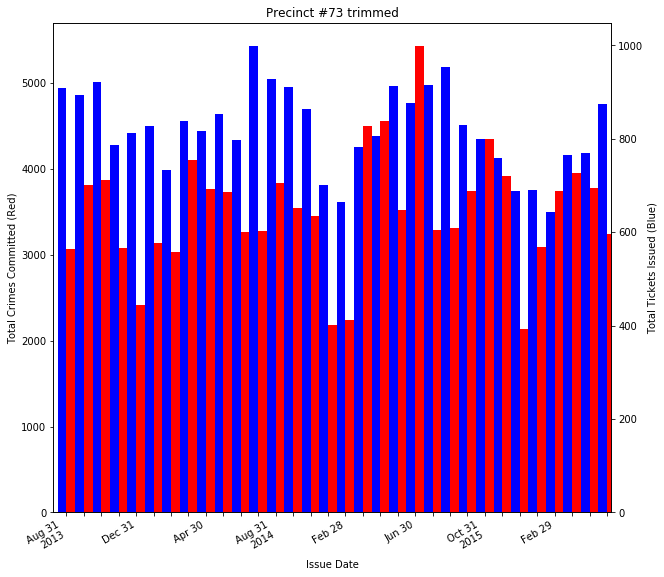

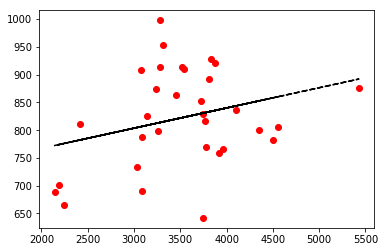

LinregressResult(slope=0.036402561243377755, intercept=694.42407911286875, rvalue=0.28985340079128735, pvalue=0.10757611689128613, stderr=0.02194507633940011)


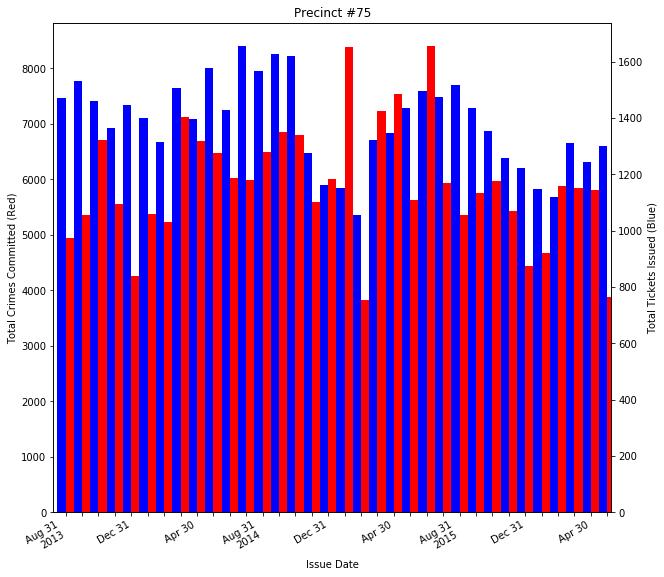

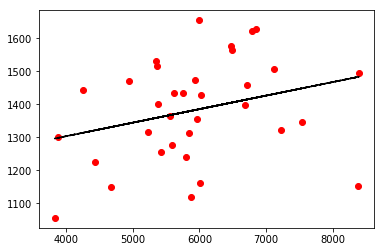

LinregressResult(slope=0.040972104472592842, intercept=1139.8458361675619, rvalue=0.29005466966815829, pvalue=0.096107647335803514, stderr=0.023897360308763903)


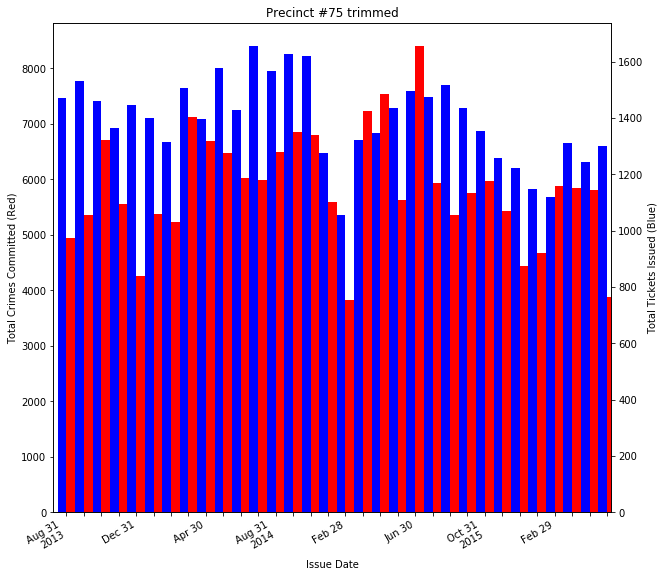

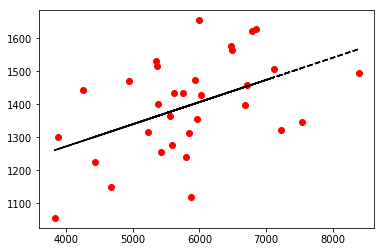

LinregressResult(slope=0.067092846398580333, intercept=1004.5121415677444, rvalue=0.46904546471153163, pvalue=0.006768608148450924, stderr=0.023064653493877641)


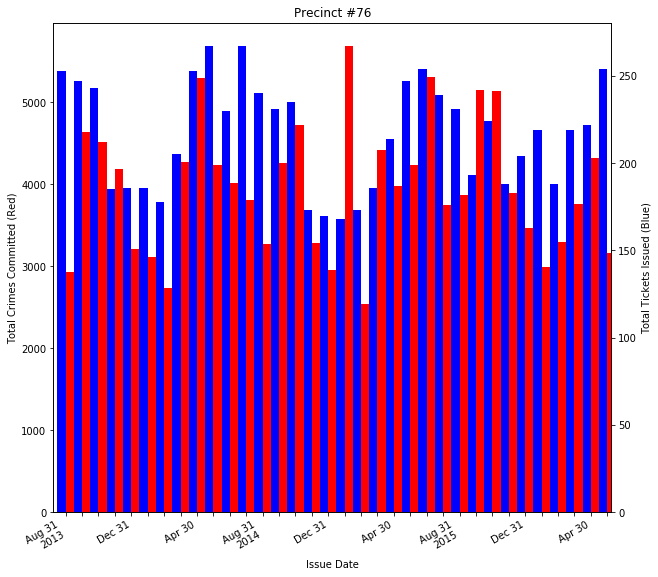

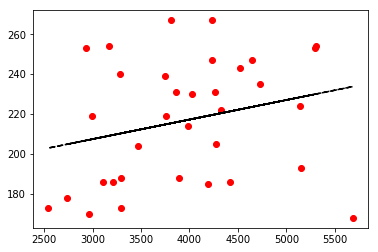

LinregressResult(slope=0.0097939751152146658, intercept=178.08173249498333, rvalue=0.25745462828887622, pvalue=0.14157157828449371, stderr=0.0064981684174600582)


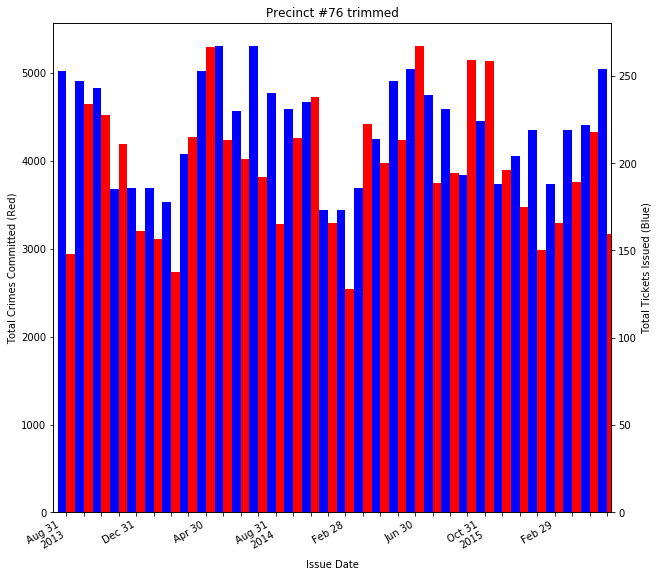

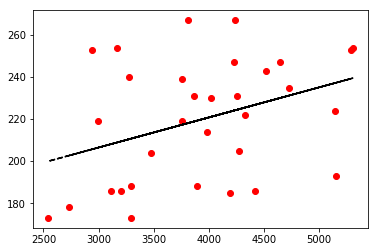

LinregressResult(slope=0.014295951328148596, intercept=163.59099091118162, rvalue=0.36914456427273307, pvalue=0.037599700827721814, stderr=0.006571212835616607)


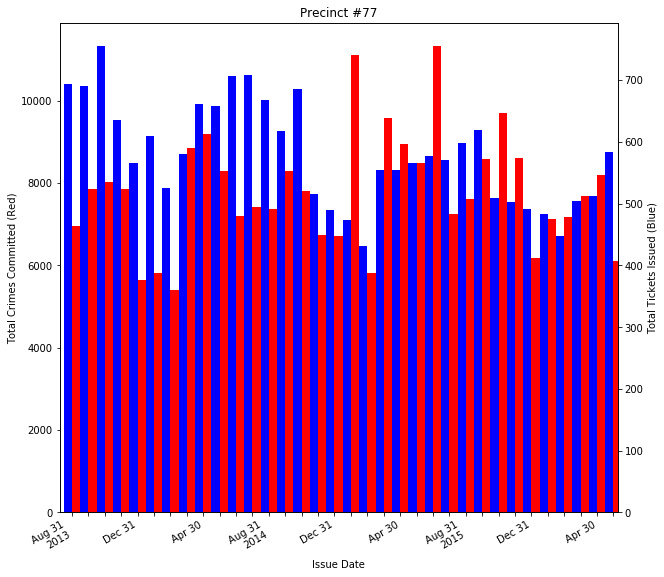

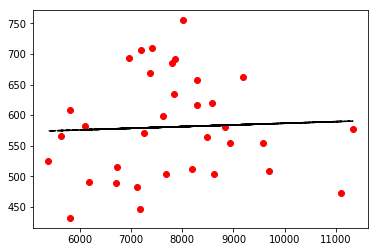

LinregressResult(slope=0.0027234476586535865, intercept=559.40022756707413, rvalue=0.045552229612101994, pvalue=0.79809717959044812, stderr=0.010558041266324187)


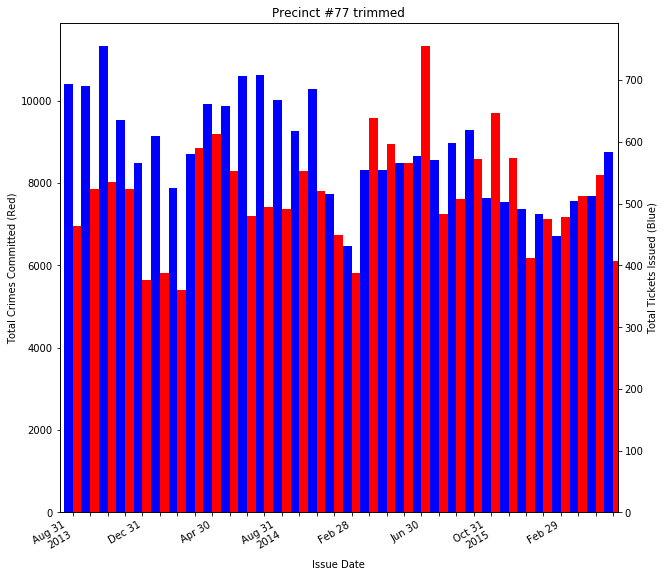

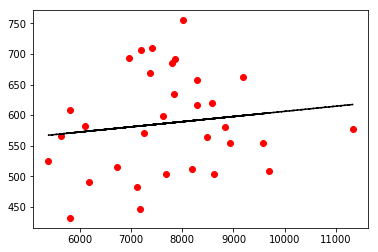

LinregressResult(slope=0.0084616474523371895, intercept=521.51401428533336, rvalue=0.13378034508299944, pvalue=0.46541589876351686, stderr=0.011444068969642885)


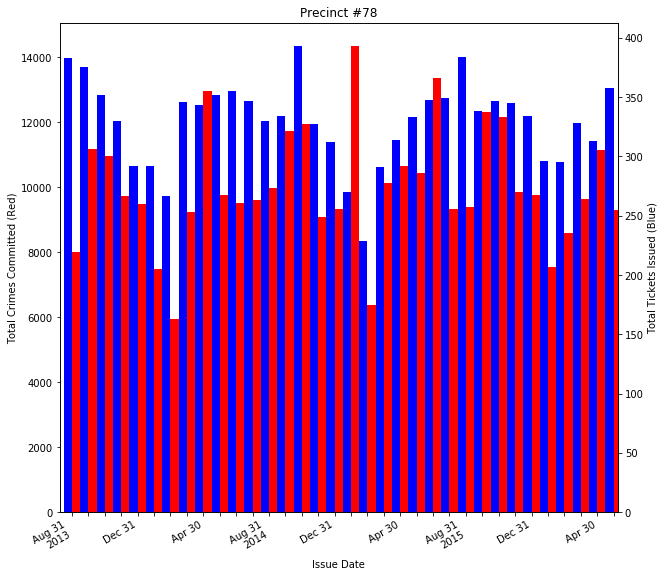

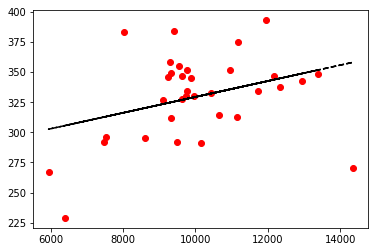

LinregressResult(slope=0.0066007628975671617, intercept=263.37481966093151, rvalue=0.34294902841839603, pvalue=0.047077733162545987, stderr=0.0031960889864936803)


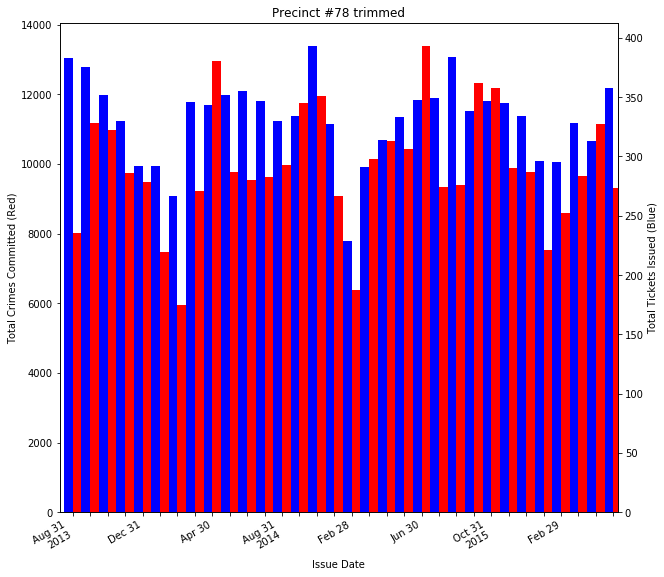

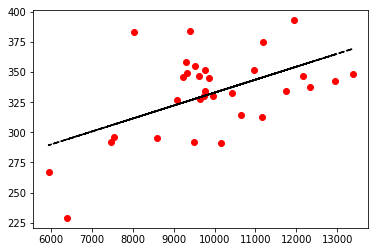

LinregressResult(slope=0.010759010164499212, intercept=225.37189460068993, rvalue=0.53418116789624726, pvalue=0.0016376035911329252, stderr=0.0031086366435047743)


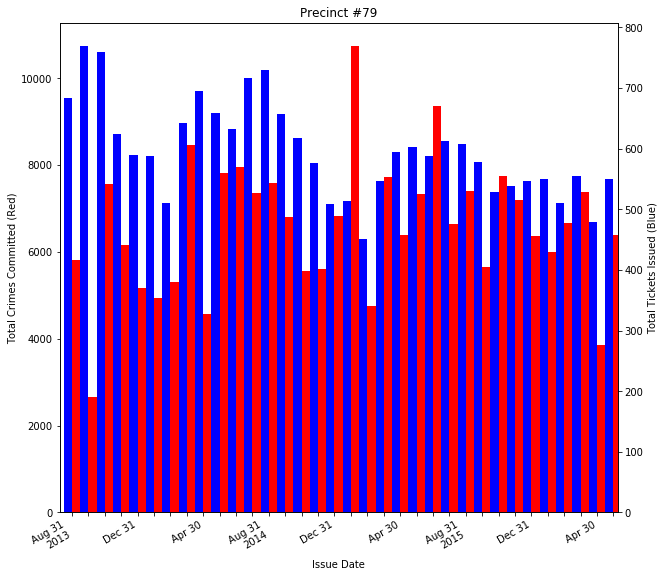

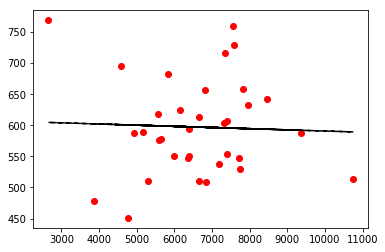

LinregressResult(slope=-0.0018836814275600417, intercept=609.62748020561526, rvalue=-0.037474525395426915, pvalue=0.8333456667275676, stderr=0.0088795541988494677)


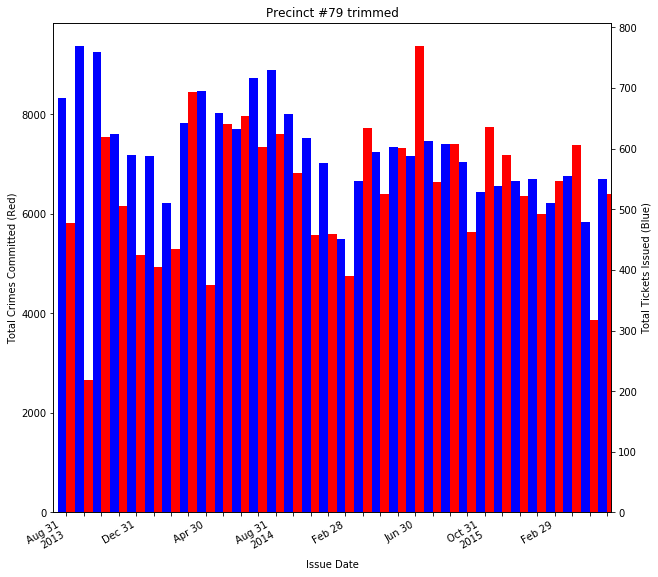

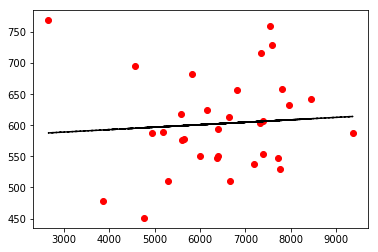

LinregressResult(slope=0.0039373404467981142, intercept=577.29596322406235, rvalue=0.071905684274049045, pvalue=0.69573546300624445, stderr=0.0099713385247780263)


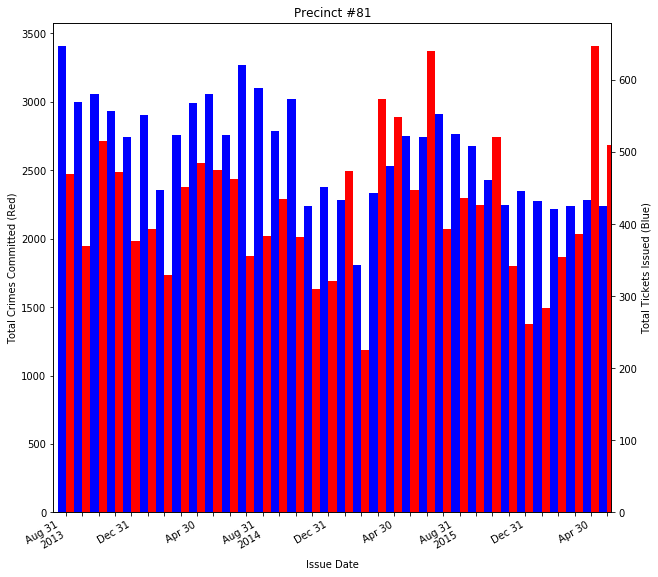

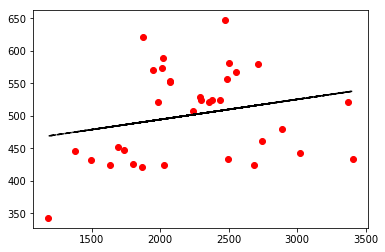

LinregressResult(slope=0.03097164159362855, intercept=432.3825011444319, rvalue=0.22825611629123857, pvalue=0.19415458761880861, stderr=0.023353279547336389)


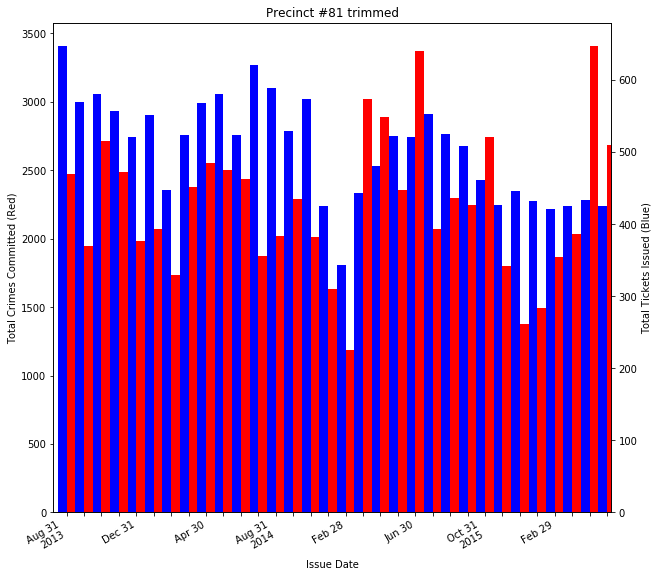

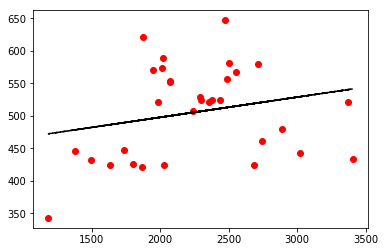

LinregressResult(slope=0.031018841210834751, intercept=435.69357421501377, rvalue=0.22925667214812137, pvalue=0.20688930247483542, stderr=0.024044687234354885)


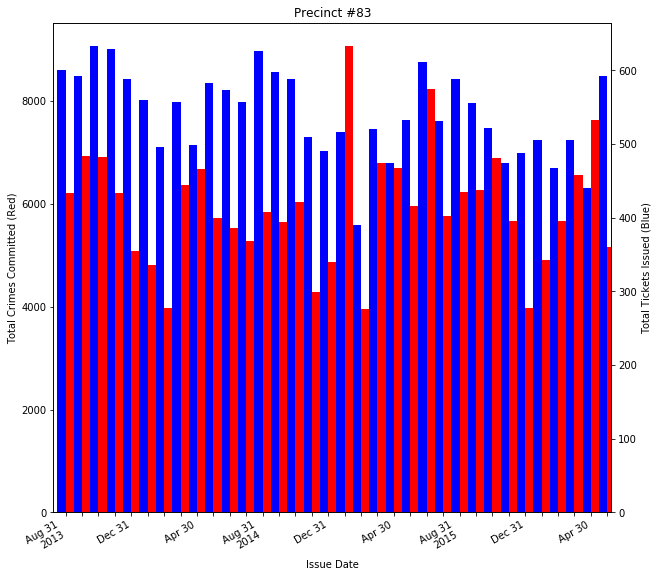

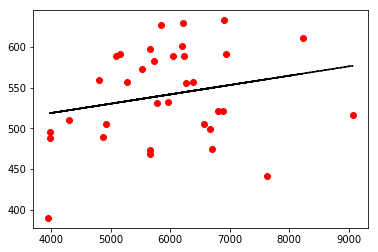

LinregressResult(slope=0.011452962827653049, intercept=473.18730416926439, rvalue=0.22548356399019448, pvalue=0.1997750403173508, stderr=0.0087477635567207515)


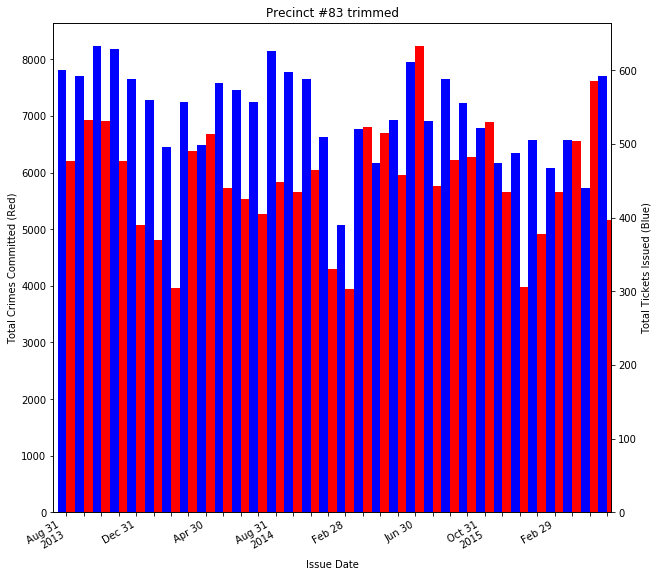

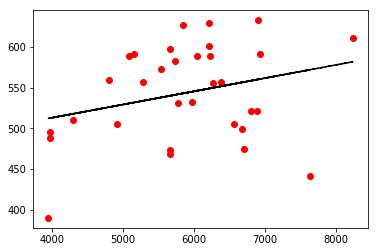

LinregressResult(slope=0.016250076681129967, intercept=448.14712787736767, rvalue=0.28069371458824188, pvalue=0.11967426927592466, stderr=0.010144757406979702)


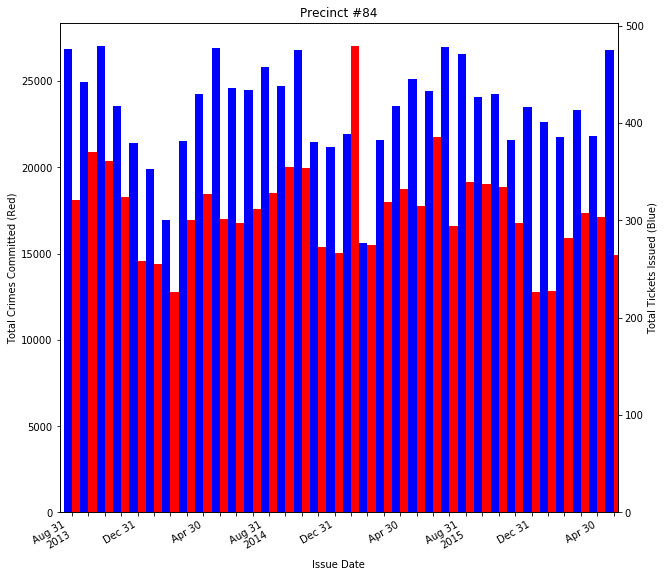

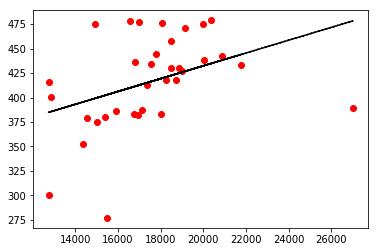

LinregressResult(slope=0.0065522499125756379, intercept=301.33254311820281, rvalue=0.38214746006813372, pvalue=0.025724006052821363, stderr=0.0028009418676422041)


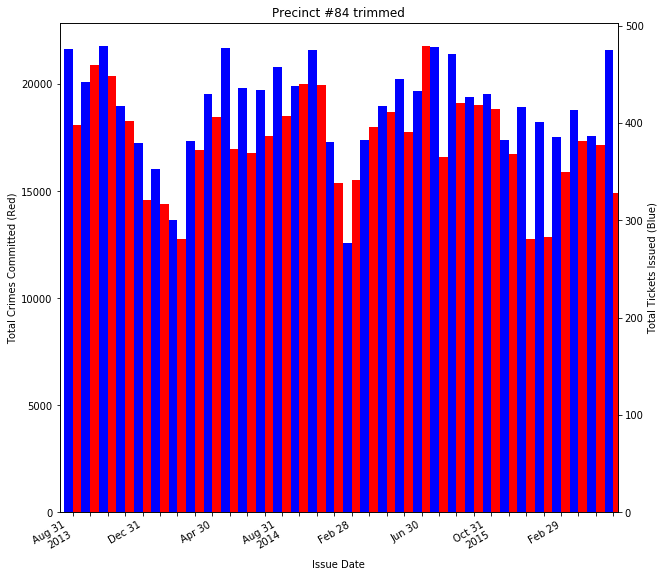

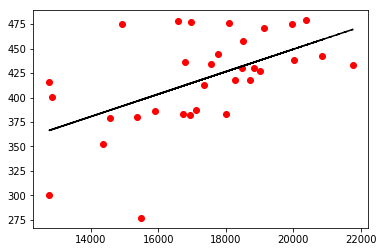

LinregressResult(slope=0.011468763200413562, intercept=219.93652872330335, rvalue=0.53881944518288027, pvalue=0.0014640099172039754, stderr=0.0032737237160275646)


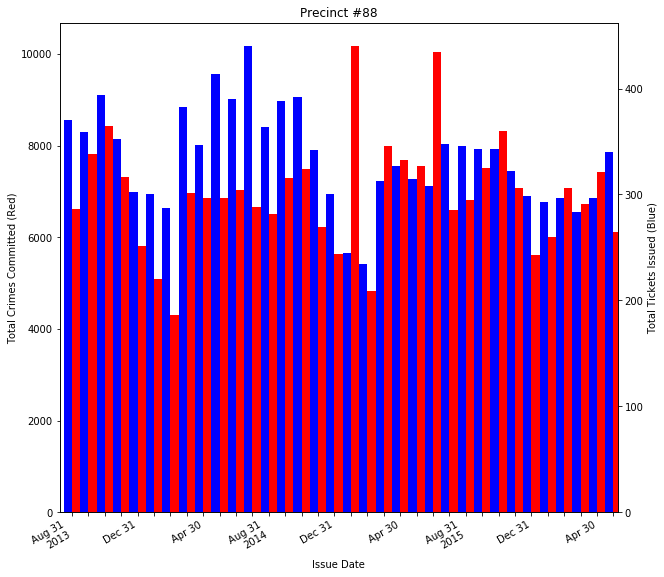

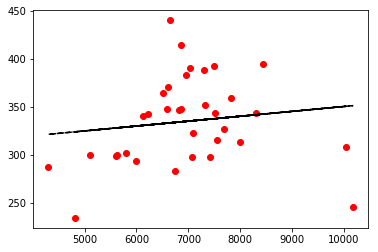

LinregressResult(slope=0.0050947895314023914, intercept=299.18683234319116, rvalue=0.13637675110419867, pvalue=0.44185425995194527, stderr=0.0065423571853787717)


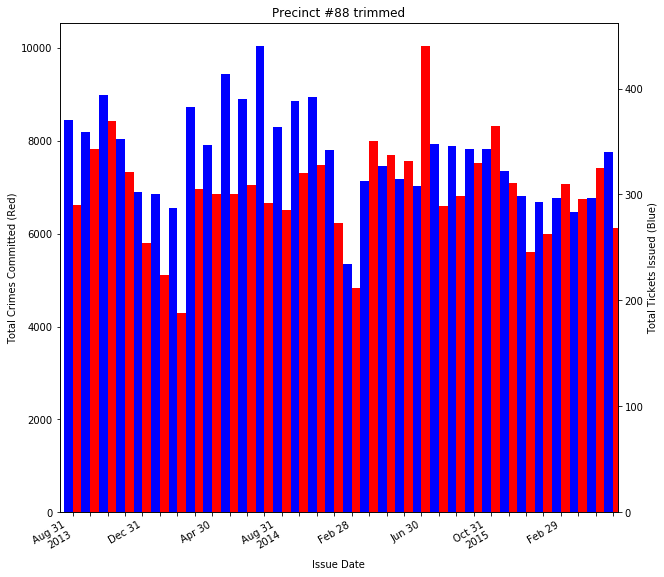

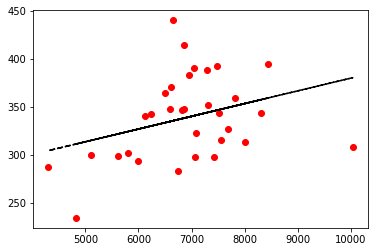

LinregressResult(slope=0.013260223228613177, intercept=247.0670314009291, rvalue=0.33279823631979205, pvalue=0.062724371375543986, stderr=0.0068599348210860974)


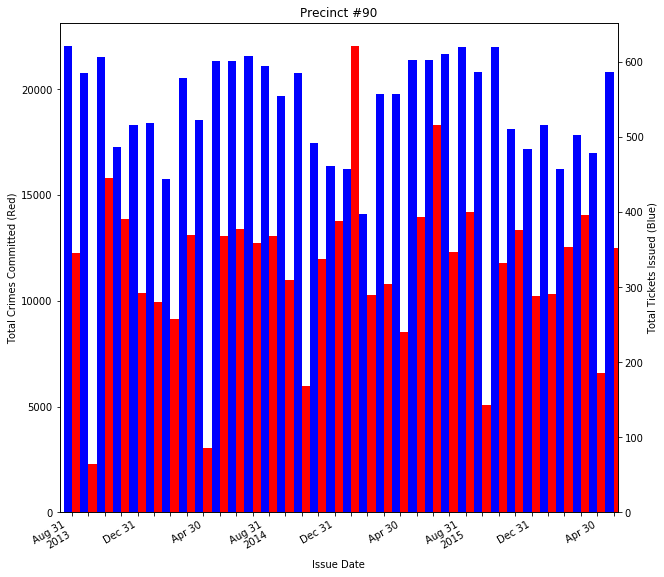

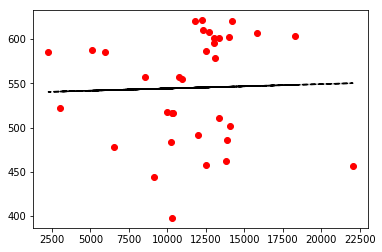

LinregressResult(slope=0.00049334520568921042, intercept=539.08292169919582, rvalue=0.031018494833918647, pvalue=0.86175242009650765, stderr=0.0028102578838991796)


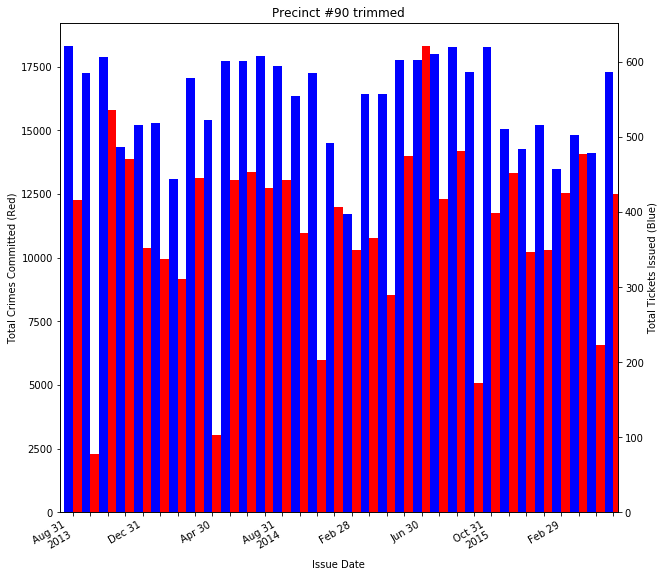

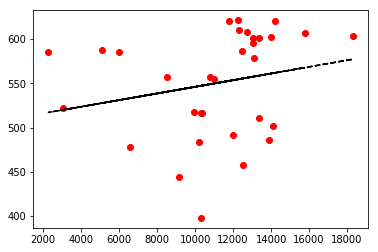

LinregressResult(slope=0.0037463054481988653, intercept=508.44618940441848, rvalue=0.21895106714898113, pvalue=0.22860045880140173, stderr=0.0030480897317685441)


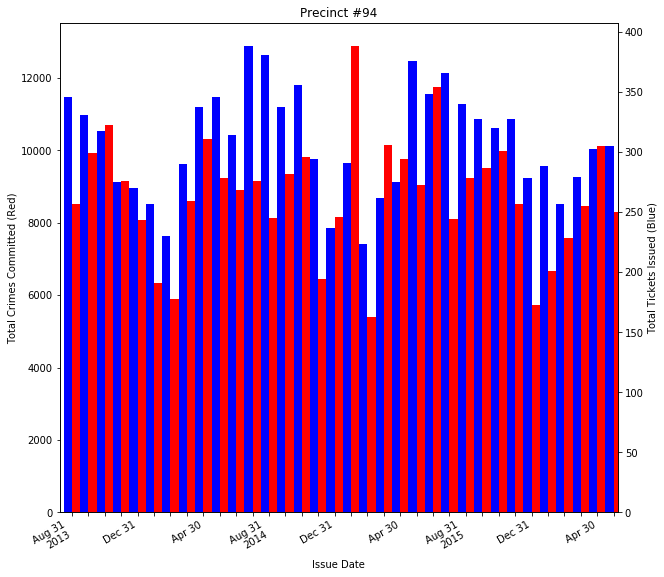

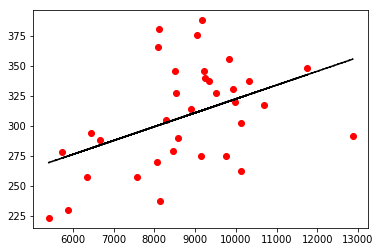

LinregressResult(slope=0.011571259544989046, intercept=206.5711572267117, rvalue=0.43818480066132093, pvalue=0.0095414934084341527, stderr=0.004196163736586522)


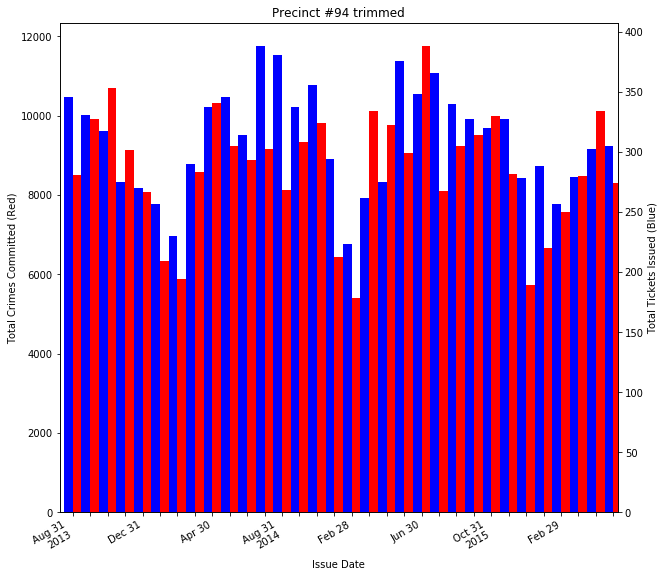

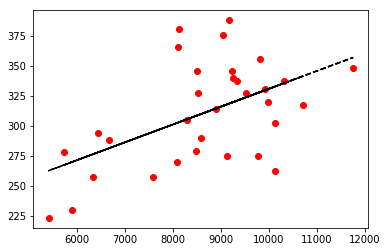

LinregressResult(slope=0.014877531995983809, intercept=181.97964608836969, rvalue=0.52915940753024582, pvalue=0.0018455449497435271, stderr=0.00435559081451791)


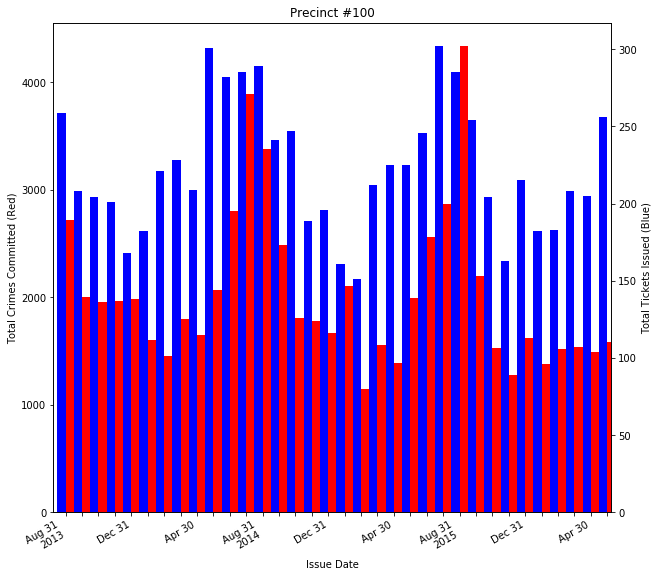

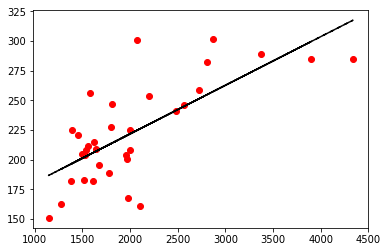

LinregressResult(slope=0.04098746579857012, intercept=139.79784160843712, rvalue=0.71894427438455899, pvalue=1.6706785403893777e-06, stderr=0.0070049972021713263)


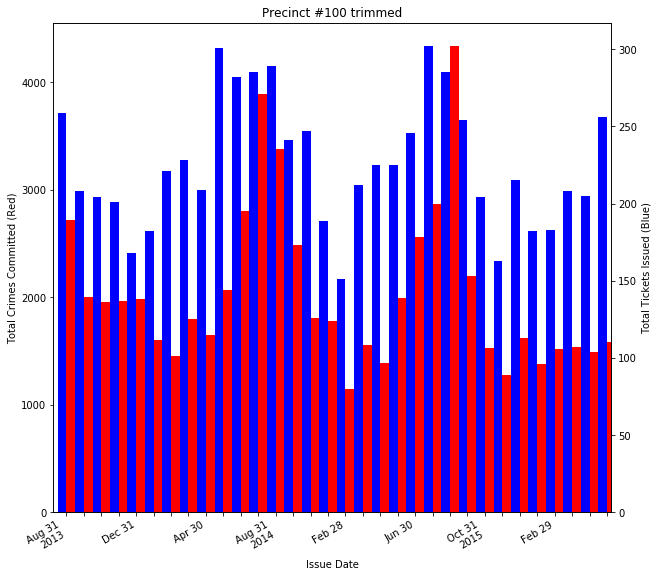

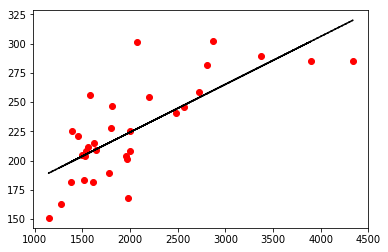

LinregressResult(slope=0.040950634024389705, intercept=142.2868720539912, rvalue=0.74766061940899342, pvalue=8.7606743448886633e-07, stderr=0.0066407413168857558)


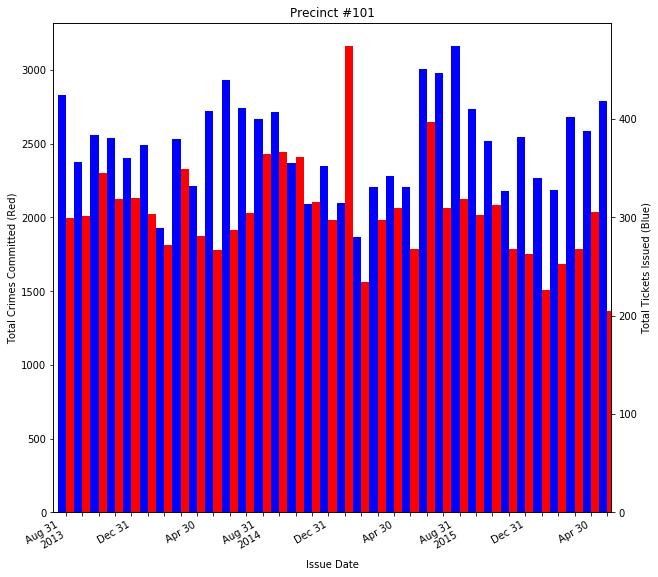

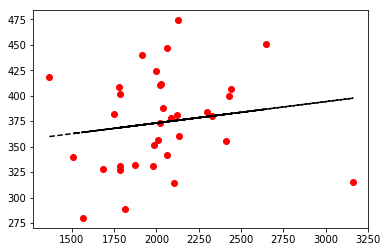

LinregressResult(slope=0.0209778661714486, intercept=331.1884844025509, rvalue=0.15104758471126709, pvalue=0.39381721081983845, stderr=0.024269501124535315)


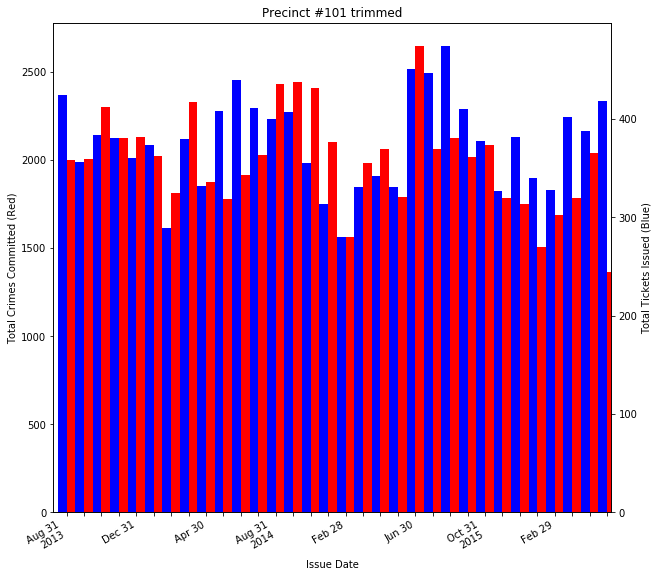

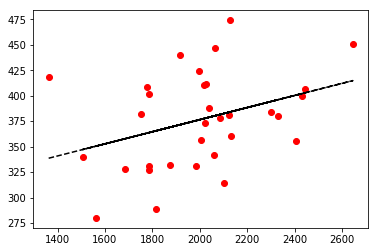

LinregressResult(slope=0.059360363672063141, intercept=257.70464315592278, rvalue=0.35607195075353937, pvalue=0.045477801579938575, stderr=0.028441873459715376)


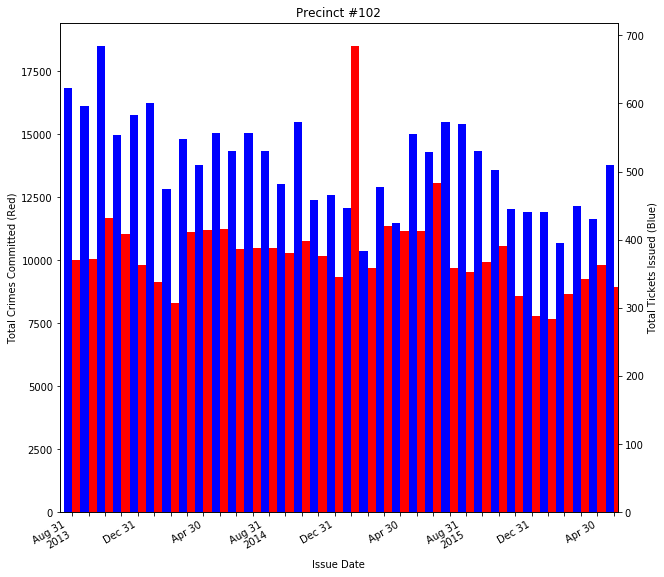

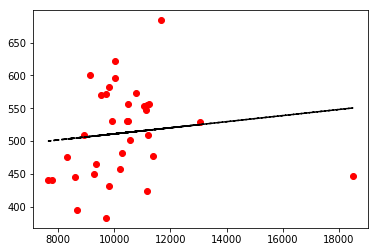

LinregressResult(slope=0.0046425386424453104, intercept=464.5589067189876, rvalue=0.12384662890291362, pvalue=0.48528587876867235, stderr=0.0065756689441780238)


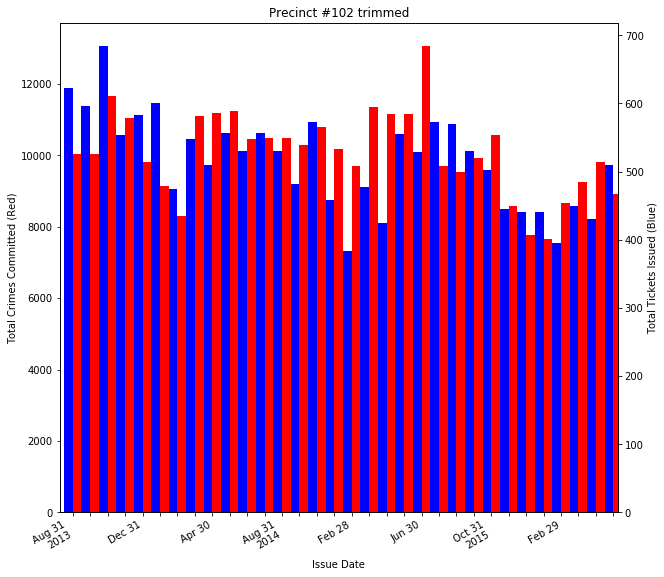

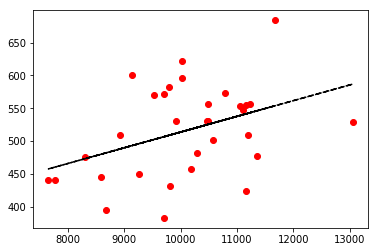

LinregressResult(slope=0.023912449392310058, intercept=274.59485621610781, rvalue=0.40465994053409882, pvalue=0.021602835557691335, stderr=0.0098660059924729378)


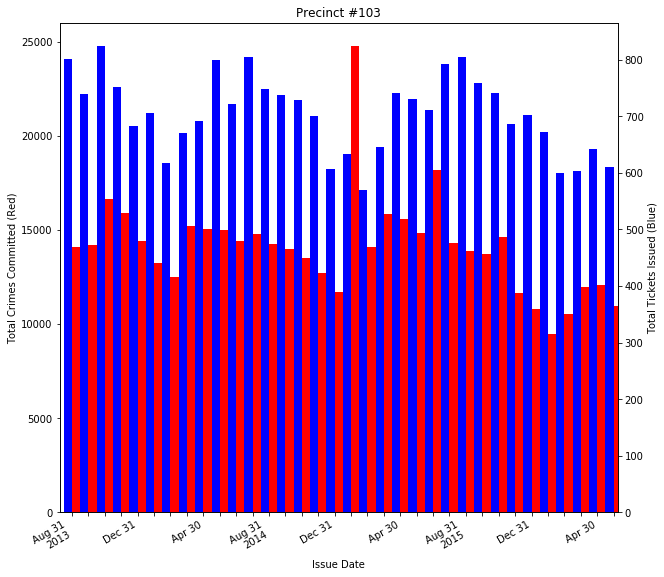

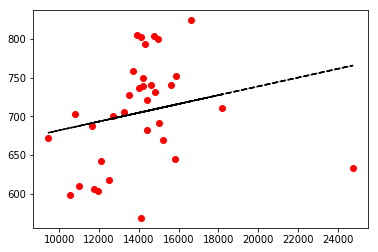

LinregressResult(slope=0.0056628575380400009, intercept=625.41578838347573, rvalue=0.21794875903426422, pvalue=0.2156179214659214, stderr=0.0044826864230456667)


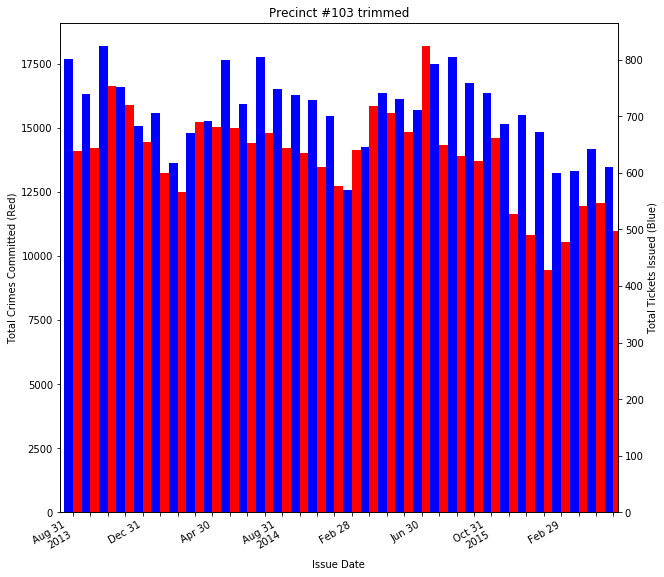

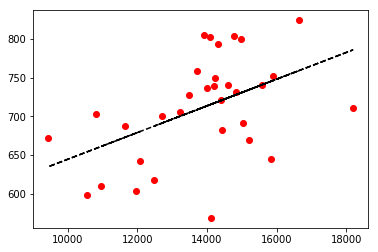

LinregressResult(slope=0.01723745560714951, intercept=472.1916375606703, rvalue=0.48091467123397552, pvalue=0.0053318728829883618, stderr=0.0057375819557962272)


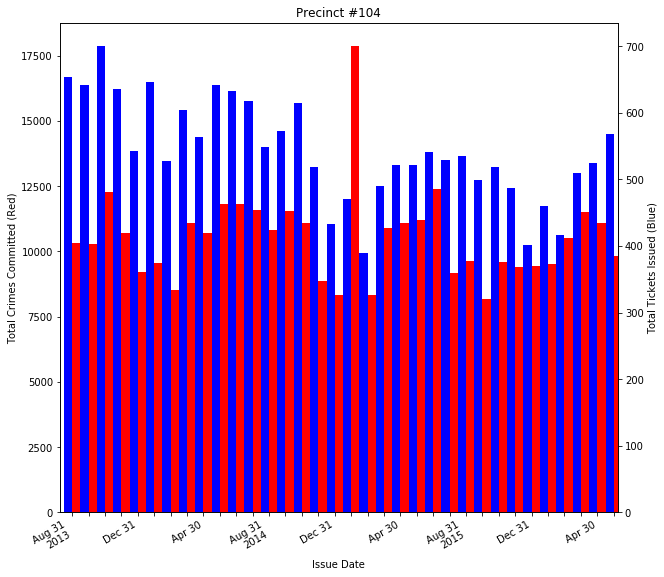

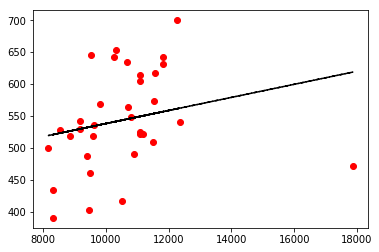

LinregressResult(slope=0.010266348791927161, intercept=435.26151726019577, rvalue=0.23361709403106637, pvalue=0.18360237317758341, stderr=0.0075535220693993422)


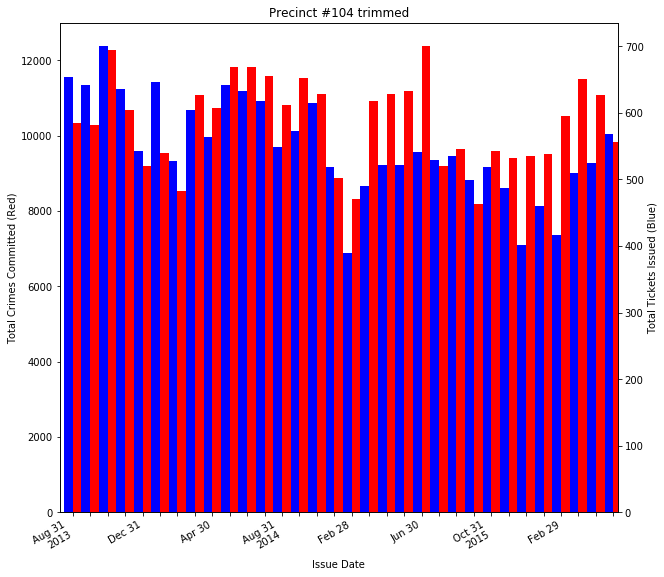

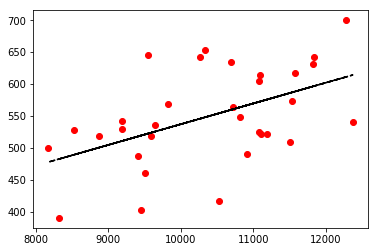

LinregressResult(slope=0.032531841619064271, intercept=211.61934264281535, rvalue=0.49909532351557007, pvalue=0.003638976670094822, stderr=0.01031232731576933)


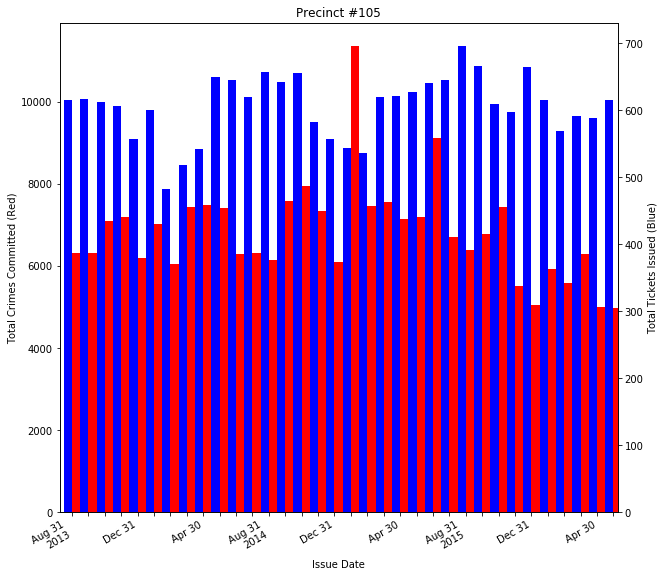

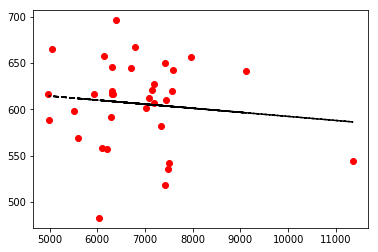

LinregressResult(slope=-0.0043943986966750491, intercept=636.34362174914793, rvalue=-0.11339857143126272, pvalue=0.52311311721222031, stderr=0.0068062269737625128)


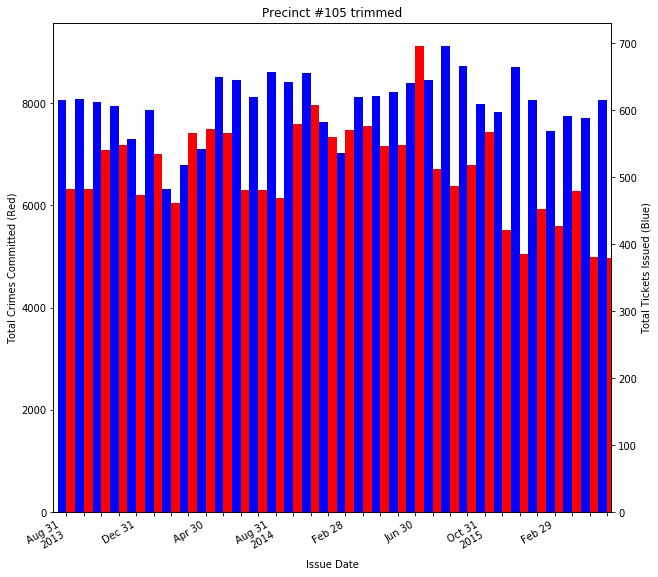

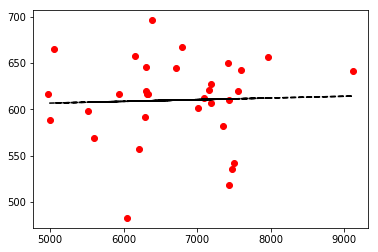

LinregressResult(slope=0.0018360311694600269, intercept=597.54463620357967, rvalue=0.036992362626631553, pvalue=0.84069594355817312, stderr=0.0090554491738335397)


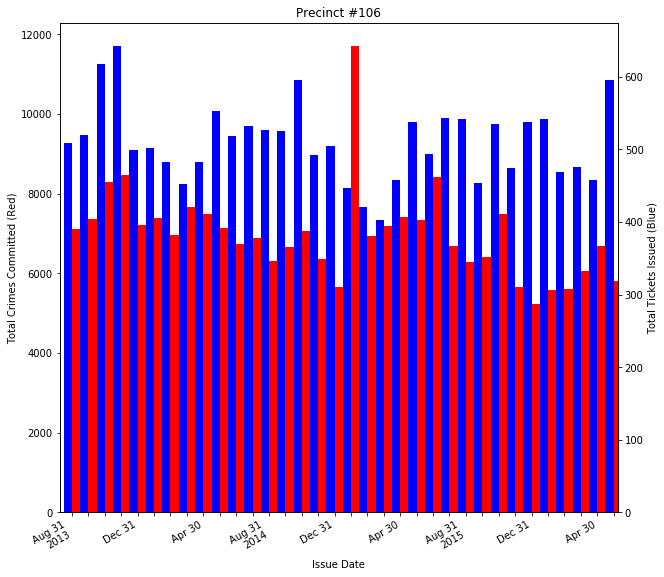

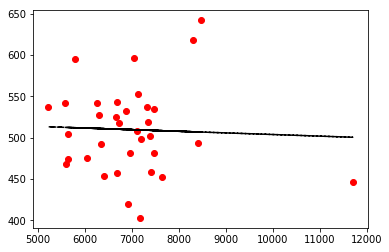

LinregressResult(slope=-0.0019563845151112187, intercept=523.41301966697915, rvalue=-0.042627407710236029, pvalue=0.8108187851134403, stderr=0.0081057903795474992)


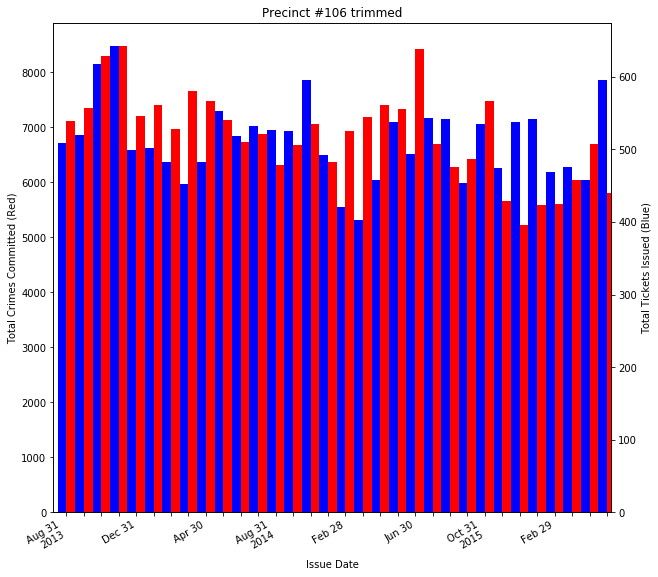

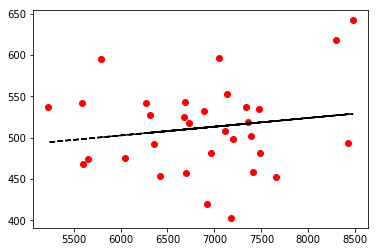

LinregressResult(slope=0.010599417055265757, intercept=439.08759236675832, rvalue=0.15907490965548585, pvalue=0.38450914447117246, stderr=0.012010306088178657)


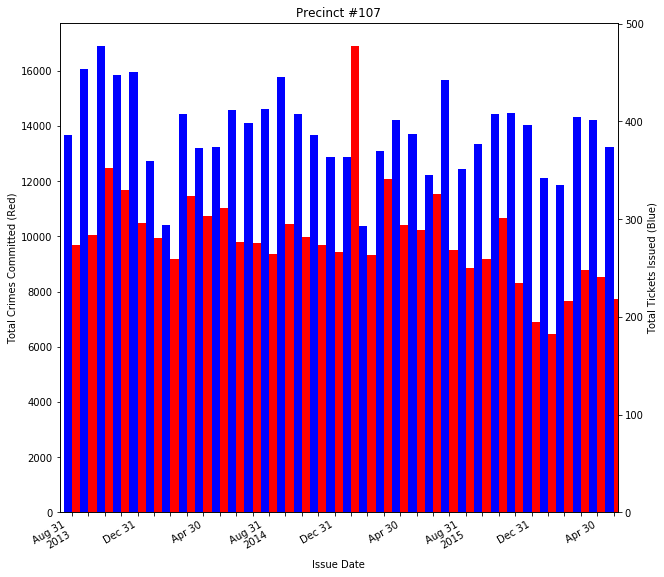

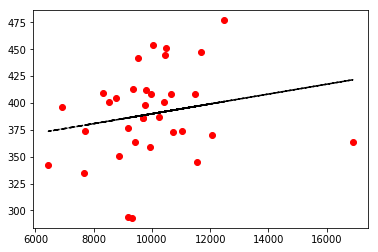

LinregressResult(slope=0.0045913987546695135, intercept=344.00960832745324, rvalue=0.20054957404020887, pvalue=0.25543155731713413, stderr=0.003964916970442235)


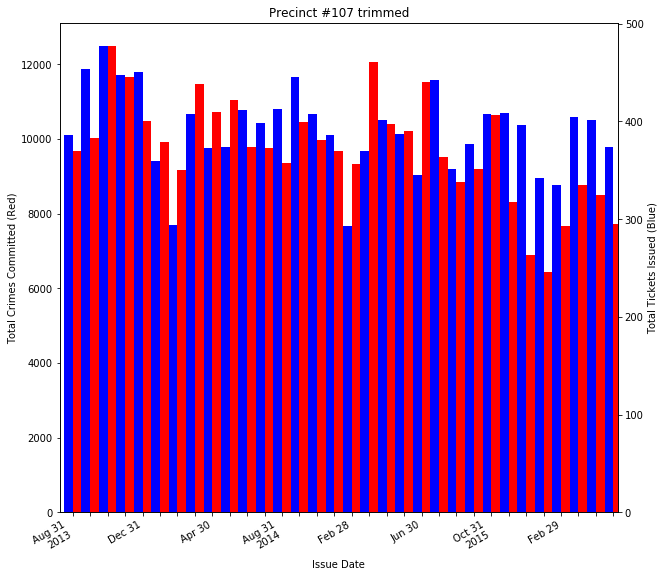

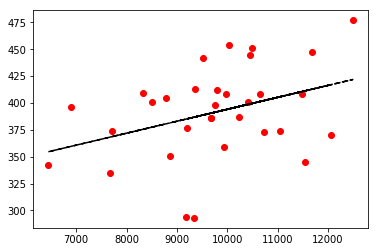

LinregressResult(slope=0.011127099445356385, intercept=282.84245007713702, rvalue=0.36607468632204804, pvalue=0.039342646511445922, stderr=0.0051642577769473218)


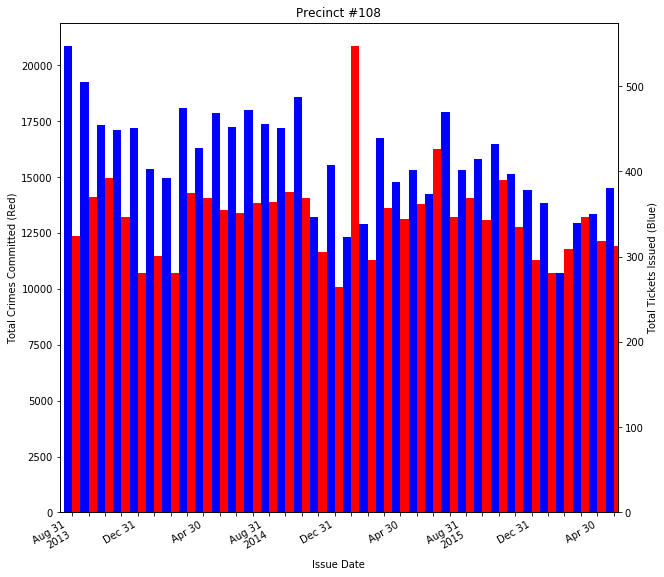

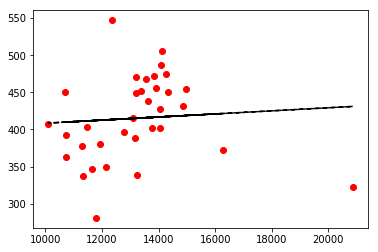

LinregressResult(slope=0.0020753455856607973, intercept=387.71930087438597, rvalue=0.071037686691213298, pvalue=0.68972457624615791, stderr=0.0051514329342493151)


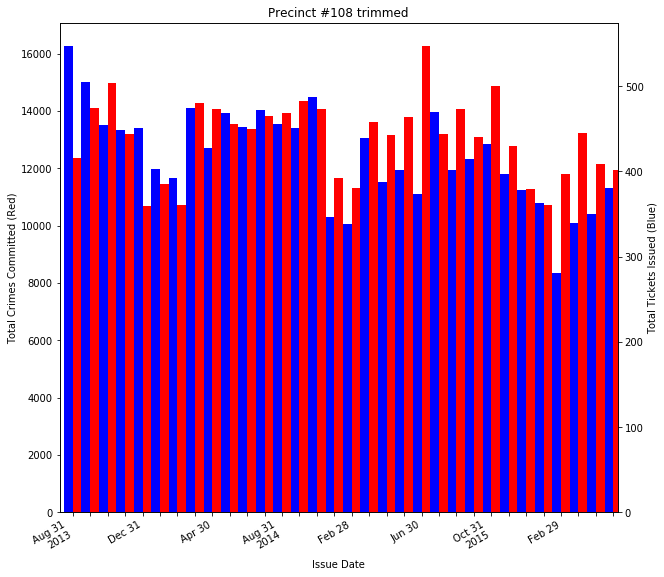

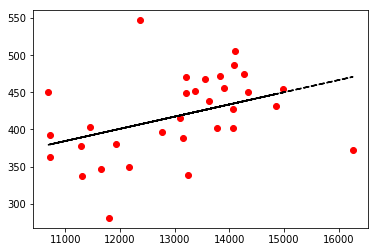

LinregressResult(slope=0.016407602200931879, intercept=203.98158464532426, rvalue=0.39697492639147436, pvalue=0.024472549100239188, stderr=0.0069260146316829242)


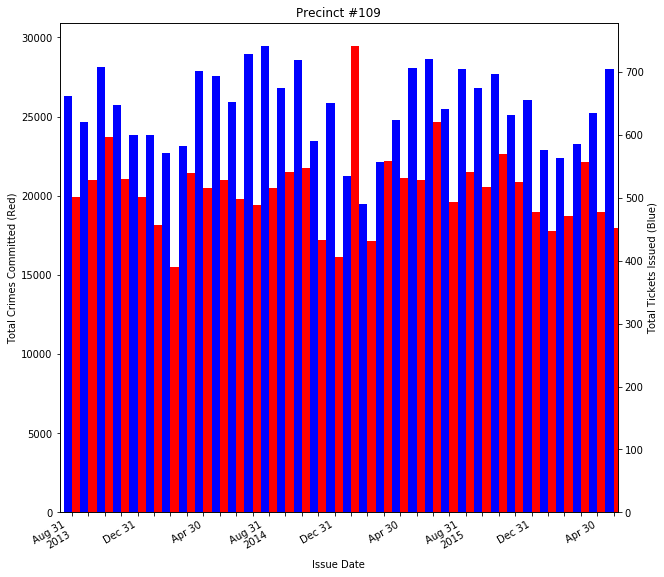

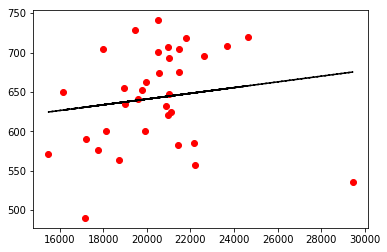

LinregressResult(slope=0.0036320762465337137, intercept=568.2813743140274, rvalue=0.14999113970432307, pvalue=0.39717211868969426, stderr=0.0042322697090973653)


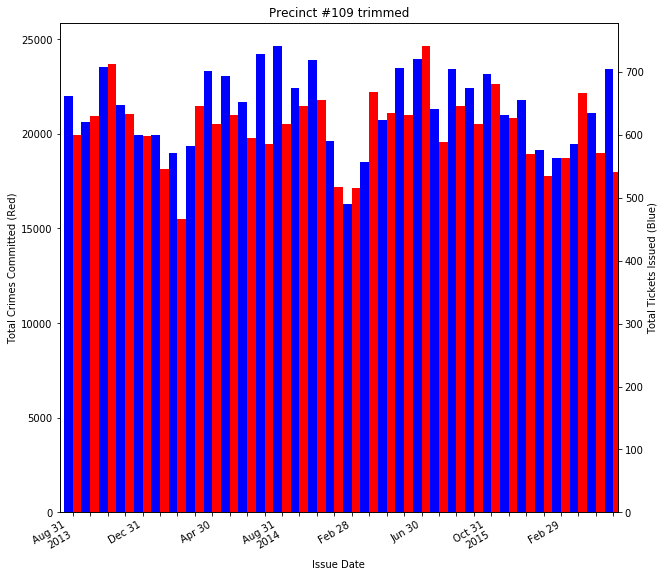

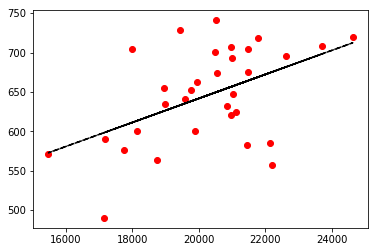

LinregressResult(slope=0.015250405028939198, intercept=336.65260995518059, rvalue=0.48672622329507248, pvalue=0.0047294802961182405, stderr=0.0049971920980220203)


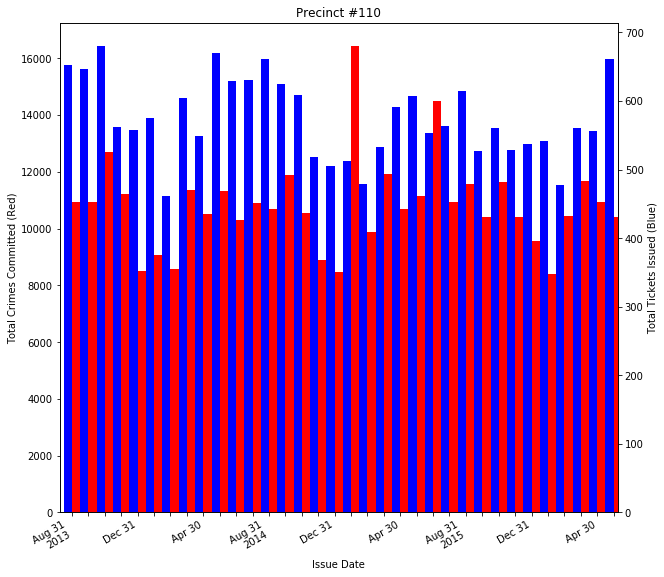

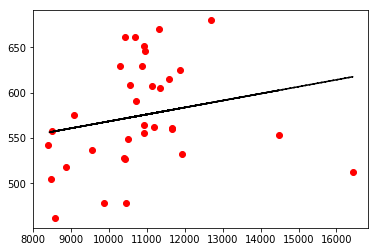

LinregressResult(slope=0.0076431103607088246, intercept=492.0559477906794, rvalue=0.2097592547629635, pvalue=0.23379140804037418, stderr=0.006298007823016343)


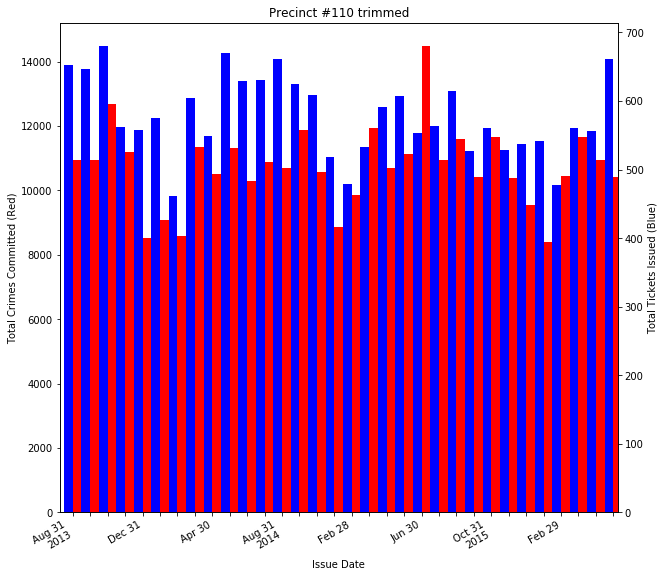

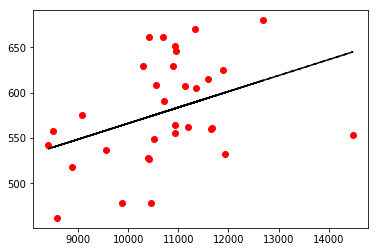

LinregressResult(slope=0.017584968924974572, intercept=390.40926783304042, rvalue=0.37818320770726999, pvalue=0.032826920767464726, stderr=0.0078589302934481669)


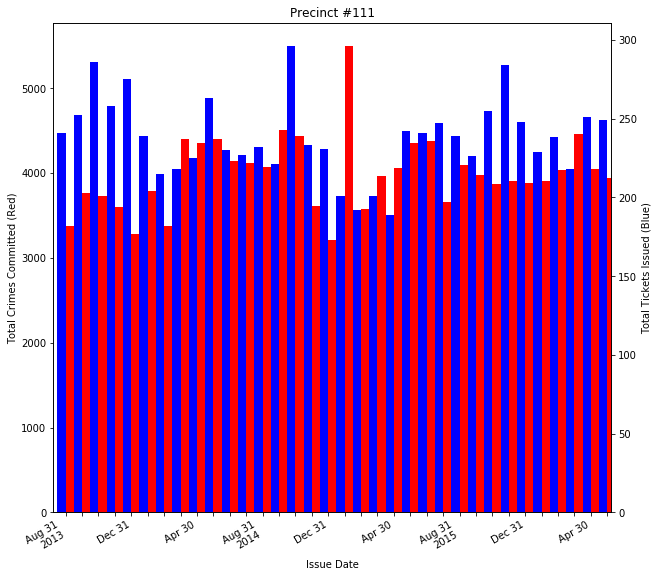

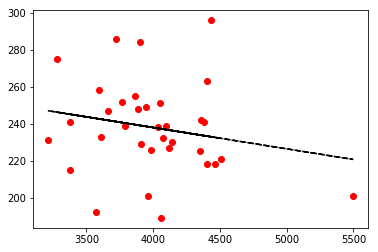

LinregressResult(slope=-0.011540010858329142, intercept=284.09283984067099, rvalue=-0.20311473230990079, pvalue=0.24927542055404464, stderr=0.0098342495573729184)


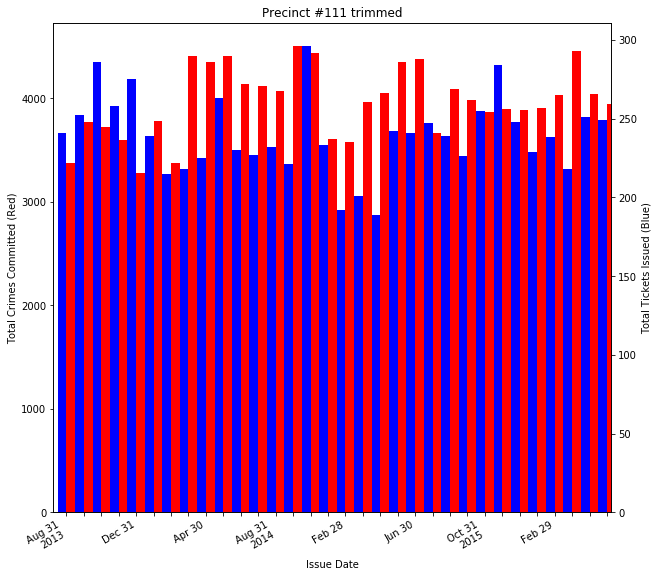

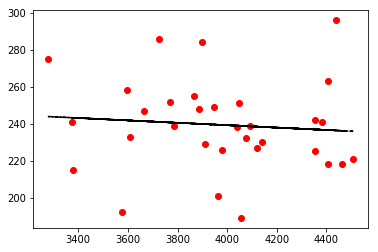

LinregressResult(slope=-0.0064933555713349959, intercept=265.16397040364177, rvalue=-0.088149968898476552, pvalue=0.6314066204999268, stderr=0.013396534905948641)


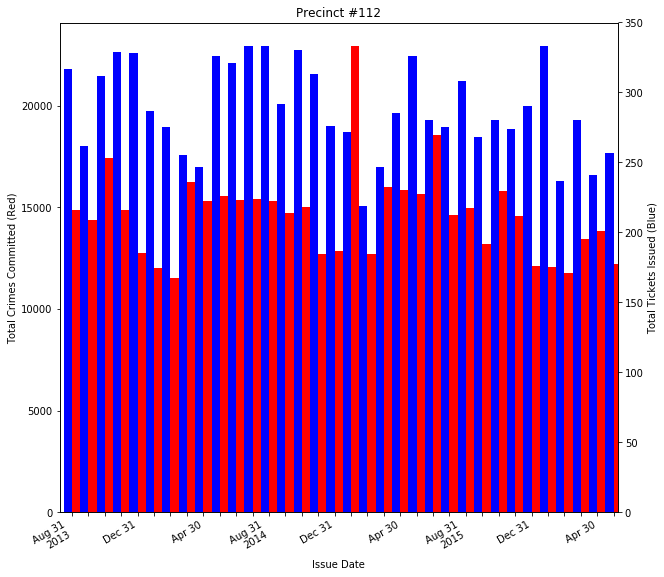

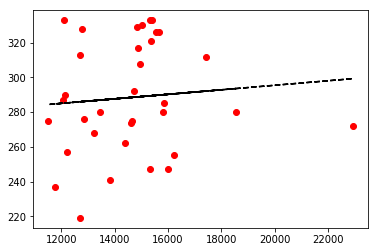

LinregressResult(slope=0.0013030833844197662, intercept=269.43135188348265, rvalue=0.08989022801130693, pvalue=0.61316148802957926, stderr=0.0025522487749702156)


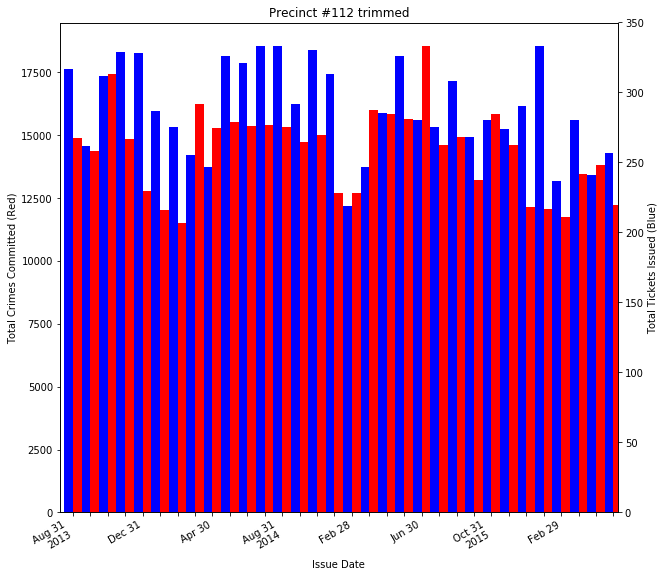

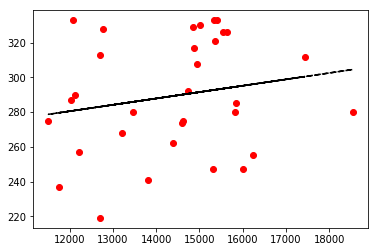

LinregressResult(slope=0.0036727203306889016, intercept=236.46590568860603, rvalue=0.18982738206595476, pvalue=0.29806023644217933, stderr=0.0034681600675007386)


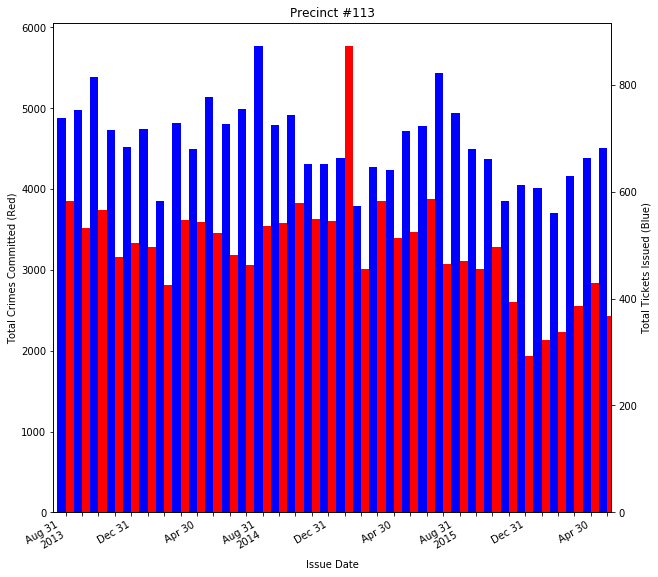

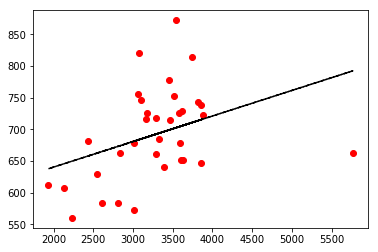

LinregressResult(slope=0.040308889845821053, intercept=559.62855836984988, rvalue=0.37257481604056125, pvalue=0.030005811580047816, stderr=0.017748487087140743)


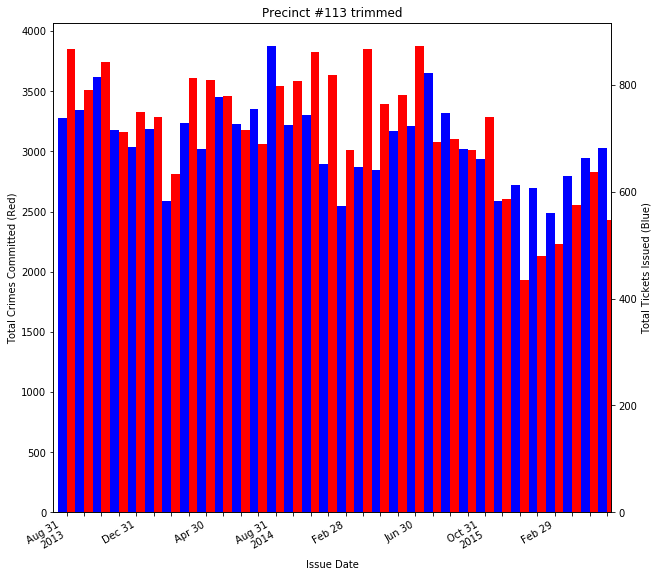

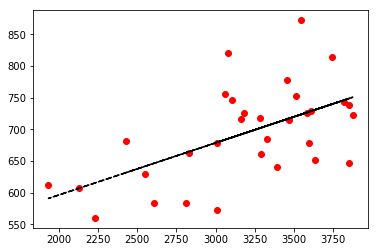

LinregressResult(slope=0.082287073056047655, intercept=431.61759906206913, rvalue=0.57605842677531804, pvalue=0.00056018786170509711, stderr=0.021317860388079191)


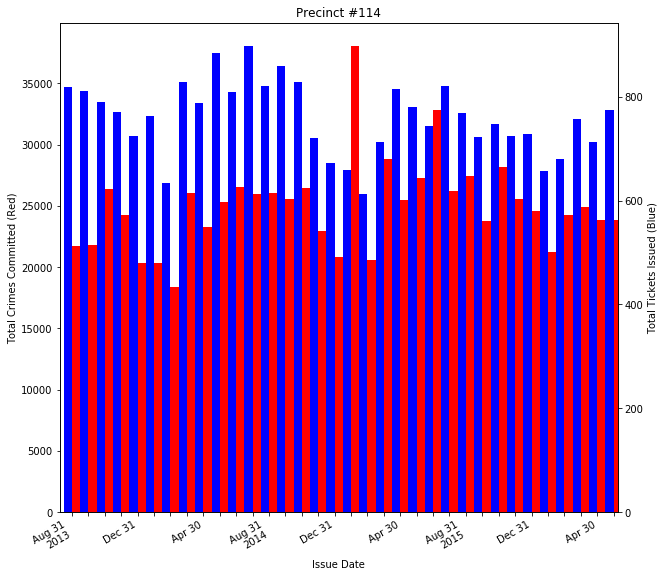

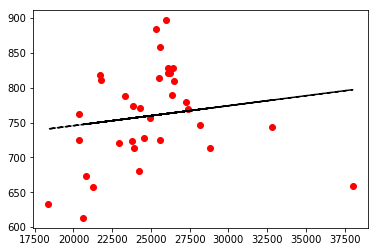

LinregressResult(slope=0.0028692766118817081, intercept=688.11093617773975, rvalue=0.15295495617910482, pvalue=0.38780160085363036, stderr=0.0032771271977754691)


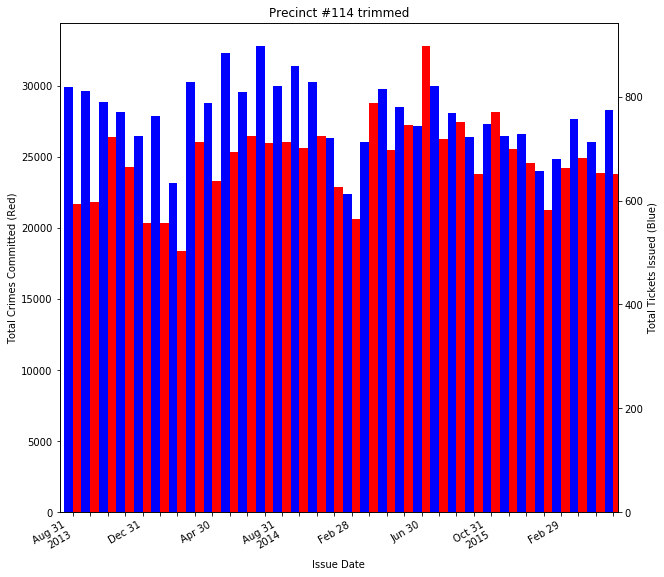

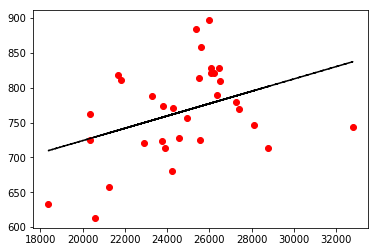

LinregressResult(slope=0.0088652866267164357, intercept=546.70284163779343, rvalue=0.38231590212480848, pvalue=0.030815085785770337, stderr=0.0039119802543241379)


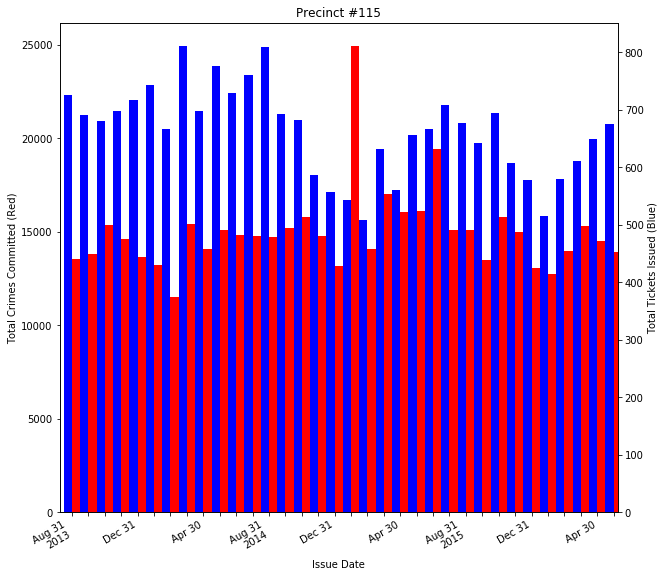

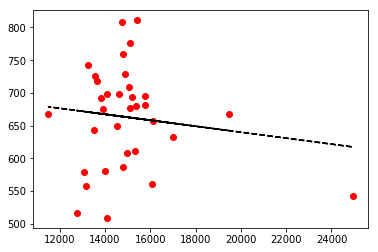

LinregressResult(slope=-0.0045663259470648592, intercept=731.29545119121519, rvalue=-0.13178675386093167, pvalue=0.45751269081068147, stderr=0.0060717749452045338)


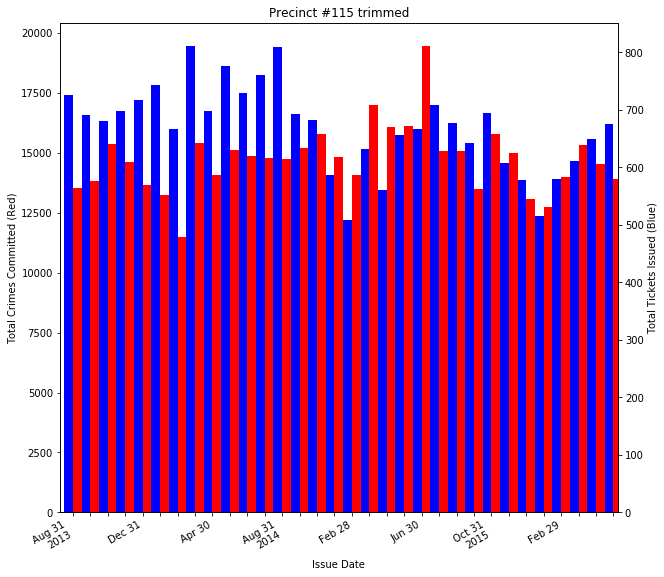

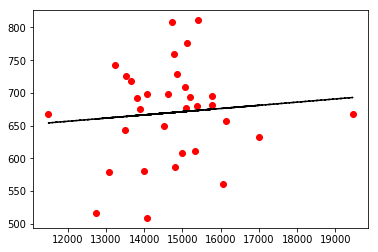

LinregressResult(slope=0.0048819114840409697, intercept=598.00835629798826, rvalue=0.092359938749677351, pvalue=0.61513529790025978, stderr=0.0096091582926952288)


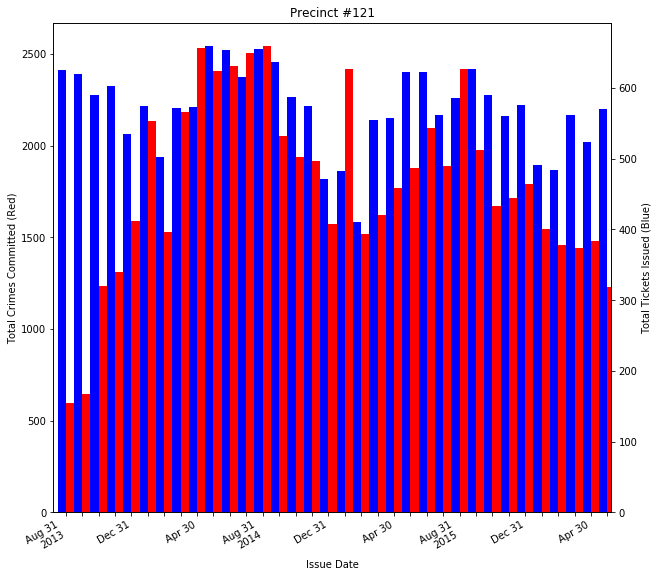

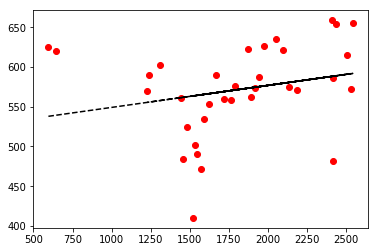

LinregressResult(slope=0.027750812501665761, intercept=521.45771084443675, rvalue=0.23590014808991075, pvalue=0.17923371104632904, stderr=0.020208740647838962)


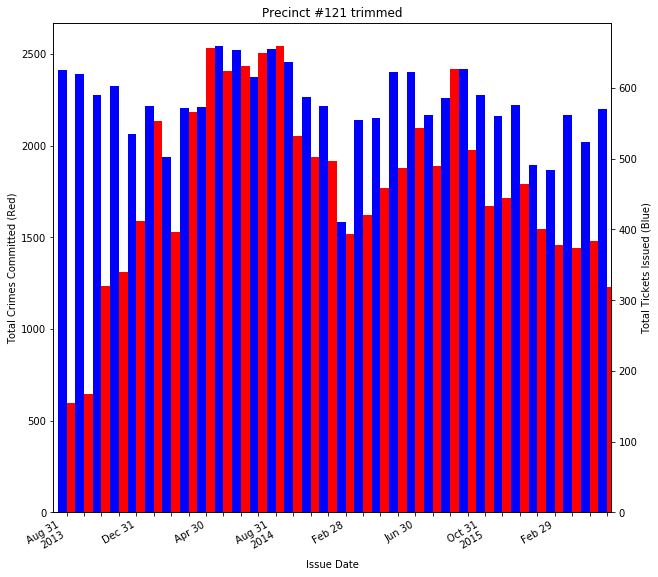

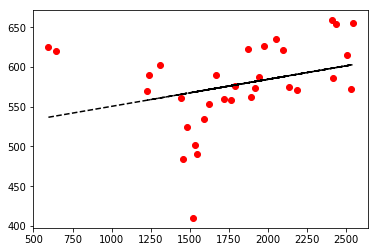

LinregressResult(slope=0.034045648860453373, intercept=516.50432268582256, rvalue=0.30936022375128858, pvalue=0.084900753595548592, stderr=0.019106972585631696)


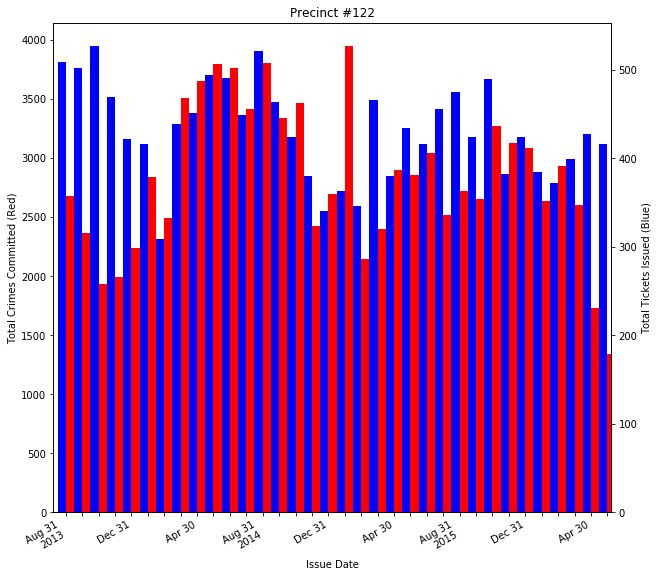

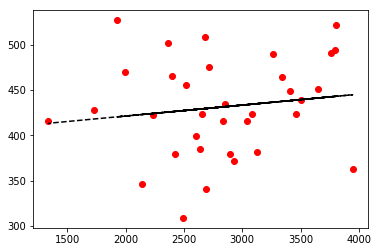

LinregressResult(slope=0.012063538069633239, intercept=397.21734869814543, rvalue=0.14106216633233609, pvalue=0.42617643008035644, stderr=0.01496665266536258)


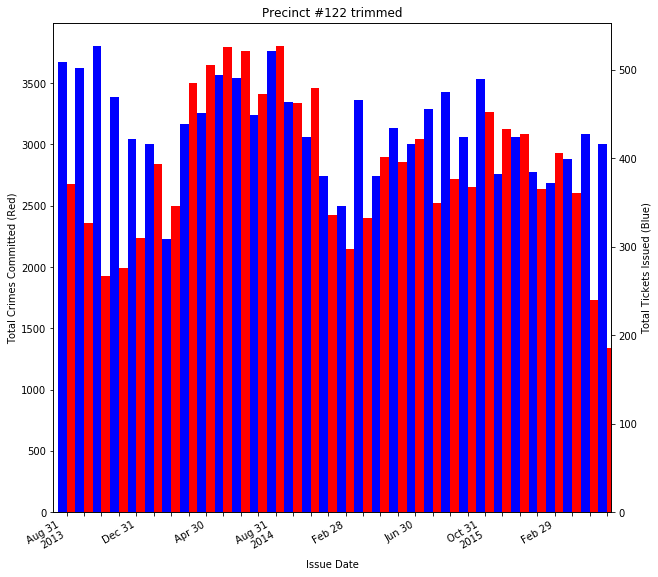

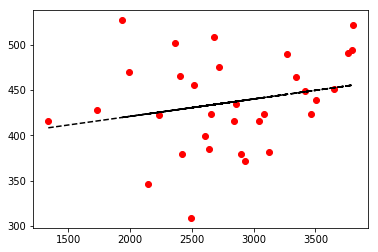

LinregressResult(slope=0.019101935315932485, intercept=382.82788740597925, rvalue=0.22890959405894307, pvalue=0.20759651957809858, stderr=0.014830826855575059)


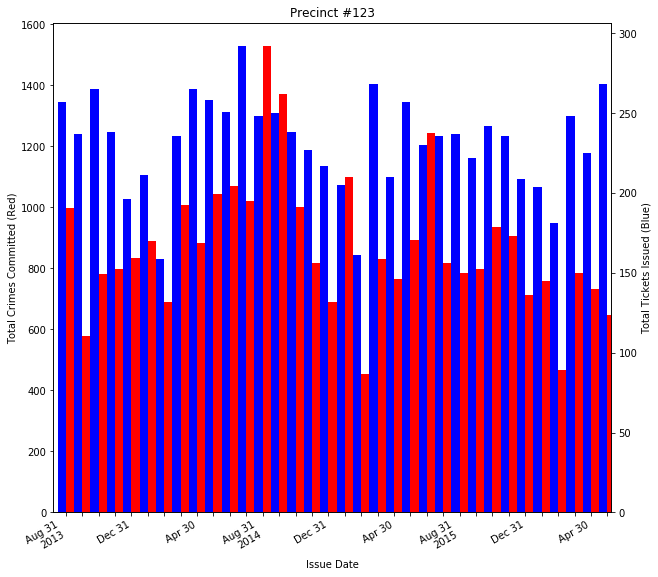

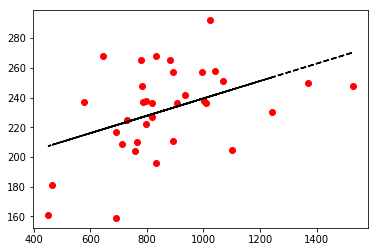

LinregressResult(slope=0.058457143583871614, intercept=180.95758424086196, rvalue=0.44146039769317047, pvalue=0.0089580846162814042, stderr=0.021003863846885882)


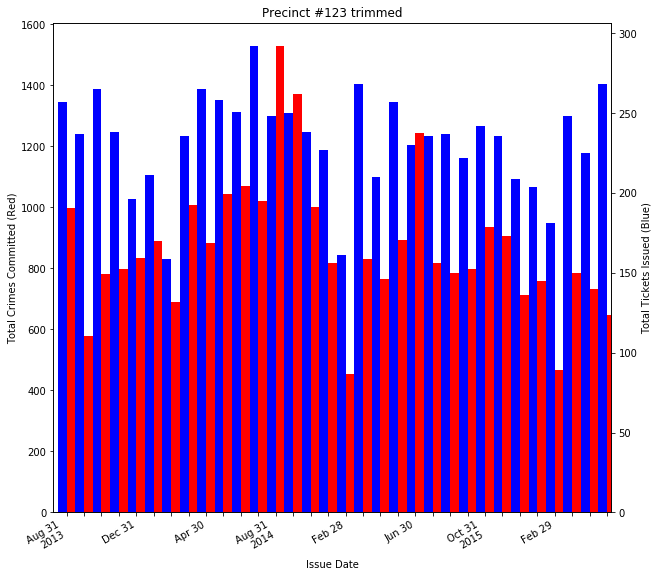

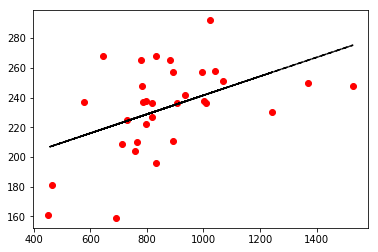

LinregressResult(slope=0.063795665652179784, intercept=177.70919425722315, rvalue=0.4776017926315268, pvalue=0.005703807170500709, stderr=0.021426150017993102)
[0.93070651272907368, 0.8089154301263235, 0.088779145502084836, 0.20418101390908014, 0.28009391675629697, 0.36378199221402296, 0.26642964468468122, 0.4685501112600815, 0.38879550814678654, 0.76931681485685599, 0.55095503740854568, 0.019561880137126928, 0.15959959921675332, 0.029985196605571973, 0.0085092562072850153, 0.0065892548267681983, 0.48710585959912633, 0.99177537127543047, 0.10840975238750544, 0.1418934706149971, 0.89775751565011563, 0.085391385432652719, 0.67271888590044837, 0.48393718199328861, 0.50264507172400086, 0.17075069961074849, 0.67431726395652647, 0.36990596885625249, 0.44153627480726843, 0.78438216390339166, 0.37444666287440442, 0.94273543450832387, 0.11783137347506441, 1.531695235106406e-08, 0.35425899489737045, 0.091228066106540467, 0.53879007319872962, 0.78402541905060208, 0.66255338691814114, 0.0720706178

In [154]:
pval = []
pvaltrim = []
for pct in pcts:
    currentparking = parkingall.loc[parkingall['Violation Precinct'] == pct]
    currentcrime = crimeall.loc[crimeall['ADDR_PCT_CD'] == pct]
    currentcrimecount = pd.DataFrame(currentcrime.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())
    currentparkingcount = pd.DataFrame(currentparking.groupby([pd.Grouper(key='Issue Date', freq='M')])['Violation Precinct'].count())

    cptrim = pkweektrim.loc[pkweektrim['Violation Precinct'] == pct]
    cctrim = crweektrim.loc[crweektrim['ADDR_PCT_CD'] == pct]
    crmonthtrim = pd.DataFrame(cctrim.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())
    pkmonthtrim = pd.DataFrame(cptrim.groupby([pd.Grouper(key='Issue Date', freq='M')])['Violation Precinct'].count())

    title = 'Precinct #'
    title += str(pct)
    titletrim = title + ' trimmed'

    pval.append(plotMyStuff(currentparkingcount, currentcrimecount, title))
    pvaltrim.append(plotMyStuff(pkmonthtrim, crmonthtrim, titletrim))
        
print(pval)
print(pvaltrim)
    
    

In [41]:
#correlation
import numpy as np
print(np.corrcoef(parkingallcount.T, crimeallcount.T)[0,1])

0.259230840918


In [27]:
corr = []
titles = []
for pct in pcts:
    currentparking = parkingall.loc[parkingall['Violation Precinct'] == pct]
    currentcrime = crimeall.loc[crimeall['ADDR_PCT_CD'] == pct]
    currentcrimecount = pd.DataFrame(currentcrime.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())
    currentparkingcount = pd.DataFrame(currentparking.groupby([pd.Grouper(key='Issue Date', freq='M')])['Violation Precinct'].count())
    title = 'Precinct #'
    title += str(pct)
    corr.append((np.corrcoef(currentparkingcount.T, currentcrimecount.T)[0,1]) )
    titles.append(title)
    print(title, " ", (np.corrcoef(currentparkingcount.T, currentcrimecount.T)[0,1]))
    #plotMyStuff(currentparkingcount, currentcrimecount, title)
    
    
    

Precinct #1   -0.0154913992359
Precinct #5   -0.0430642927345
Precinct #6   0.296356157114
Precinct #7   0.223347818787
Precinct #9   0.190662845846
Precinct #10   0.160748379128
Precinct #13   0.196066735301
Precinct #14   0.128601696573
Precinct #17   -0.152638642502
Precinct #18   -0.0522138720279
Precinct #19   0.10594394867
Precinct #20   0.398546776748
Precinct #23   0.246679769991
Precinct #24   0.372618138453
Precinct #25   0.444106164207
Precinct #26   0.456973871691
Precinct #28   0.123334690801
Precinct #30   -0.00183654235935
Precinct #32   0.280253924139
Precinct #33   0.257253720235
Precinct #34   -0.022889981914
Precinct #40   0.299404711845
Precinct #41   0.0751527708214
Precinct #42   -0.124226639358
Precinct #43   -0.119002921712
Precinct #44   0.240448544568
Precinct #45   0.0747643851021
Precinct #46   0.158733271153
Precinct #47   0.13647086839
Precinct #48   -0.0487186476632
Precinct #49   -0.15725186395
Precinct #50   -0.0127973137873
Precinct #52   0.27330114776

In [ ]:
#cut out worst month
corr = []
titles = []
for pct in pcts:
    currentparking = parkingall.loc[parkingall['Violation Precinct'] == pct]
    currentcrime = crimeall.loc[crimeall['ADDR_PCT_CD'] == pct]
    currentcrimecount = pd.DataFrame(currentcrime.groupby([pd.Grouper(key='CMPLNT_FR_DT', freq='M')])['ADDR_PCT_CD'].count())
    currentparkingcount = pd.DataFrame(currentparking.groupby([pd.Grouper(key='Issue Date', freq='M')])['Violation Precinct'].count())
    
    title = 'Precinct #'
    title += str(pct)
    corr.append((np.corrcoef(currentparkingcount.T, currentcrimecount.T)[0,1]) )
    titles.append(title)
    print(title, " ", (np.corrcoef(currentparkingcount.T, currentcrimecount.T)[0,1]))
    #plotMyStuff(currentparkingcount, currentcrimecount, title)
    
    
    

In [28]:
corr.sort()
print(corr)

[-0.20311473230990079, -0.1572518639499402, -0.1526386425015118, -0.13178675386093167, -0.12422663935761297, -0.11900292171163533, -0.11339857143126271, -0.052213872027923838, -0.048718647663186267, -0.043064292734480099, -0.042627407710236029, -0.037474525395426915, -0.022889981913953601, -0.015491399235908363, -0.012797313787346543, -0.0018365423593469951, 0.031018494833918647, 0.045552229612102001, 0.048801202345014401, 0.056894612837966915, 0.066440418371510393, 0.071037686691213284, 0.074764385102089034, 0.075152770821355061, 0.075518383772078729, 0.077630971596395329, 0.089890228011306902, 0.1059439486700446, 0.10917839036864795, 0.12333469080119606, 0.12384662890291362, 0.12860169657293102, 0.13637675110419867, 0.13647086839029721, 0.14106216633233609, 0.14999113970432307, 0.15104758471126706, 0.15295495617910482, 0.15526575562187681, 0.15873327115254277, 0.16074837912803028, 0.16392253361051667, 0.19066284584630475, 0.19505191286497084, 0.19606673530074128, 0.20054957404020887,

In [29]:
pc1 = parkingall.loc[parkingall['Violation Precinct'] == 1] 

In [30]:
pc1n = pd.DataFrame(pc1.groupby([pd.Grouper(key='Issue Date', freq='M')])['Violation Precinct'].count())
print(pc1)
print("BREAKK")
print(pc1n)
pc1n.columns = ['count']
print(pc1n)

        Issue Date  Violation Precinct
121     2015-07-09                 1.0
211     2015-06-24                 1.0
212     2015-07-15                 1.0
213     2015-06-24                 1.0
214     2015-07-06                 1.0
378     2015-06-17                 1.0
379     2015-06-26                 1.0
380     2015-06-30                 1.0
381     2015-06-14                 1.0
382     2015-06-14                 1.0
383     2015-07-14                 1.0
434     2015-06-21                 1.0
537     2015-06-22                 1.0
538     2015-06-12                 1.0
633     2015-05-29                 1.0
780     2015-06-17                 1.0
802     2015-07-03                 1.0
1279    2015-06-14                 1.0
1281    2015-06-25                 1.0
1437    2015-06-21                 1.0
1459    2015-06-23                 1.0
1462    2015-07-08                 1.0
1907    2015-06-21                 1.0
1908    2015-06-21                 1.0
1909    2015-06-27       

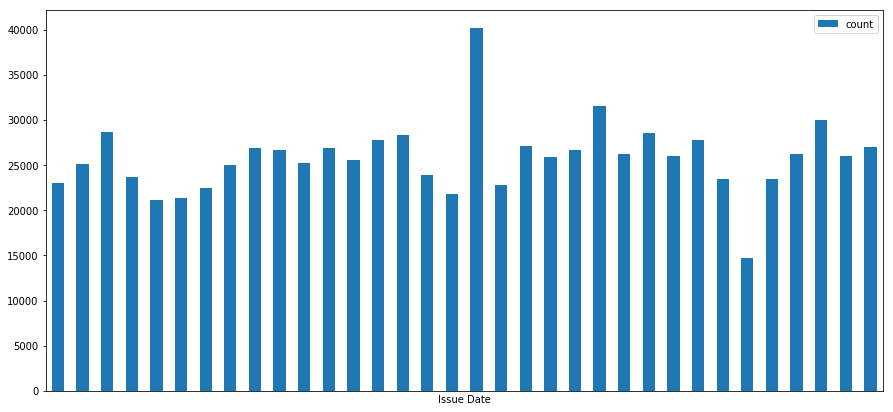

In [31]:
#having an issue plotting :(
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,7))

pc1n.plot(ax=ax, kind='bar')
#set ticks every week
#ax.bar(pc1n.index, pc1n)

monthformat = mdates.DateFormatter('%M %Y')
months = mdates.MonthLocator()
ax.xaxis.set_major_formatter(monthformat)
ax.xaxis.set_major_locator(months)
#set major ticks format
plt.show()


In [32]:
smallgroup = pk17[1:20]
#smallgroup.set_index('Issue Date').resample('M')["Violation Precinct"].count()
# smallgroup.index = smallgroup['Issue Date']
# smallgroup.index = pd.to_datetime(smallgroup.index)
smallgroup.groupby(['Violation Precinct', pd.Grouper(key='Issue Date', freq='M')])['Violation Precinct'].count()
# smallgroup.index = smallgroup['Issue Date']
# smallgroup.index = pd.to_datetime(smallgroup.index)
# print(smallgroup)
# approach1 = smallgroup.groupby(['month'], )
# approach1.tail(12)

Violation Precinct  Issue Date
0                   2016-07-31    1
                    2016-08-31    1
                    2016-09-30    1
                    2016-10-31    2
                    2016-11-30    1
                    2016-12-31    1
                    2017-02-28    1
                    2017-06-30    1
13                  2016-11-30    1
14                  2017-06-30    1
17                  2017-01-31    1
                    2017-04-30    1
18                  2016-09-30    1
44                  2016-09-30    1
71                  2016-08-31    1
73                  2017-02-28    1
106                 2017-01-31    1
120                 2016-07-31    1
Name: Violation Precinct, dtype: int64

In [33]:
pk17.groupby([pd.Grouper(key='Issue Date', freq='M'), 'Violation Precinct'])['Violation Precinct'].count()

Issue Date  Violation Precinct
2016-07-31  0                     11033
            1                      2264
            2                         2
            4                         4
            5                       839
            6                       818
            7                       619
            9                       934
            10                      763
            11                        1
            12                        1
            13                     2023
            14                     2079
            16                        1
            17                     1379
            18                     2054
            19                     3569
            20                     1169
            22                        1
            23                      959
            24                      742
            25                      427
            26                      417
            27                        2
         

In [34]:
#pk17.index = pk17['Issue Date']
#pk17[pk17.'Violation Precint'.apply(lambda x: x.isnumeric())]
#df[df.id.apply(lambda x: x.isnumeric())]
#pk17 = pk17['Violation Precinct'].fillna(0).astype(int)
pk17.index = pd.to_datetime(pk17.index)
pk17.groupby(pd.Grouper(freq='M'))['Issue Date'].count()
#print(pk17month[1:20])
print(pk17[1:20])
#print(pk17month.groupby(['Violation Precinct'])['Violation Precinct'].count())
#print("BREAKKK")
#pk17.index = pd.to_datetime(pk17.index)
#pk17.groupby(pd.Grouper(freq='M'))


                              Issue Date  Violation Precinct
1970-01-01 00:00:00.000000001 2016-07-08                   0
1970-01-01 00:00:00.000000002 2016-08-23                   0
1970-01-01 00:00:00.000000003 2017-06-14                  14
1970-01-01 00:00:00.000000004 2016-11-21                  13
1970-01-01 00:00:00.000000005 2017-06-13                   0
1970-01-01 00:00:00.000000006 2016-08-03                  71
1970-01-01 00:00:00.000000007 2016-12-21                   0
1970-01-01 00:00:00.000000008 2016-11-21                   0
1970-01-01 00:00:00.000000009 2016-10-05                   0
1970-01-01 00:00:00.000000010 2017-01-11                 106
1970-01-01 00:00:00.000000011 2016-09-27                  18
1970-01-01 00:00:00.000000012 2016-10-27                   0
1970-01-01 00:00:00.000000013 2016-09-30                  44
1970-01-01 00:00:00.000000014 2017-02-04                  73
1970-01-01 00:00:00.000000015 2016-07-07                 120
1970-01-01 00:00:00.0000

In [35]:
pk16.index = pk16['Issue Date']
print(pk16['Violation Precinct'][1:20])

Issue Date
2015-07-09    79.0
2015-07-09    79.0
2015-07-09    79.0
2015-07-09    79.0
2015-07-09    79.0
2015-07-09     0.0
2015-07-09    79.0
2015-07-09    79.0
2015-07-09    79.0
2015-07-09     0.0
2015-07-09    94.0
2015-07-09    94.0
2015-07-09    94.0
2015-07-09    94.0
2015-07-09    94.0
2015-07-09    94.0
2015-07-09    94.0
2015-07-09    88.0
2015-07-09    88.0
Name: Violation Precinct, dtype: float64


In [36]:
pk15.index = pk15['Issue Date']
print(pk15['Violation Precinct'][1:20])

Issue Date
2015-03-06     25
2014-07-28     72
2015-04-13    102
2015-05-19     28
2014-11-20     67
2014-08-01     79
2014-07-19    103
2014-09-23      5
2015-01-20    113
2015-01-20    113
2015-02-17    109
2015-05-05      5
2014-10-21     78
2014-08-21    110
2014-08-07     14
2014-08-26     72
2014-06-23     19
2014-09-24      9
2014-10-04     48
Name: Violation Precinct, dtype: int64


In [37]:
pk14.index = pk14['Issue Date']
print(pk14['Violation Precinct'][1:20])

Issue Date
1971-02-02     68
1971-09-18    104
1971-09-18    104
1971-09-18    104
1971-09-18     33
1971-10-10    115
1973-04-05     73
1973-07-22     10
1973-08-12     68
1973-09-22     14
1973-09-25     94
1973-09-25     90
1973-10-15     84
1973-10-30      1
1973-11-12    106
1973-11-13     41
1974-01-15     62
1976-02-12    114
1976-12-27    110
Name: Violation Precinct, dtype: int64


In [38]:
parkingalltemp = [pk17,pk16,pk15,pk14]
parkingall = pd.concat(parkingalltemp)

In [ ]:
parkingall = parkingall['Violation Precinct'].fillna(0).astype(int)

In [ ]:
parkingall.index = pd.to_datetime(parkingall.index)
parkingall.groupby(pd.Grouper(freq='M'))

In [184]:
#Weather Data 
import pandas as pd
weatherall = pd.read_csv('Weather.csv', usecols=['Date', 'Temp', 'Humidity', 'Precip(in)'])

In [185]:
print(weatherall[:-1])
print(parkingallcountdays[:-1])
print(weatherall.shape)
print(parkingallcountdays.shape)

         Date  Temp  Humidity Precip(in)
0      8/1/13    71        79       0.65
1      8/2/13    75        69          0
2      8/3/13    73        63       0.06
3      8/4/13    73        57          0
4      8/5/13    70        48          0
5      8/6/13    73        54          0
6      8/7/13    75        65          T
7      8/8/13    76        86       0.46
8      8/9/13    80        80       0.05
9     8/10/13    77        61          0
10    8/11/13    73        52          0
11    8/12/13    76        70       0.05
12    8/13/13    73        83       0.85
13    8/14/13    68        64          0
14    8/15/13    69        52          0
15    8/16/13    73        52          0
16    8/17/13    74        51          0
17    8/18/13    72        57          T
18    8/19/13    73        64          T
19    8/20/13    78        61          0
20    8/21/13    81        54          0
21    8/22/13    75        84       0.25
22    8/23/13    77        59          0
23    8/24/13   

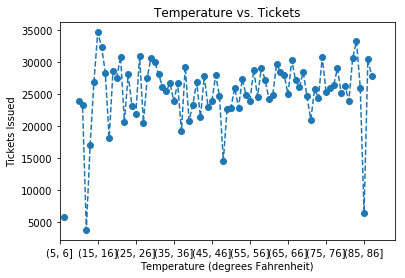

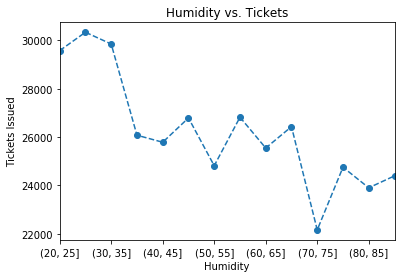

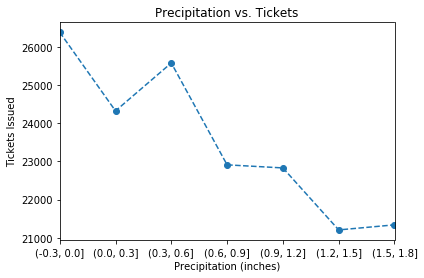

4.97
0.0


In [218]:
import numpy as np
import matplotlib.pyplot as plt
weatherall['Date'] = pd.to_datetime(weatherall['Date'])
weather = []
dte = []
tix = []
precip = []
humidity = []
for i in range(len(parkingallcountdays)):
    if weatherall['Date'][i] == parkingallcountdays.index[i]:
        weather.append(weatherall['Temp'][i])
        if (weatherall['Precip(in)'][i] != "T"):
            precip.append(float(weatherall['Precip(in)'][i]))
        else:
            precip.append(0)
        humidity.append(weatherall['Humidity'][i])
        dte.append(weatherall['Date'][i])
        tix.append(parkingallcountdays['Violation Precinct'][i])
df = pd.DataFrame({'dte':dte, 'tix':tix, 'weather':weather, 'Humidity':humidity, 'Precip(in)':precip})
#df.groupby(pd.cut(df["weth"], np.arange(0, 90, 5))).sum()

#print(p)
fig, ax = plt.subplots()
df.groupby(pd.cut(df["weather"], np.arange(5, 95, 1))).mean()['tix'].plot(ax=ax, title="Temperature vs. Tickets", marker='o', linestyle='--')
ax.set_xlabel('Temperature (degrees Fahrenheit)')
ax.set_ylabel('Tickets Issued')
# fig1, ax1 = plt.subplots()
# df.groupby(pd.cut(df["weth"], np.arange(10, 100, 10))).count()['tix'].plot(ax=ax1, title="count", kind="bar")
#df.groupby(['weth']).mean()['tix'].plot(ax=ax, title="mean")

fig2, ax2 = plt.subplots()
df.groupby(pd.cut(df["Humidity"], np.arange(20, 95, 5))).mean()['tix'].plot(ax=ax2, title="Humidity vs. Tickets", marker='o', linestyle='--')
ax2.set_xlabel('Humidity')
ax2.set_ylabel('Tickets Issued')

fig3, ax3 = plt.subplots()
df.groupby(pd.cut(df["Precip(in)"], np.arange(-.3, 2.1, .3))).mean()['tix'].plot(ax=ax3, title="Precipitation vs. Tickets", marker='o', linestyle='--')
ax3.set_xlabel('Precipitation (inches)')
ax3.set_ylabel('Tickets Issued')
plt.show()

# fig4, ax4 = plt.subplots()
# df.groupby((df["Precip(in)"])).mean()['tix'].plot(ax=ax4, title="Precip(in.)", kind="bar")
# plt.show()
#print((df.ix[df["Precip(in)"].argmax()]))

print(max(df["Precip(in)"]))
print(min(df["Precip(in)"]))

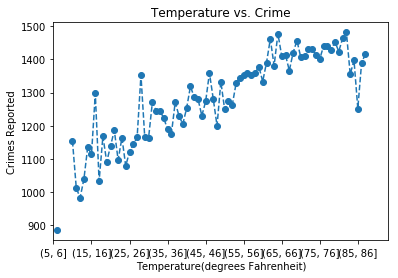

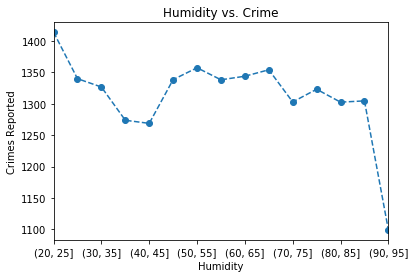

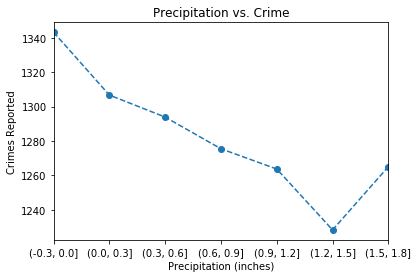

4.97
0.0


In [215]:
#same as above but for crime 
import numpy as np
import matplotlib.pyplot as plt
weatherall['Date'] = pd.to_datetime(weatherall['Date'])
weth = []
dte = []
crm = []
precip = []
humidity = []
for i in range(len(crimeallcountdays)):
    if weatherall['Date'][i] == crimeallcountdays.index[i]:
        weth.append(weatherall['Temp'][i])
        if (weatherall['Precip(in)'][i] != "T"):
            precip.append(float(weatherall['Precip(in)'][i]))
        else:
            precip.append(0)
        humidity.append(weatherall['Humidity'][i])
        dte.append(weatherall['Date'][i])
        crm.append(crimeallcountdays['ADDR_PCT_CD'][i])
df = pd.DataFrame({'dte':dte, 'crime':crm, 'weth':weth, 'Humidity':humidity, 'Precip(in)':precip})
#df.groupby(pd.cut(df["weth"], np.arange(0, 90, 5))).sum()

#print(p)
fig, ax = plt.subplots()
df.groupby(pd.cut(df["weth"], np.arange(5, 95, 1))).mean()['crime'].plot(ax=ax, title="Temperature vs. Crime", marker='o', linestyle='--')
ax.set_xlabel('Temperature(degrees Fahrenheit)')
ax.set_ylabel('Crimes Reported')
# fig1, ax1 = plt.subplots()
# df.groupby(pd.cut(df["weth"], np.arange(10, 100, 10))).count()['tix'].plot(ax=ax1, title="count", kind="bar")
#df.groupby(['weth']).mean()['tix'].plot(ax=ax, title="mean")

fig2, ax2 = plt.subplots()
df.groupby(pd.cut(df["Humidity"], np.arange(20, 100, 5))).mean()['crime'].plot(ax=ax2, title="Humidity vs. Crime", marker='o', linestyle='--')
ax2.set_xlabel('Humidity')
ax2.set_ylabel('Crimes Reported')

fig3, ax3 = plt.subplots()
df.groupby(pd.cut(df["Precip(in)"], np.arange(-.3, 2.1, .3))).mean()['crime'].plot(ax=ax3, title="Precipitation vs. Crime", marker='o', linestyle='--')
ax3.set_xlabel('Precipitation (inches)')
ax3.set_ylabel('Crimes Reported')
plt.show()

# fig4, ax4 = plt.subplots()
# df.groupby((df["Precip(in)"])).mean()['tix'].plot(ax=ax4, title="Precip(in.)", kind="bar")
# plt.show()
#print((df.ix[df["Precip(in)"].argmax()]))

print(max(df["Precip(in)"]))
print(min(df["Precip(in)"]))

In [23]:
parkingallcountDM = [0] * 32
for d in parkingall["Issue Date"]:
    parkingallcountDM[d.day] += 1
#print(parkingall["Issue Date"][1].day)
print(parkingallcountDM)

[0, 764817, 864162, 820736, 839596, 838271, 873179, 894443, 885420, 918906, 922959, 914224, 933111, 871961, 878899, 857545, 932985, 880868, 916831, 933296, 907595, 896484, 862911, 884180, 871450, 770811, 824977, 795929, 832699, 830183, 826543, 474558]


In [24]:
dom = []
for i in range(0,32):
    dom.append(i)
print(dom)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


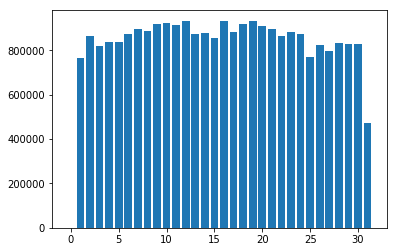

In [25]:
fig, ax = plt.subplots()
plt.bar(dom, parkingallcountDM)
plt.show()

In [22]:
#crime plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker
def plotTemp(parkingdata, weatherdata, title):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    plt.plot(weatherdata['Temp'][0:1034], parkingdata['Violation Precinct'][0:1034], type=scatter)

    plt.show()
plotTemp(parkingallcountdays, weatherall, "All Precincts")

NameError: name 'scatter' is not defined

In [ ]:
#     z = abs(parkingdata['Violation Precinct'] - crimedata['ADDR_PCT_CD'])
#     max_index = np.argmax(z)
#     min_index = np.argmin(z)
#     trimxx = parkingdata['Violation Precinct'].copy()
#     trimyy = crimedata['ADDR_PCT_CD'].copy()
#     if (abs(trimx[max_index] - trimy[max_index]) > 1.5 * abs(trimx[min_index] - trimy[min_index])):
#         print(abs(trimx[max_index] - trimy[max_index]))
#         print(abs(trimx[min_index] - trimy[min_index]))
#         trimx.pop(max_index)
#         trimy.pop(max_index)

#     trimx = trimxx.loc[(trimxx['Violation Precinct'] < datetime.date(2014, 12, 1)) | (trimxx['Violation Precinct'] > datetime.date(2015, 1, 31))]
#     trimy = trimyy.loc[((trimyy['CMPLNT_FR_DT'] > datetime.date(2013, 7, 31)) & (trimyy['CMPLNT_FR_DT'] < datetime.date(2014, 12, 1))) | ((trimyy['CMPLNT_FR_DT'] > datetime.date(2015, 1, 31)) & (trimyy['CMPLNT_FR_DT'] < datetime.date(2016, 6, 1)))]
        
#     fit1 = np.polyfit(trimx,trimy,1)
#     fit_fn1 = np.poly1d(fit1) 
    
#     fig9 = plt.figure()
#     ax8 = fig9.add_subplot(111)
#     ax9 = ax8.twinx()
    
#     ax8.set_ylabel('Total Crimes Committed (Red)')
#     ax9.set_ylabel('Total Tickets Issued (Blue)')
    
#     trimx.plot(label='parking',title=title,kind='bar', color='red', ax=ax8, position=0, figsize=(15,7))
#     trimy.plot(label='crime',kind='bar', color='blue', ax=ax9, position=1, figsize=(10,10))
    
#     ticklabels = ['']*len(crimedata.index)
#     ticklabels[::4] = [item.strftime('%b %d') for item in crimedata.index[::4]]
#     ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in crimedata.index[::12]]
#     ax8.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
#     plt.gcf().autofmt_xdate()
#     plt.show()
    
#     fig = plt.figure()
#     plt.plot(trimx, trimy, 'ro',trimx, fit_fn1(trimx), '--k')
#     plt.show()
    
#     print(linregress(trimx,trimy))
    